In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import groupby
from collections import Counter

%matplotlib inline

In [2]:
with pd.HDFStore("data/train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")
df.shape

(1710756, 111)

In [ ]:
## drop cols with over 30% missing value
missing_ratio = df.isnull().sum()/df.shape[0]
col_to_drop = missing_ratio.where(lambda x:x>0.3).dropna().index
df = df.drop(col_to_drop, axis=1)

In [5]:
## original feature cols
feature_cols = [x for x in list(df.columns) if x not in ['id','timestamp','y']]

In [10]:
## calculate the median for each column before filling missing value
d_median= df.median(axis=0)
n = df.isnull().sum(axis=1)

for c in feature_cols:
    df[c + '_nan_'] = pd.isnull(df[c]) ## add col to indicate if the number is null or not
    d_median[c + '_nan_'] = 0

    
## forward fill the missing value, gap limit set to be three
df_ffilled = df.set_index(['id','timestamp']).sort_index().fillna(method = 'ffill',limit =3).reset_index()

## fill the other missing values with median
df_filled = df_ffilled.fillna(d_median)

## add another col to indicate number of missing values
df_filled['znull'] = n

In [ ]:
## transform values into their reciprocals for more centralized distribution

df_transformed = df_filled.copy()
non_transformable_fea = []

for feature in feature_cols:
    try:
        fig = plt.figure(figsize = (12,3))
        ax1 = fig.add_subplot(121)
        sns.distplot(df_filled[feature])
        ax2 = fig.add_subplot(122)
        transformed_list = list(map(lambda x:1/x,df_filled[feature]))
        df_transformed[feature]=transformed_list
    except OverflowError:
        print('%s transformation meet a overflow error'%feature)
        non_transformable_fea.append(feature)
    except ValueError:
        print('%s transformation meet a Value error'%feature)
        non_transformable_fea.append(feature)

C:\Users\Miya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\Miya\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


fundamental_62 transformation meet a overflow error
technical_0 transformation meet a overflow error
technical_2 transformation meet a overflow error
technical_6 transformation meet a overflow error
technical_7 transformation meet a overflow error
technical_9 transformation meet a Value error
technical_10 transformation meet a Value error
technical_11 transformation meet a overflow error
technical_12 transformation meet a overflow error
technical_13 transformation meet a Value error
technical_14 transformation meet a overflow error
technical_16 transformation meet a Value error
technical_17 transformation meet a overflow error
technical_18 transformation meet a Value error
technical_20 transformation meet a Value error
technical_22 transformation meet a Value error
technical_29 transformation meet a overflow error
technical_30 transformation meet a Value error
technical_32 transformation meet a overflow error
technical_34 transformation meet a Value error
technical_37 transformation me

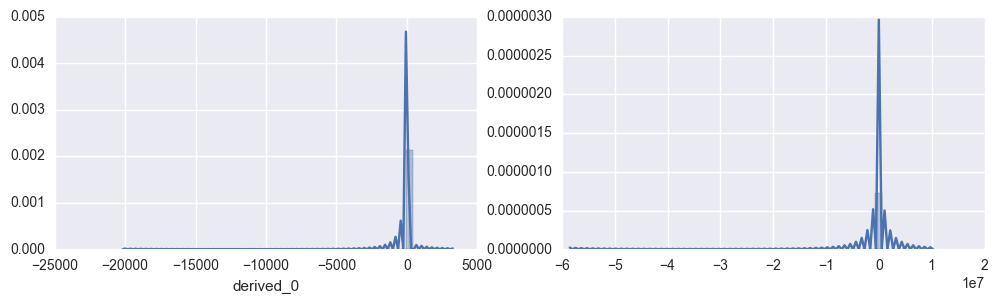

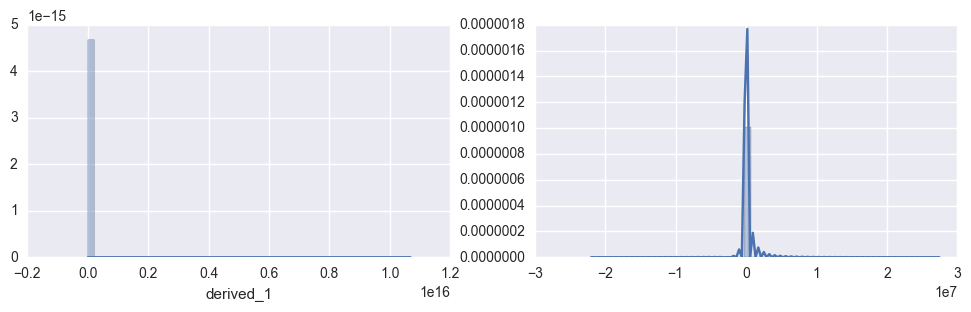

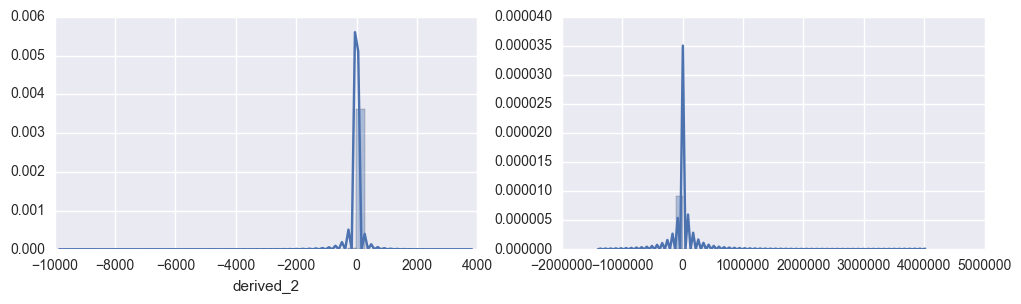

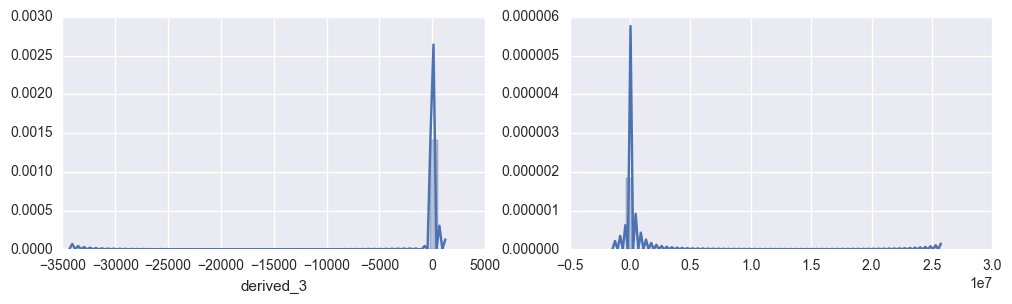

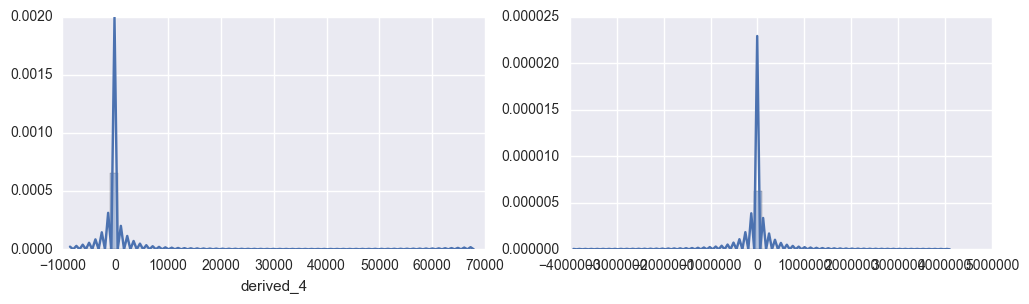

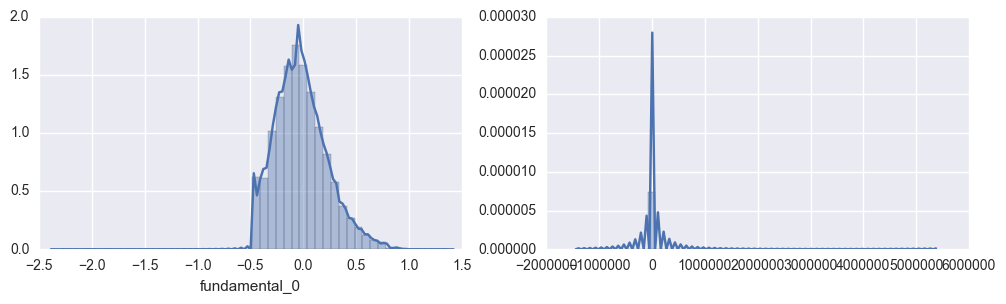

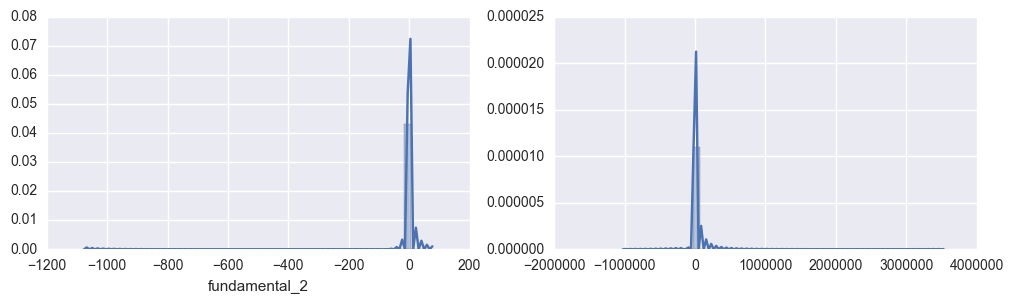

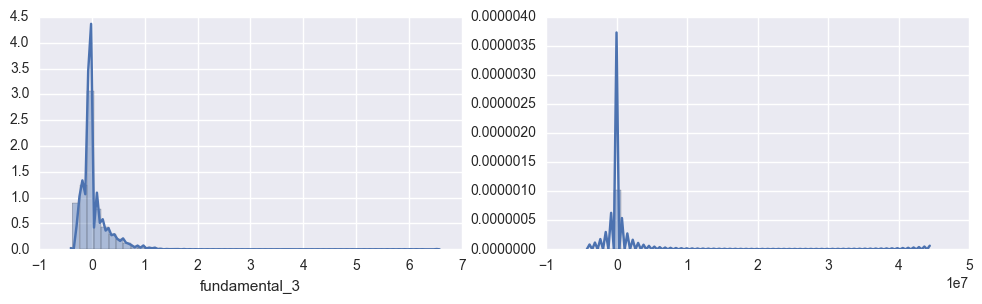

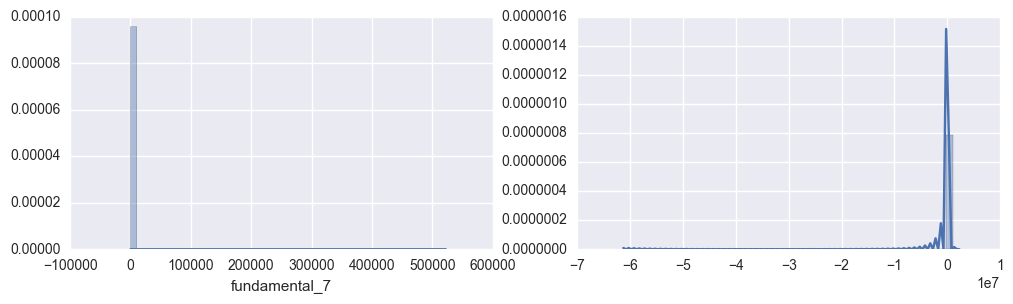

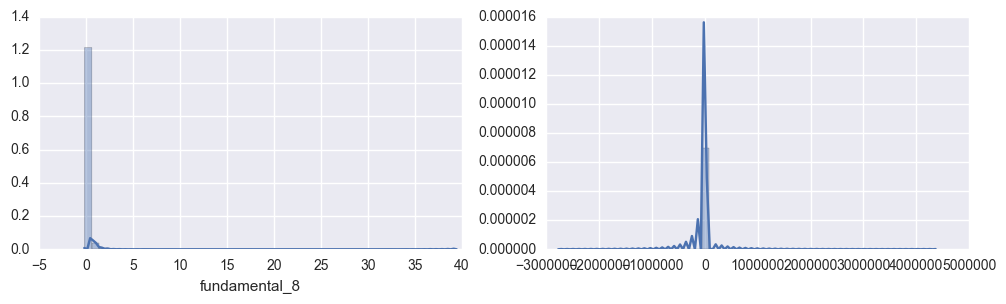

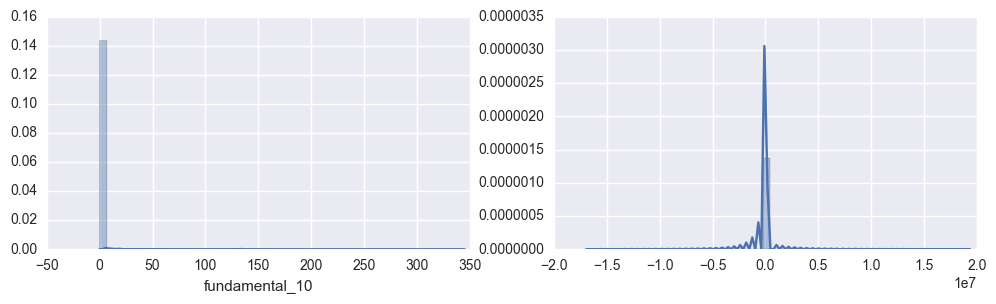

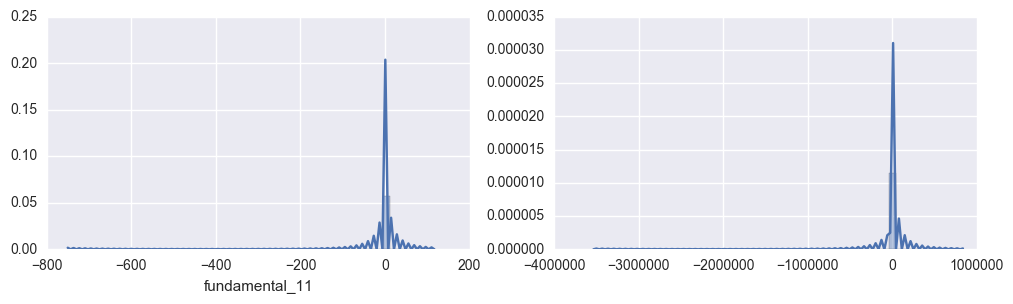

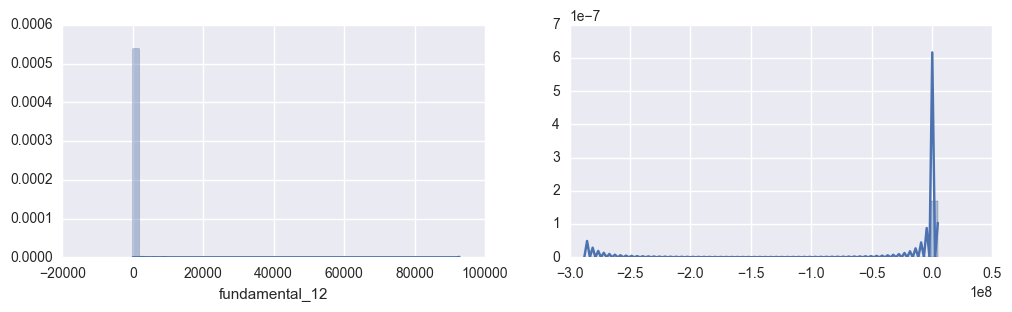

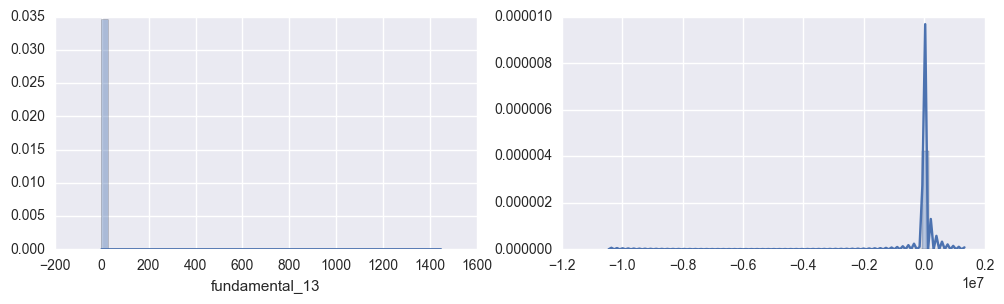

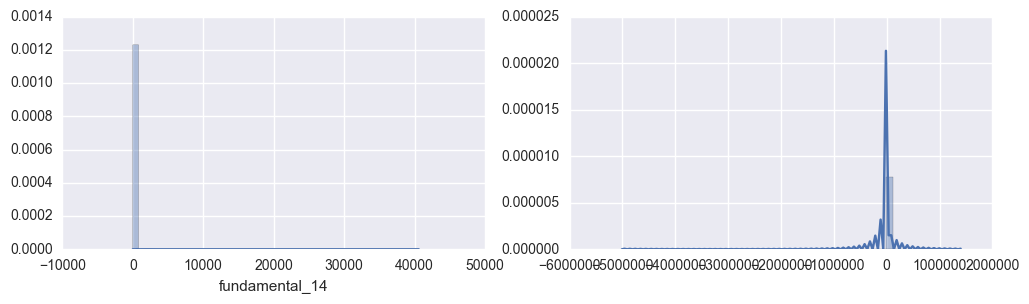

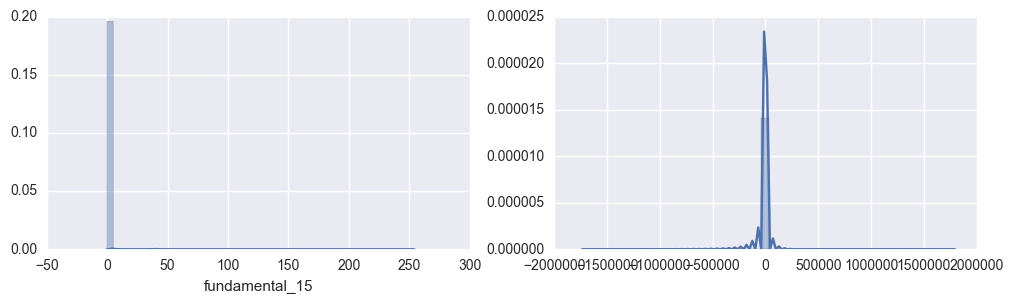

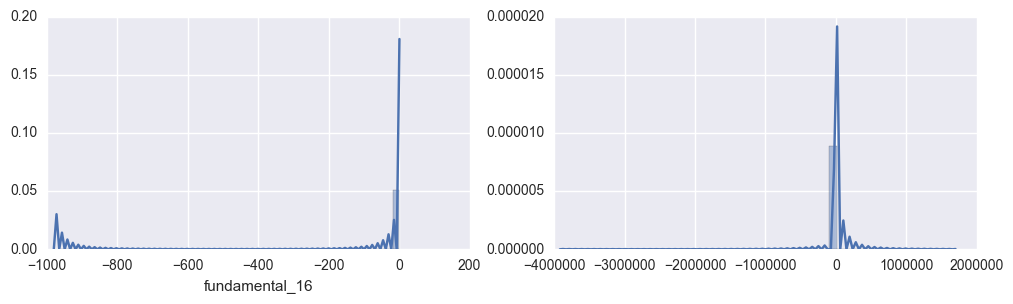

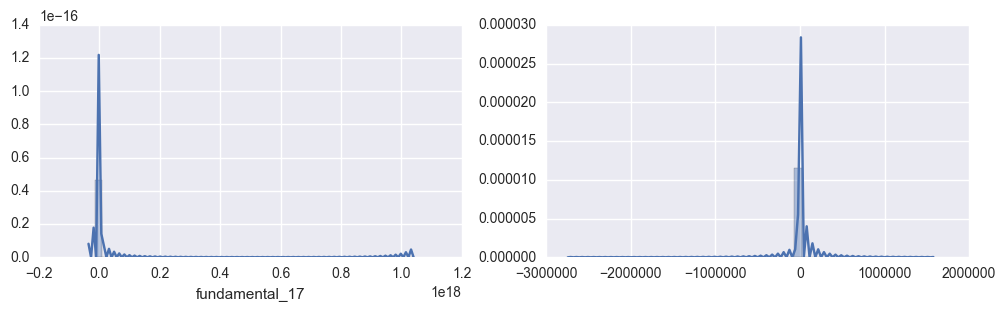

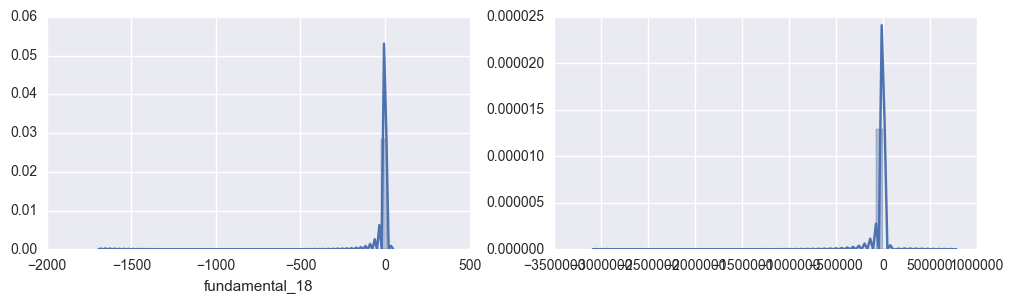

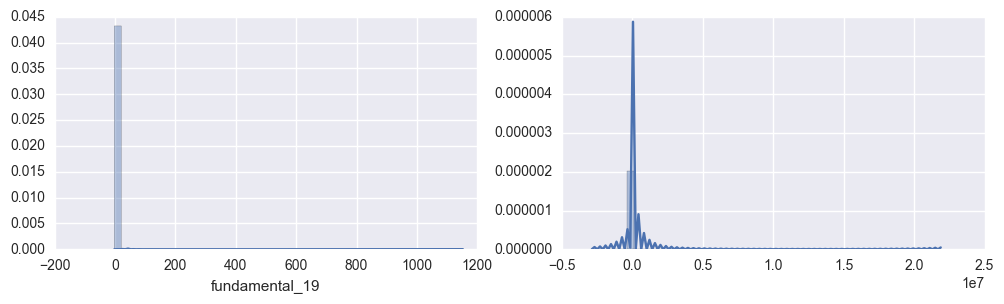

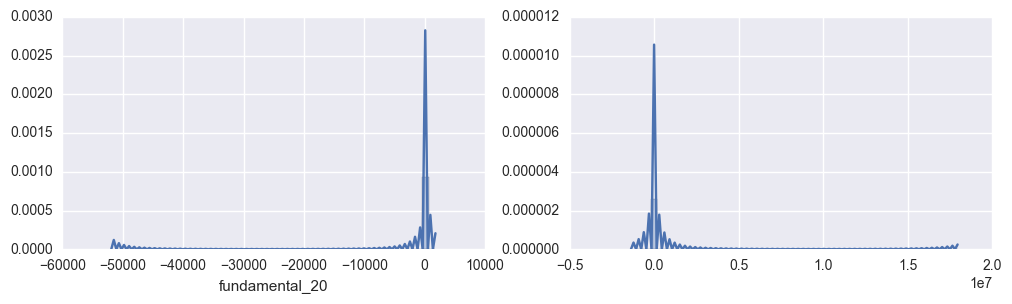

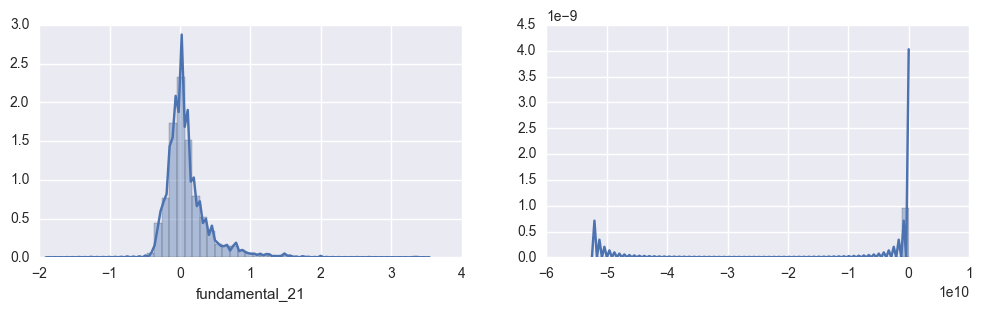

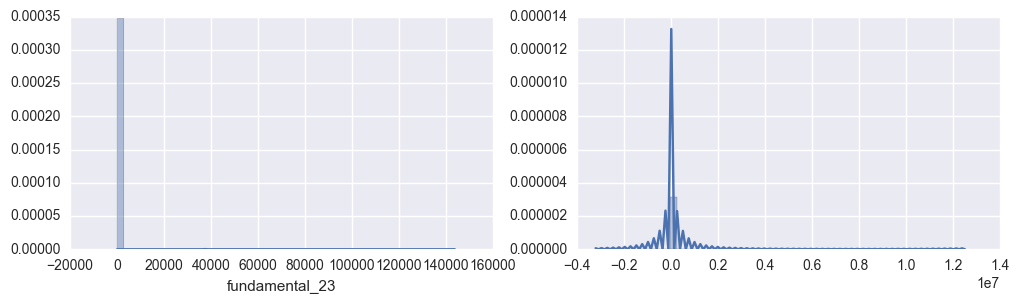

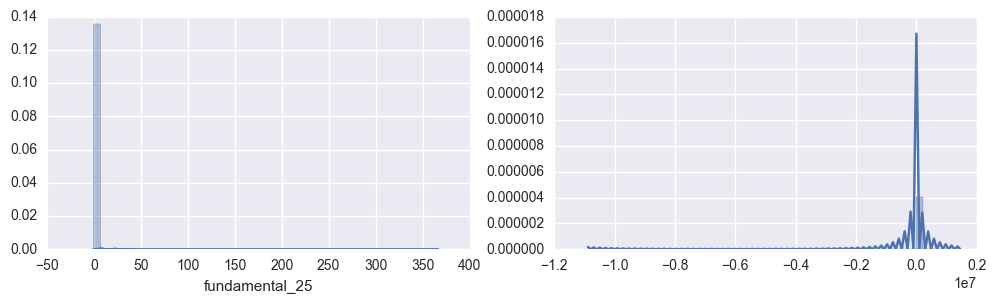

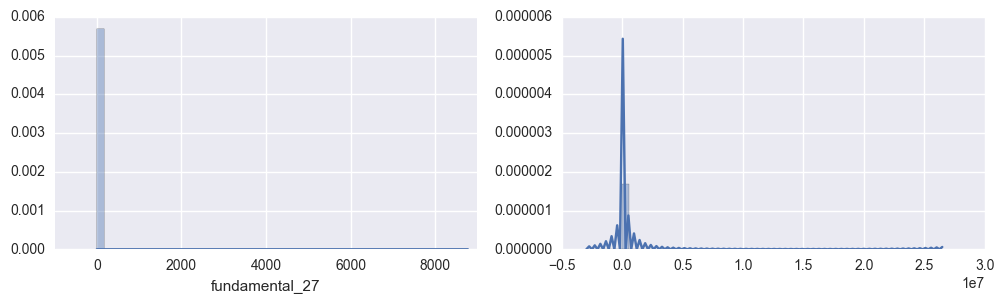

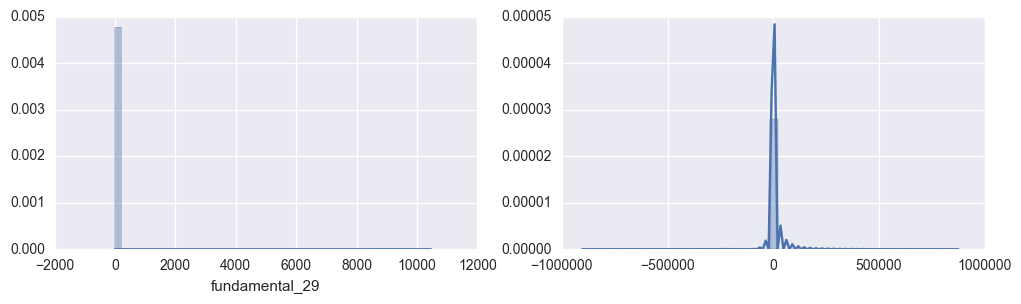

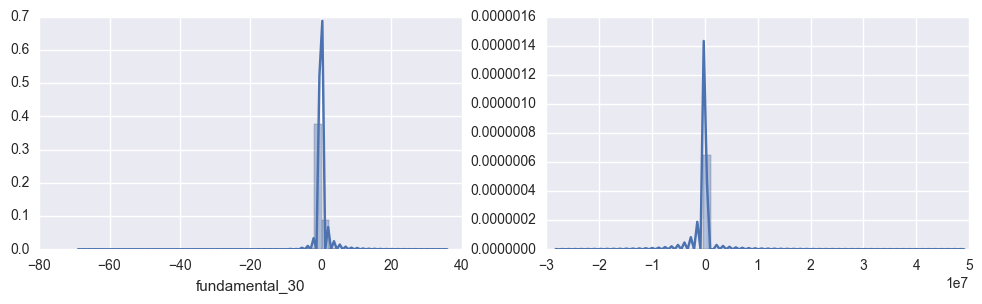

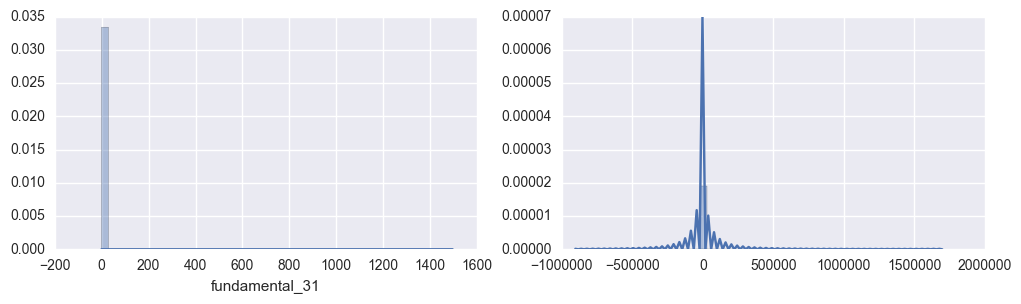

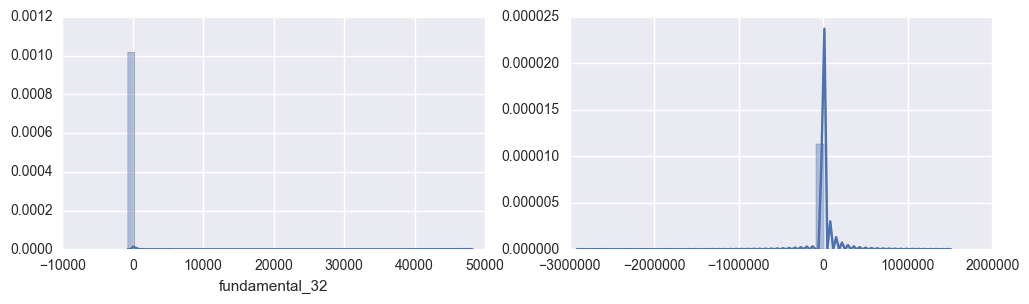

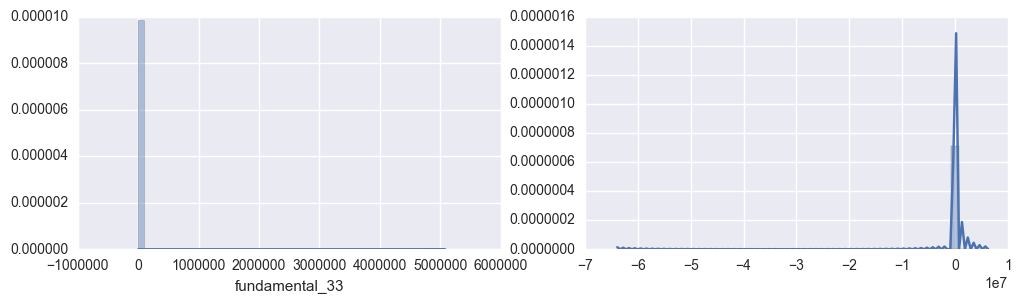

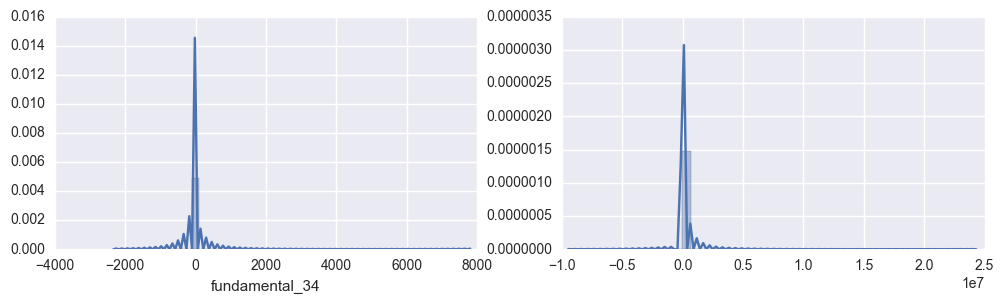

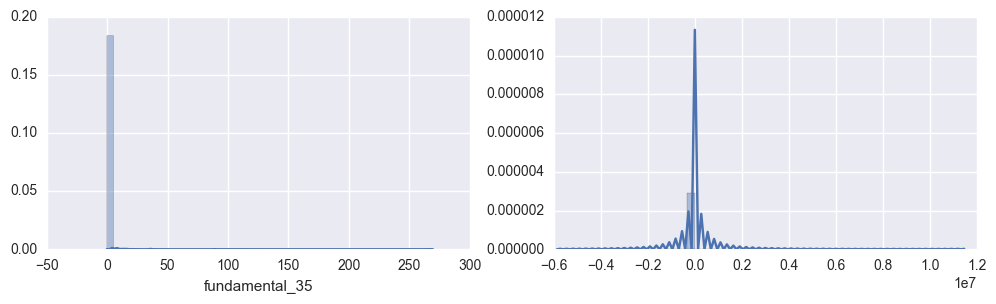

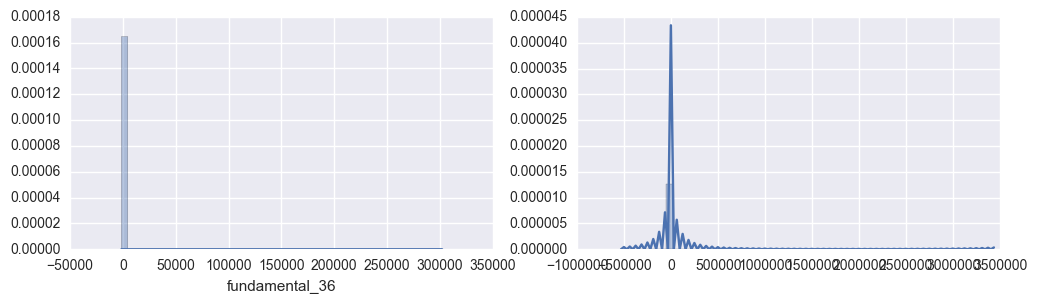

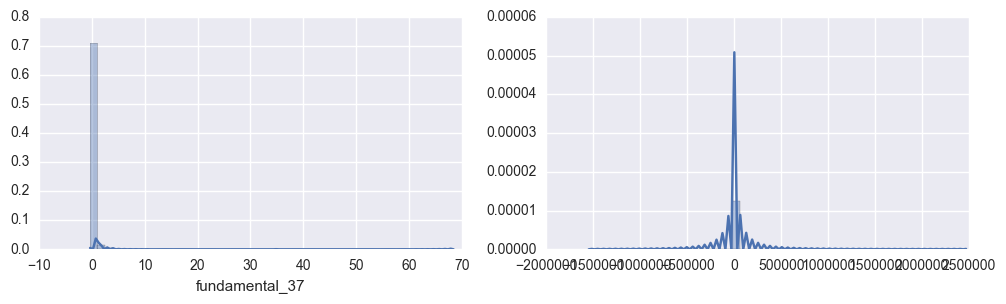

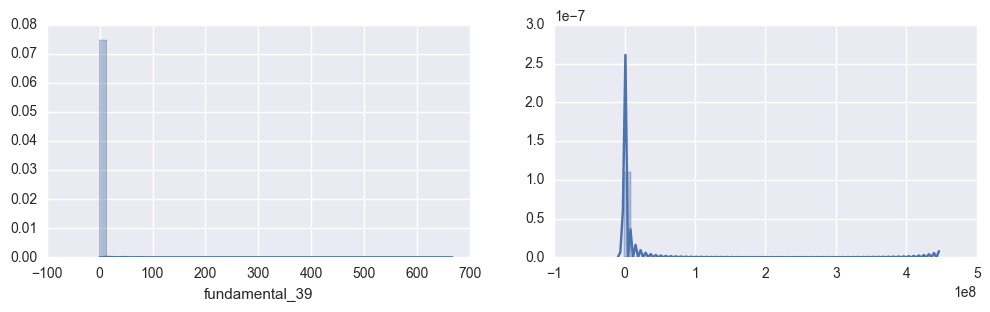

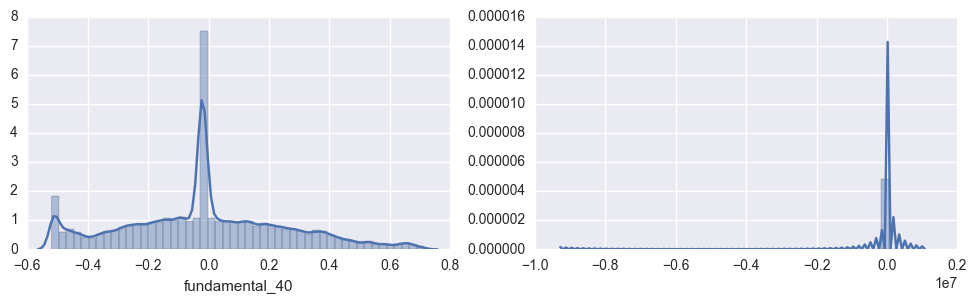

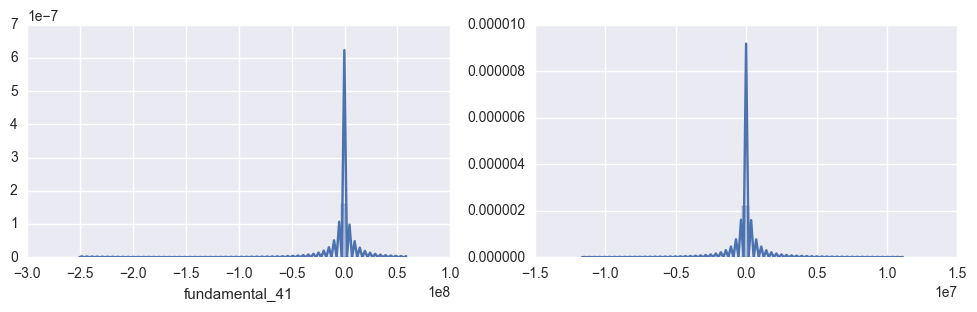

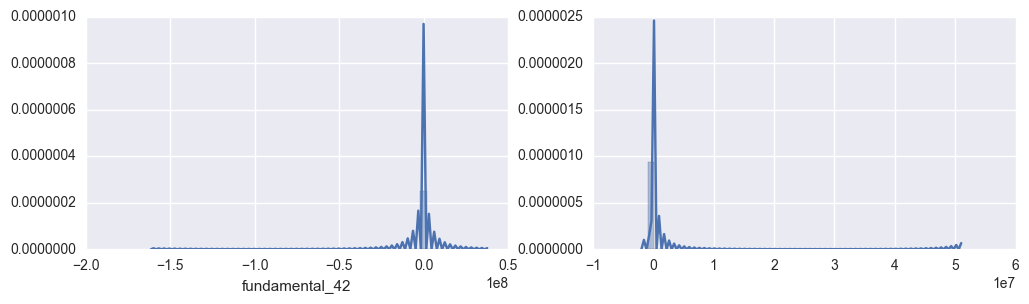

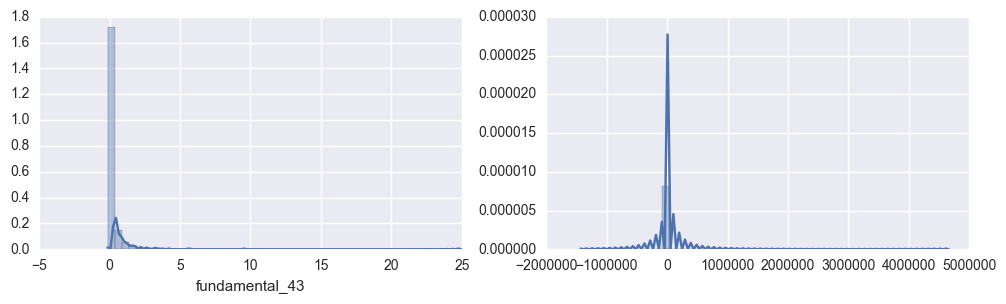

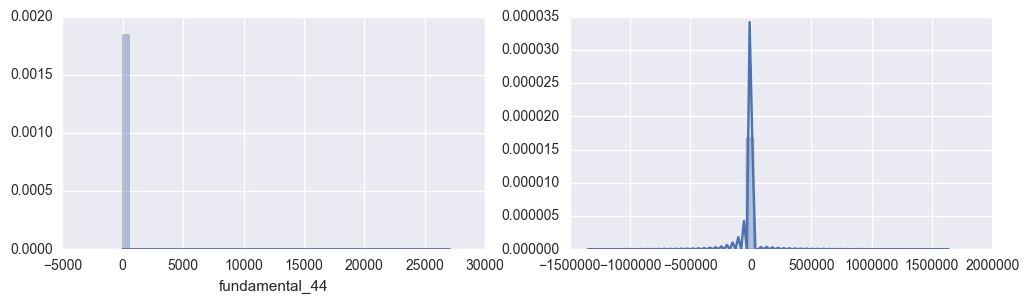

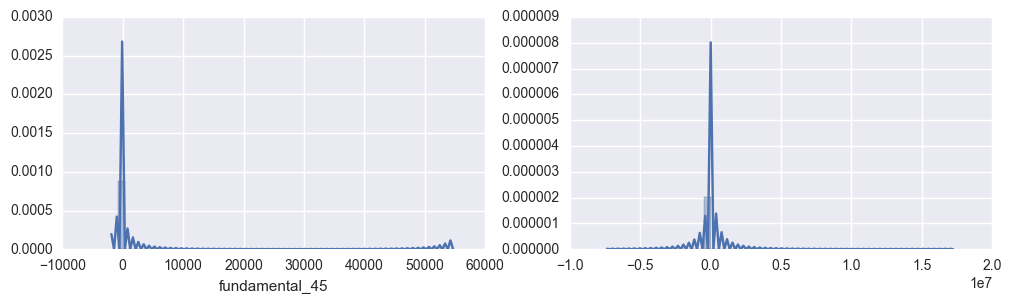

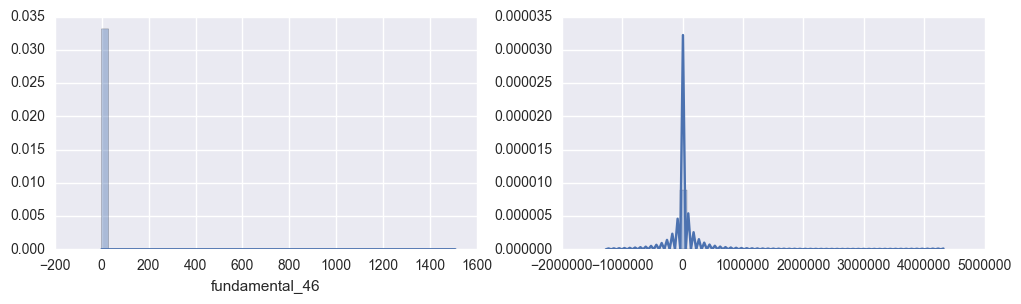

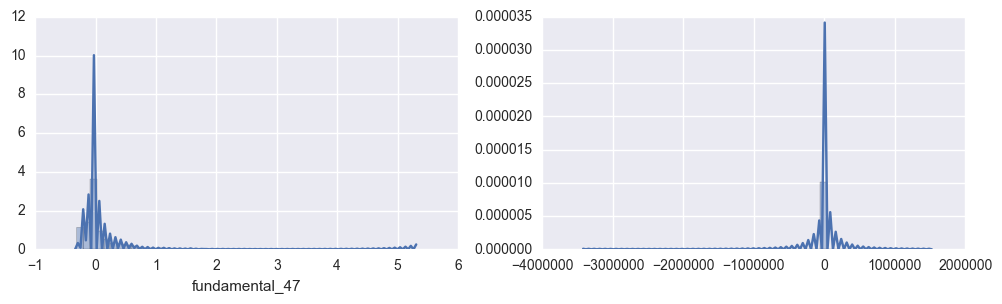

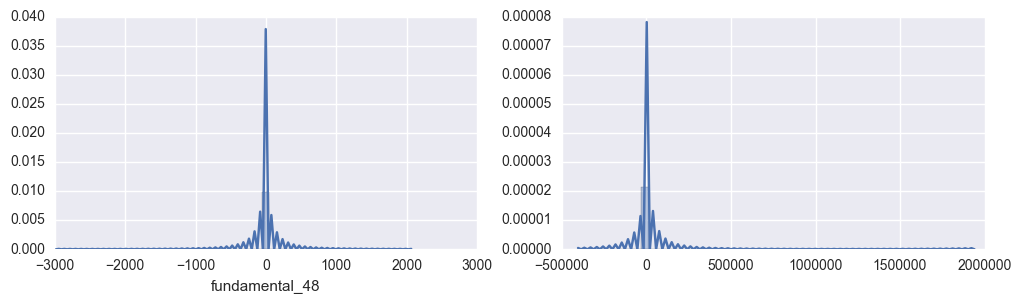

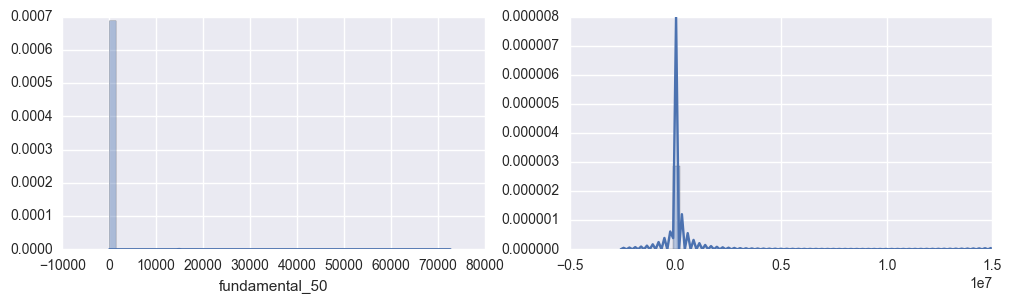

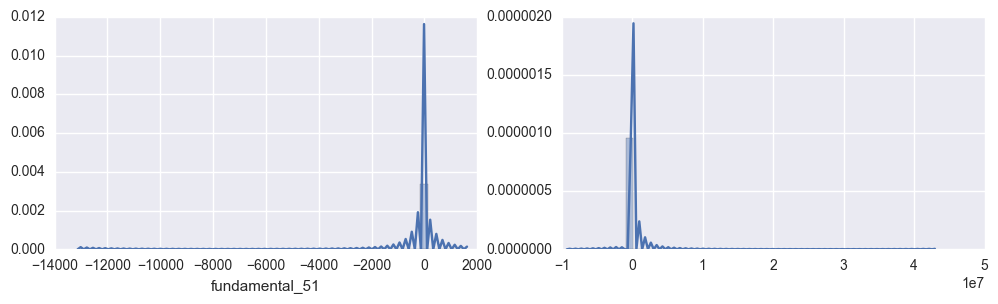

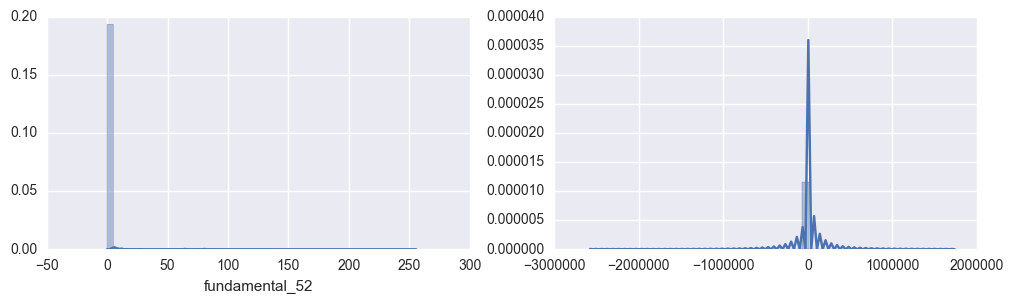

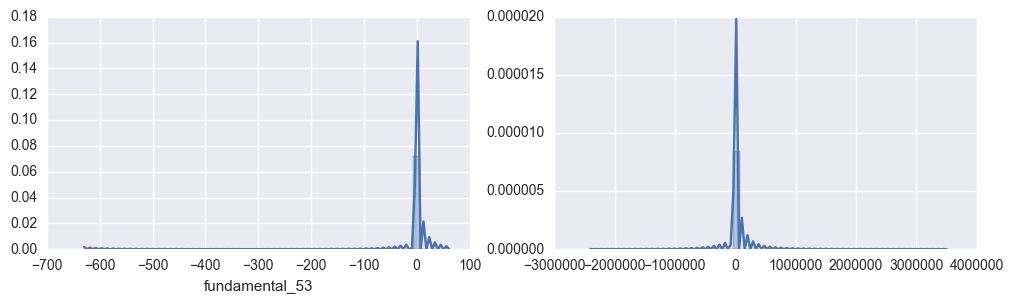

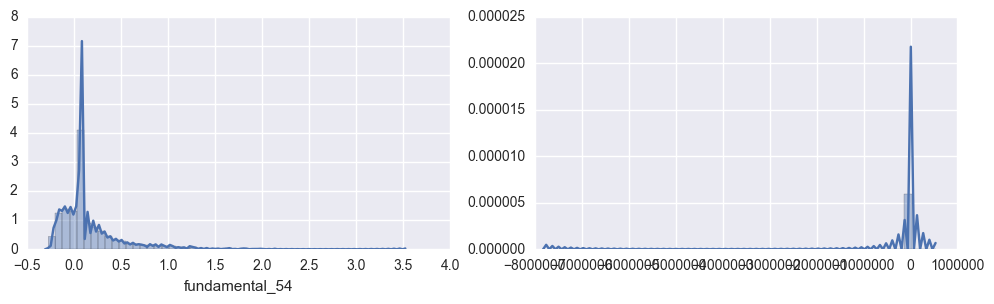

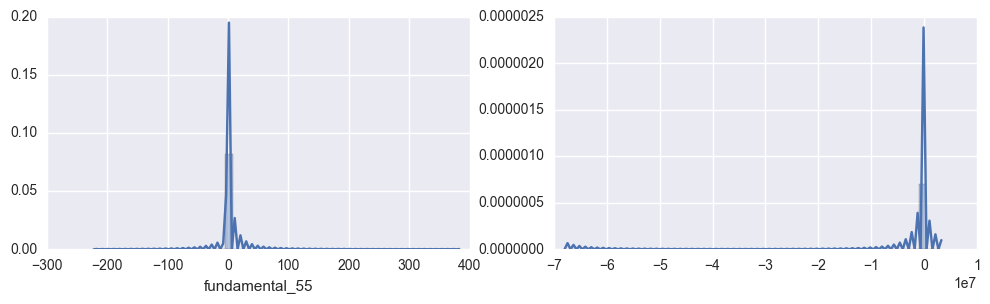

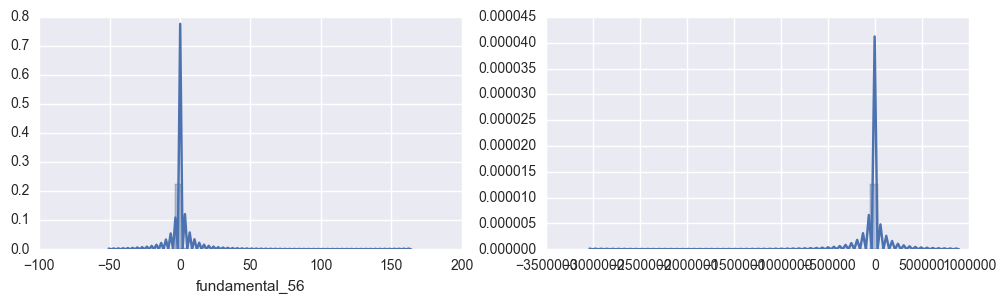

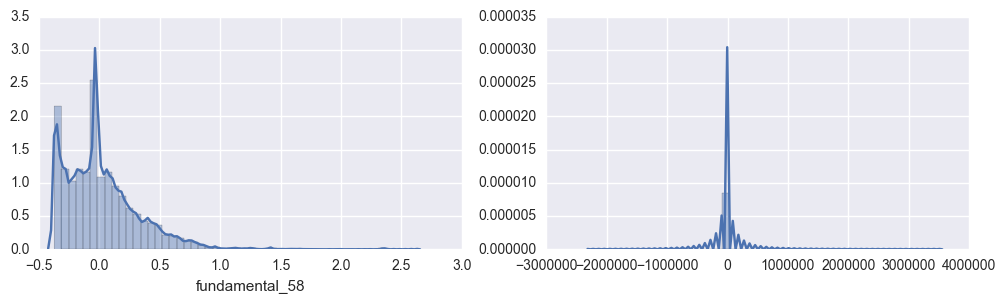

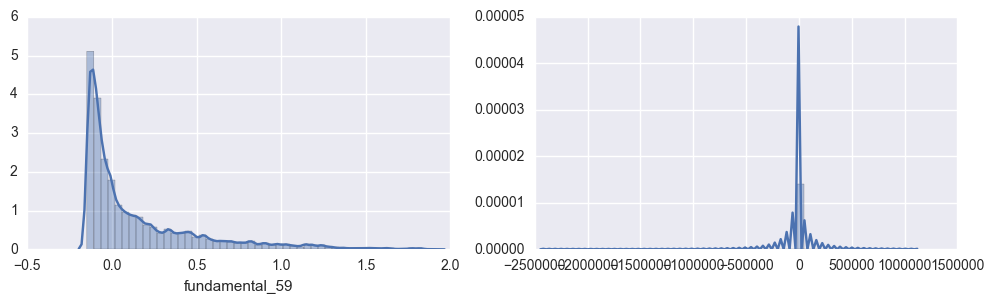

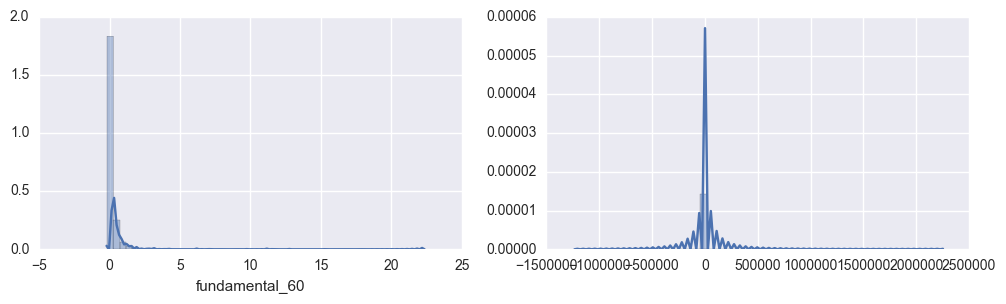

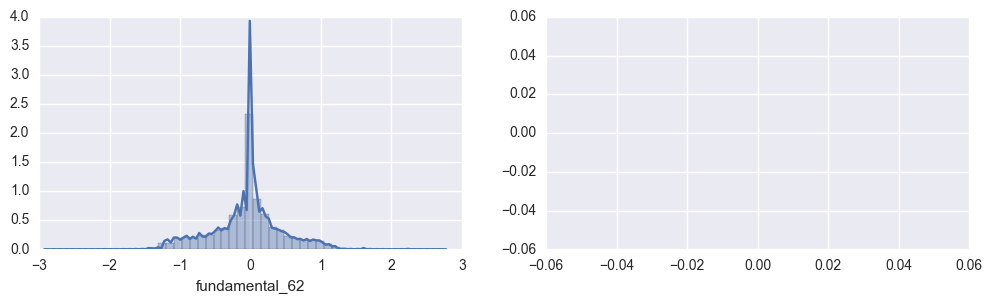

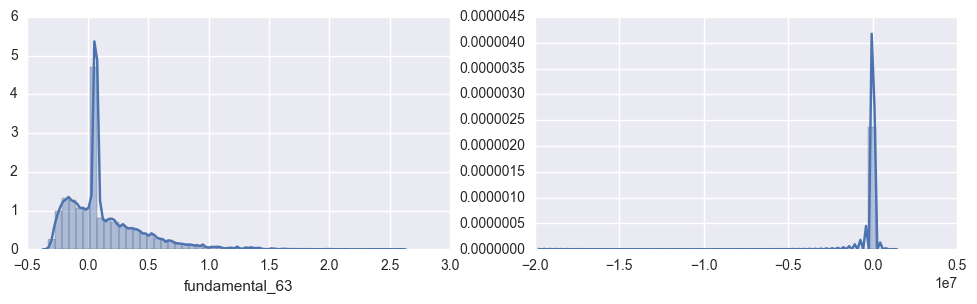

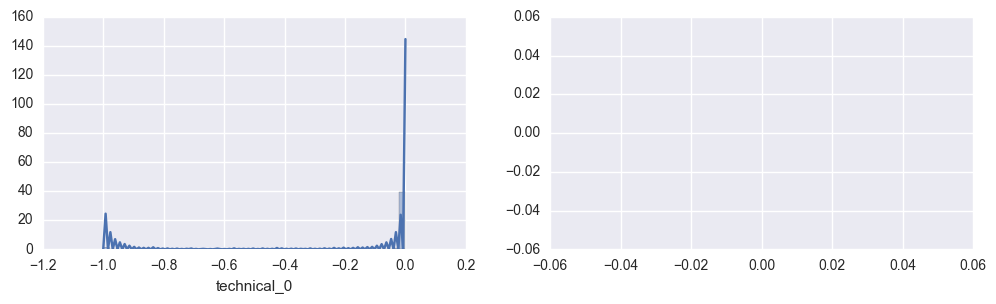

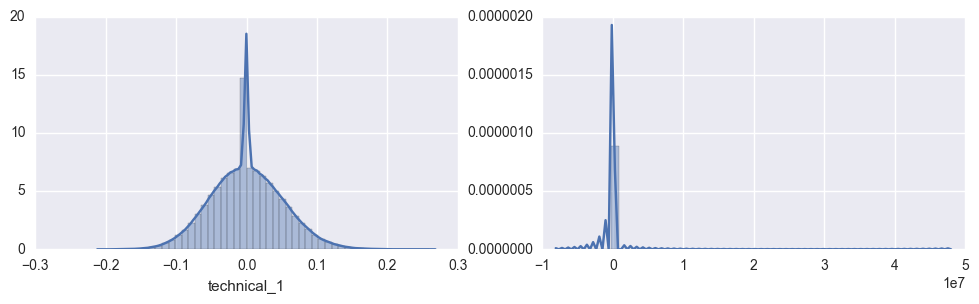

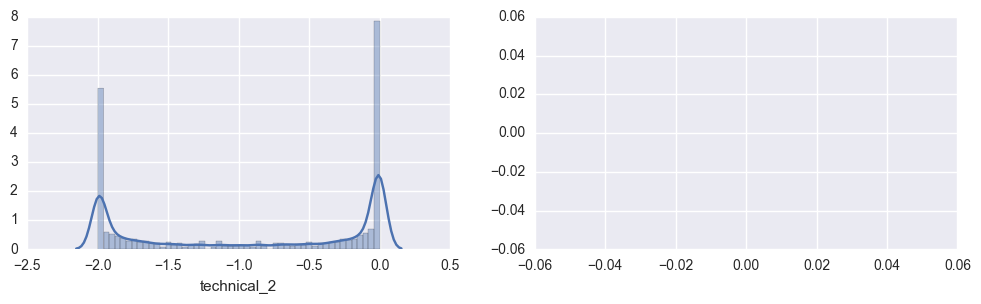

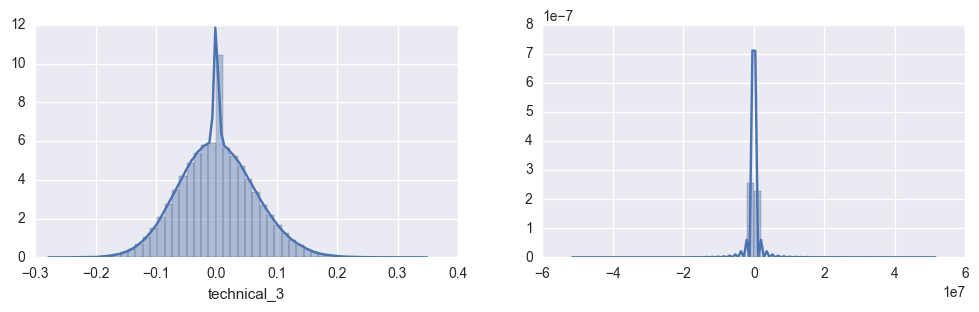

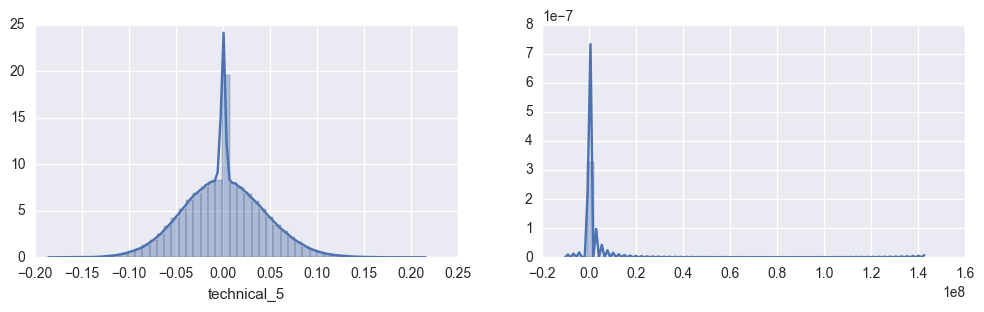

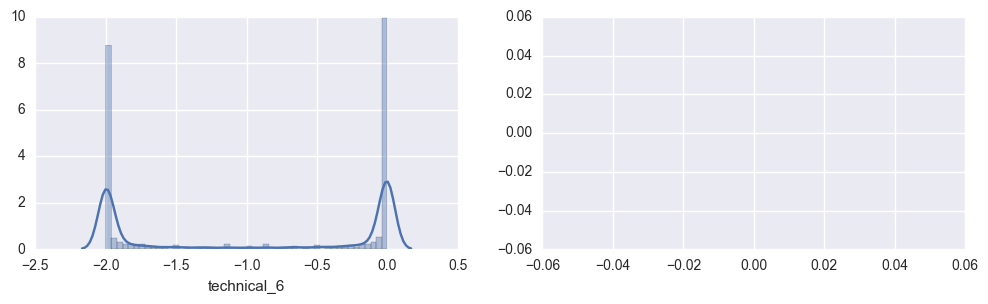

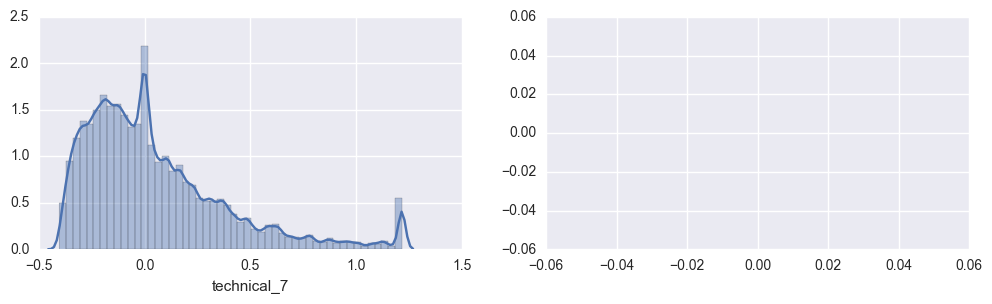

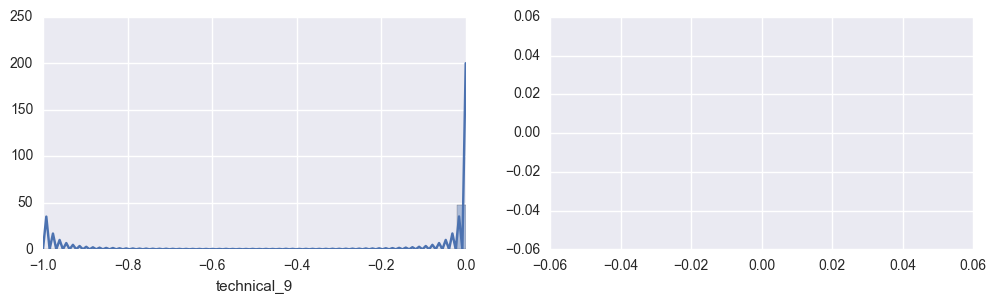

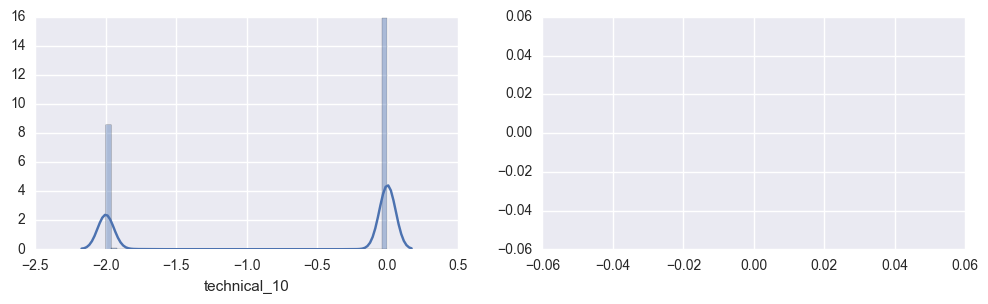

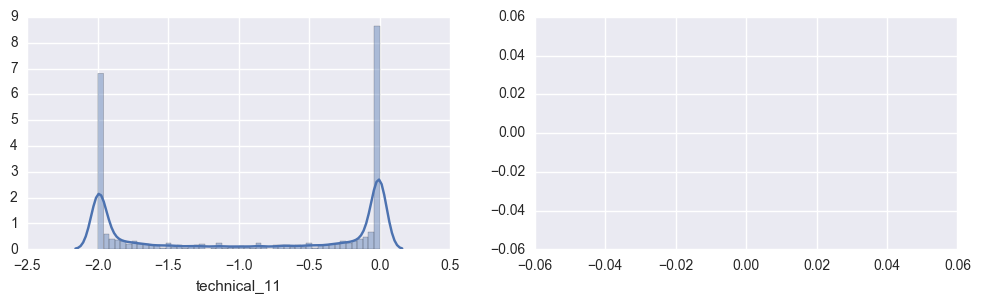

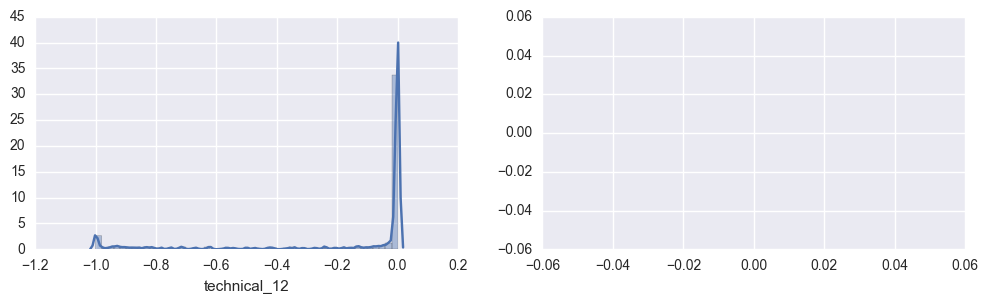

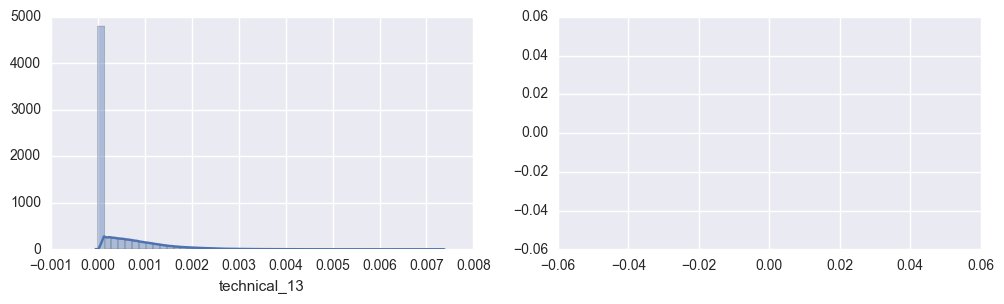

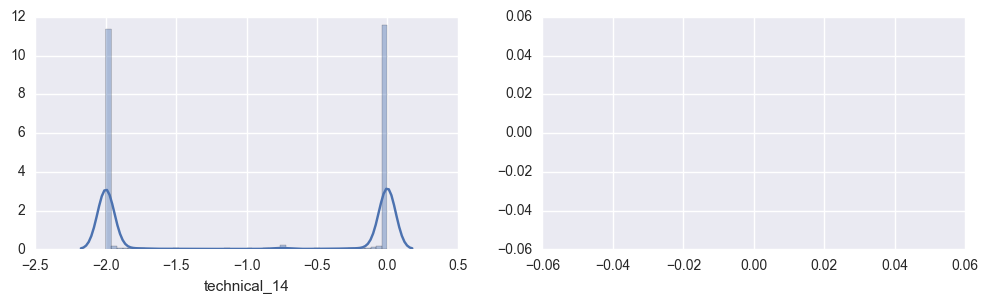

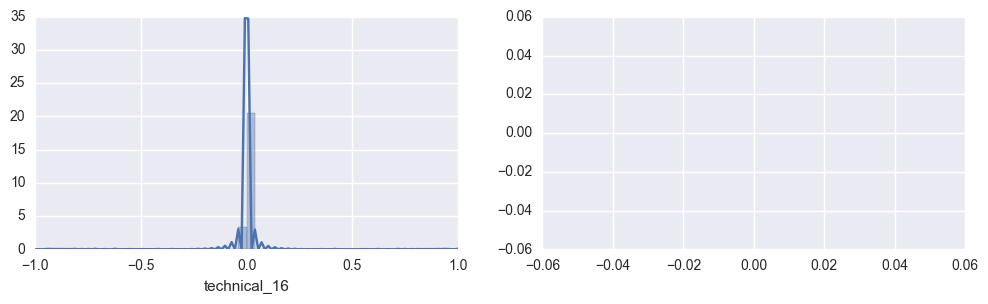

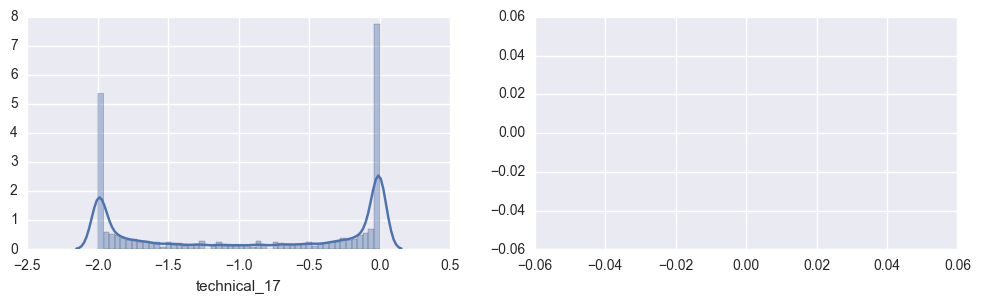

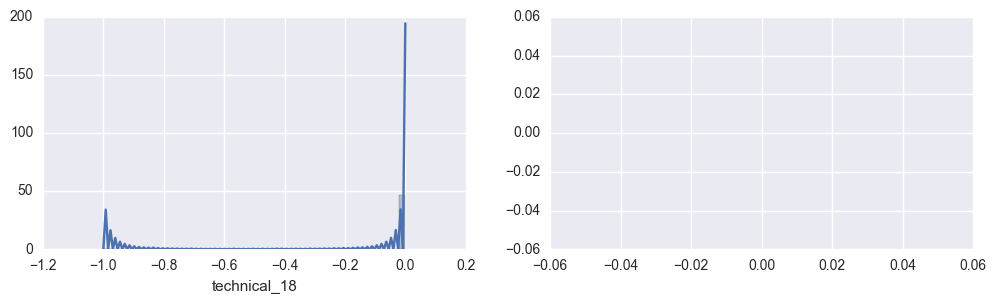

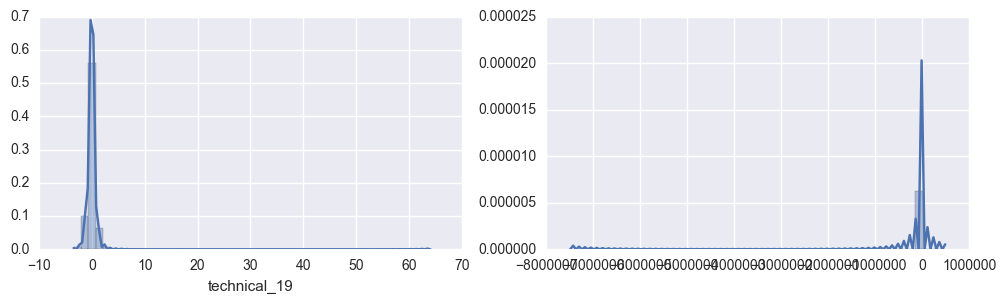

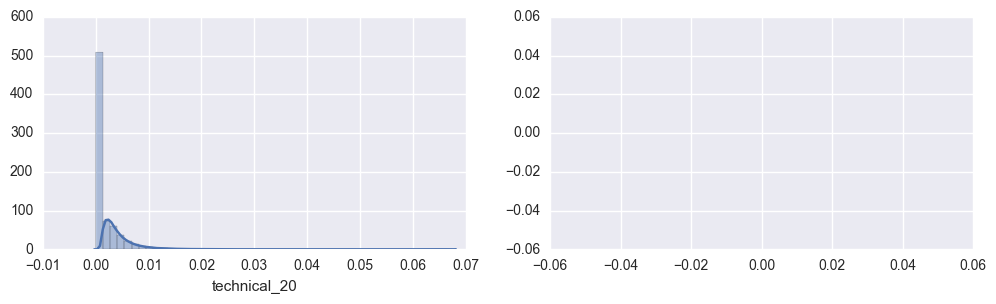

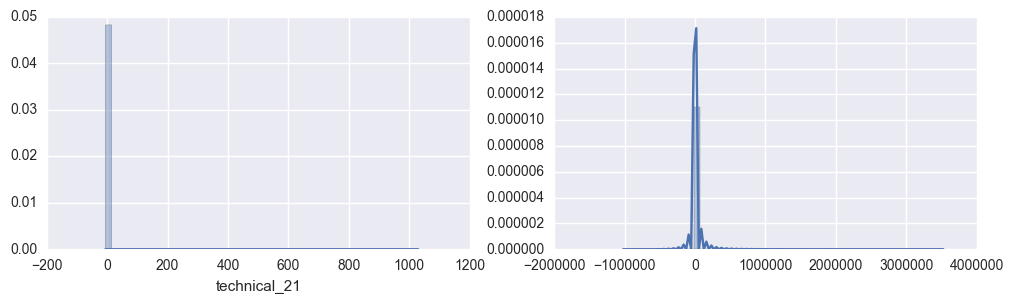

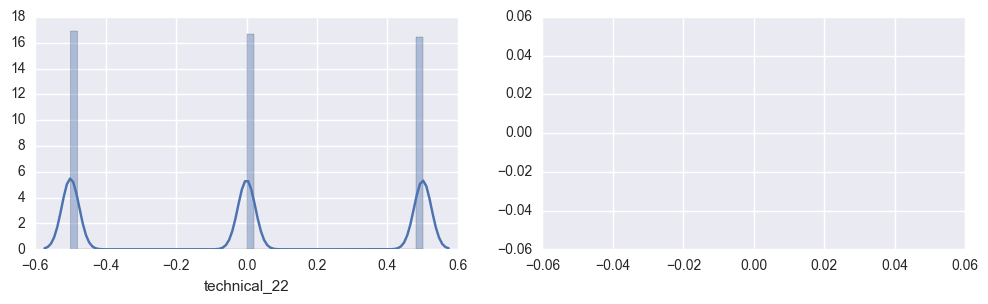

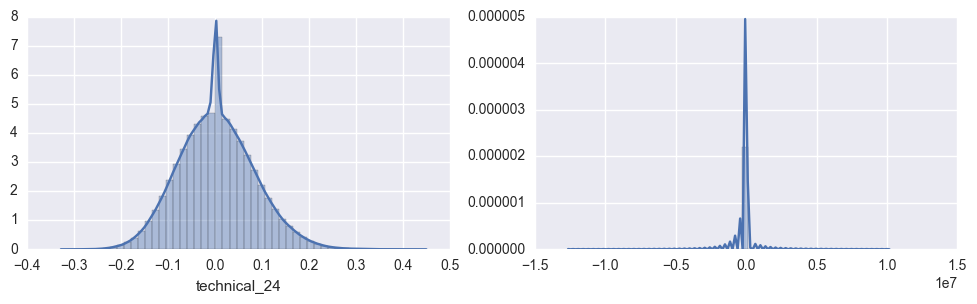

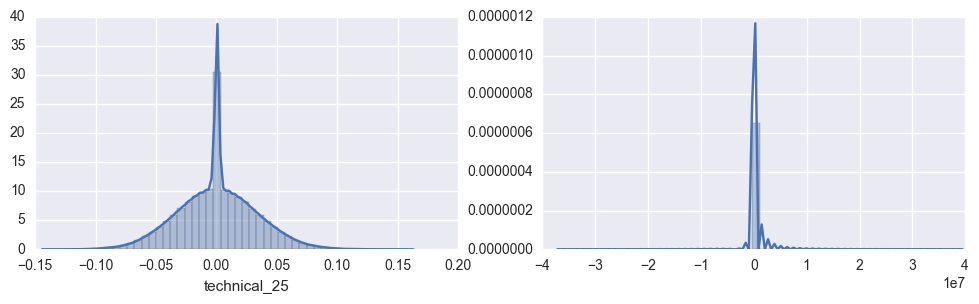

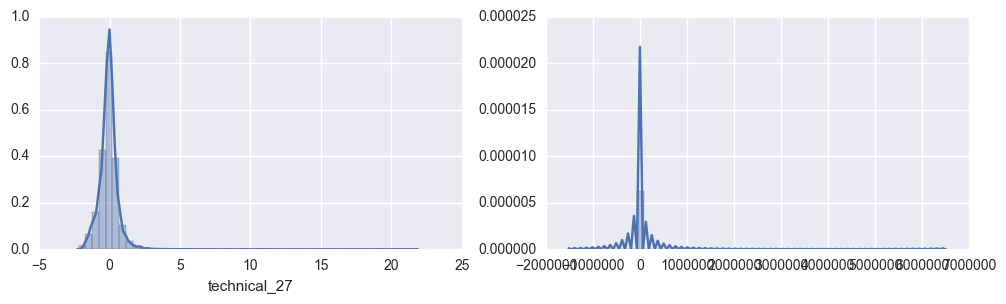

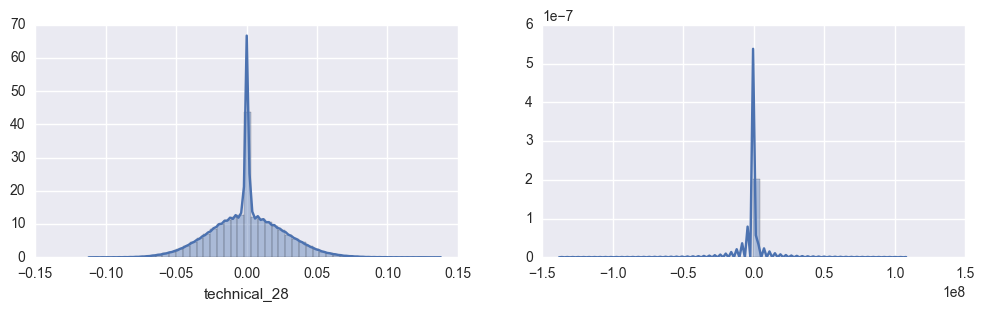

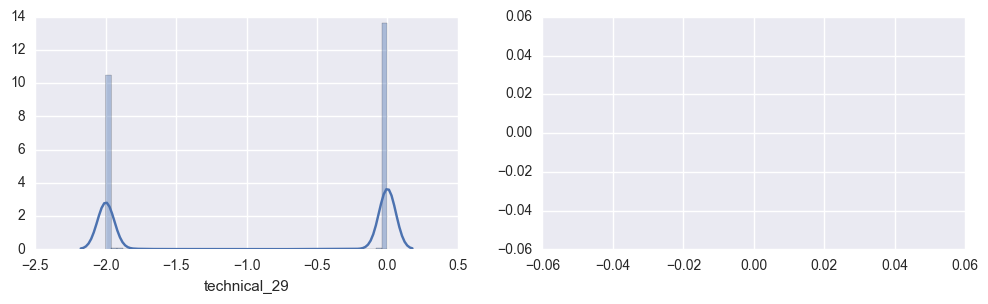

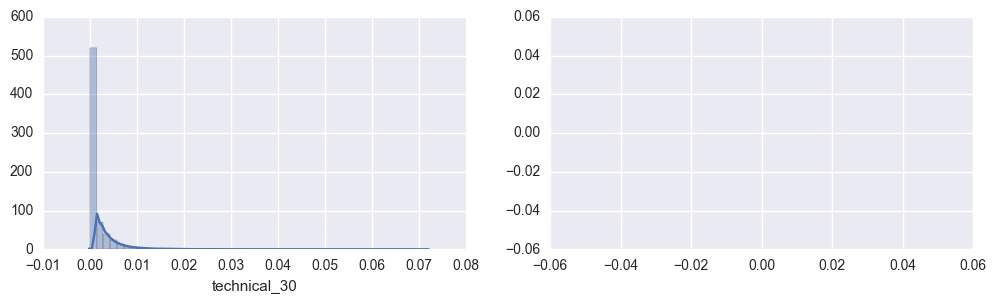

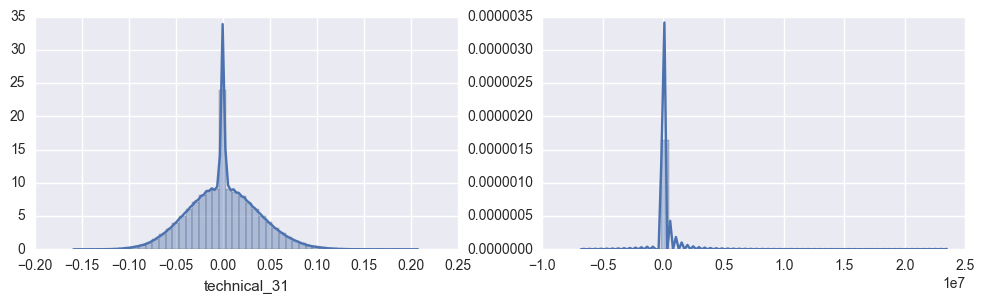

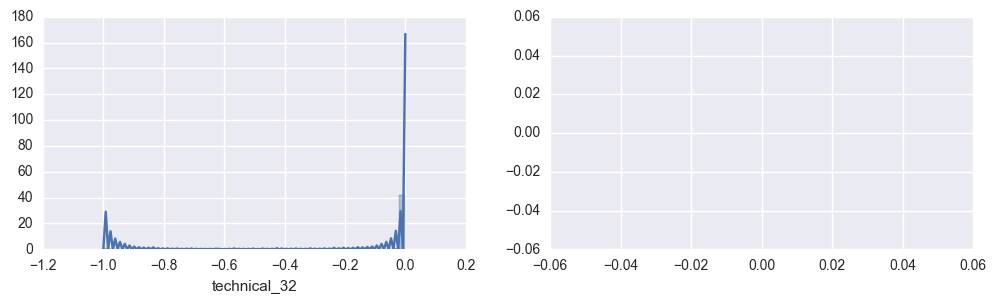

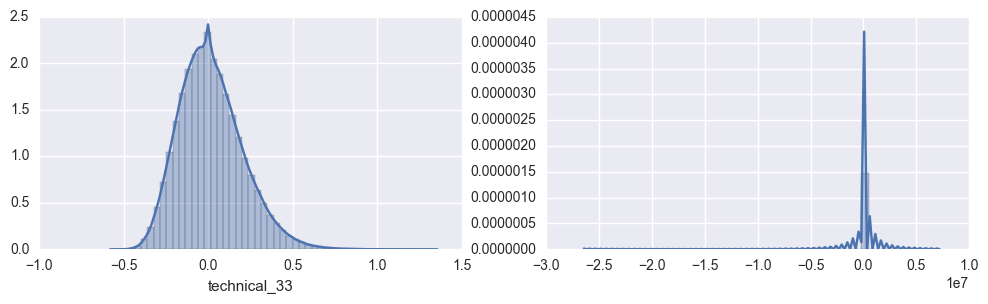

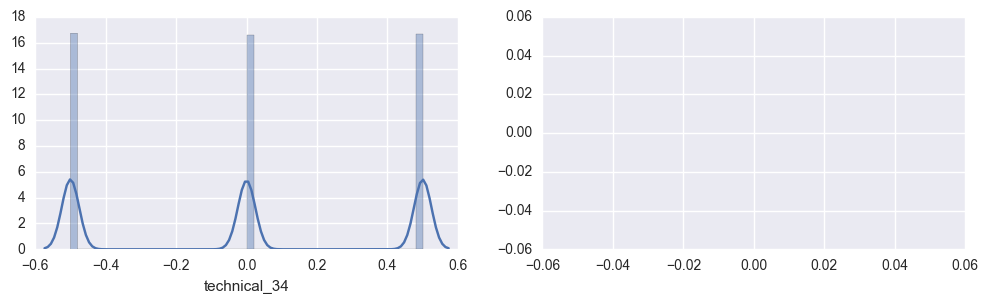

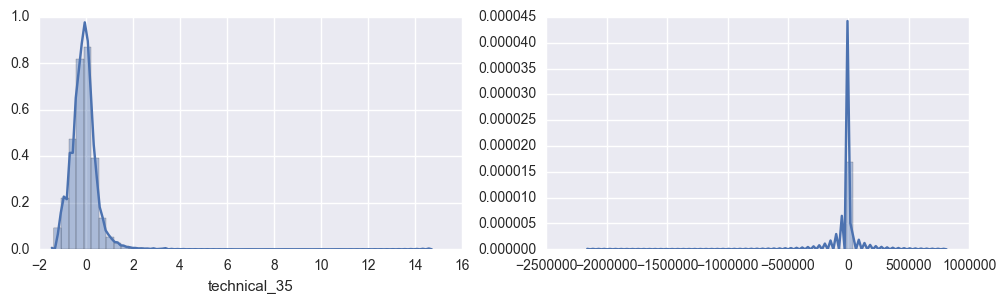

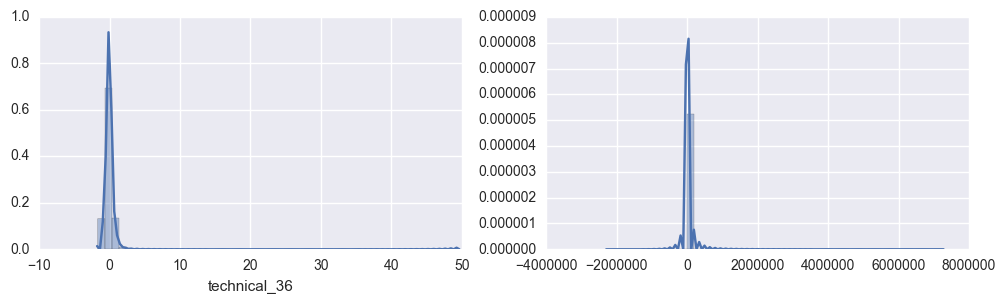

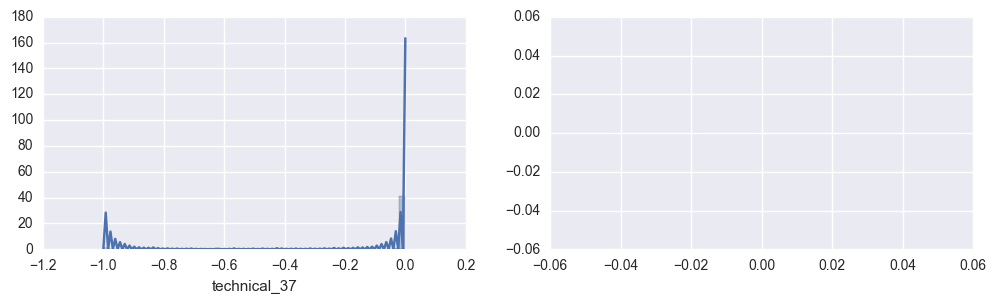

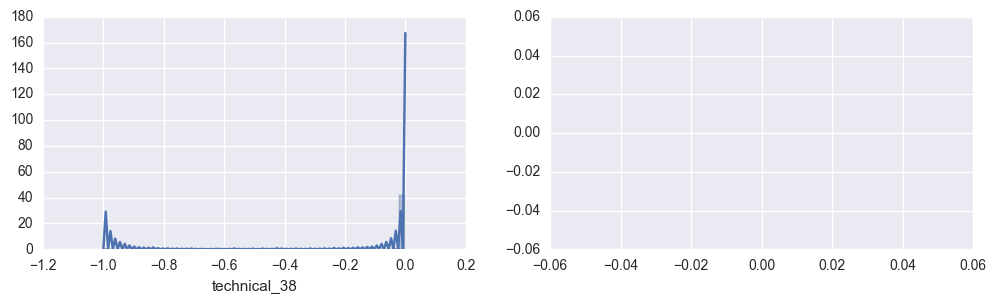

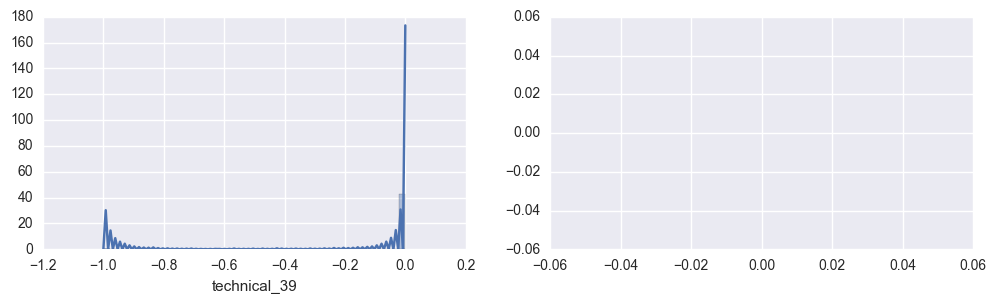

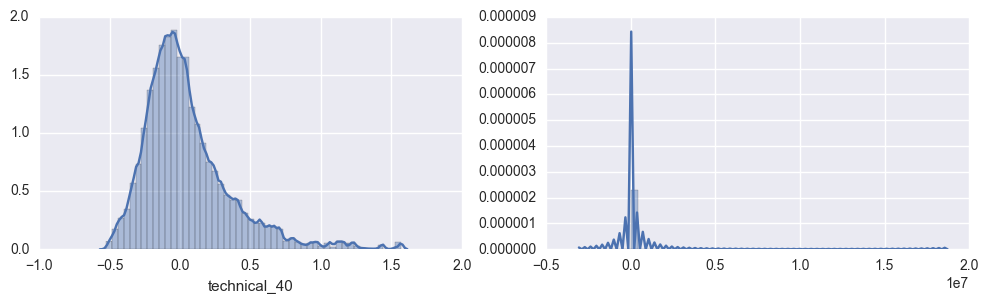

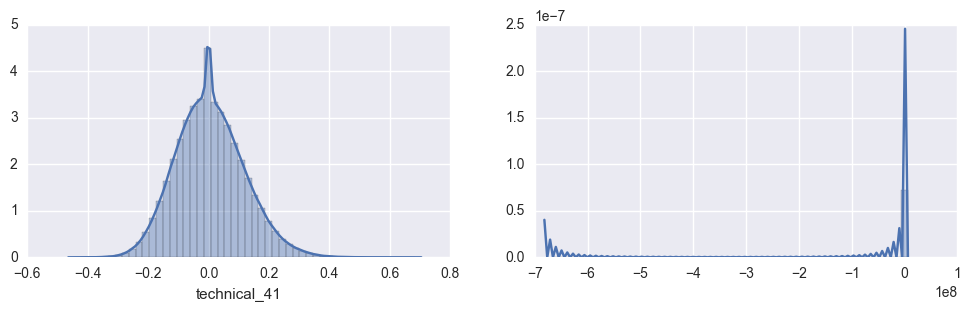

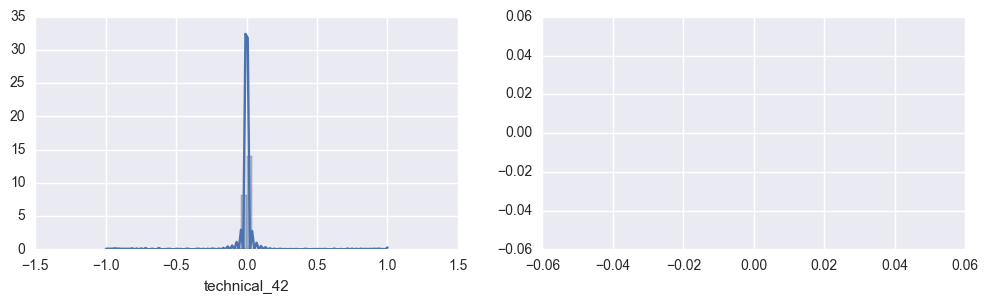

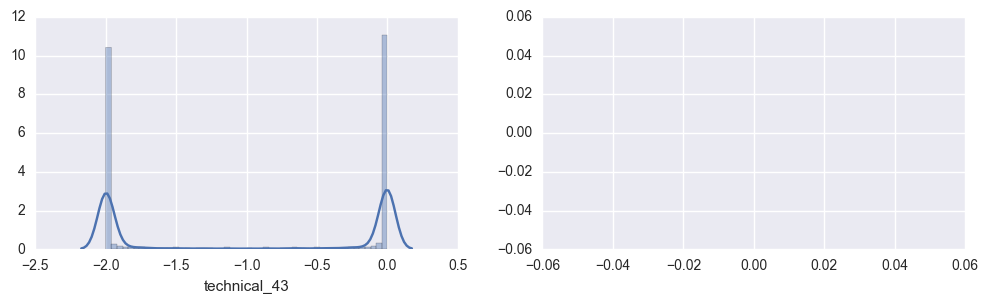

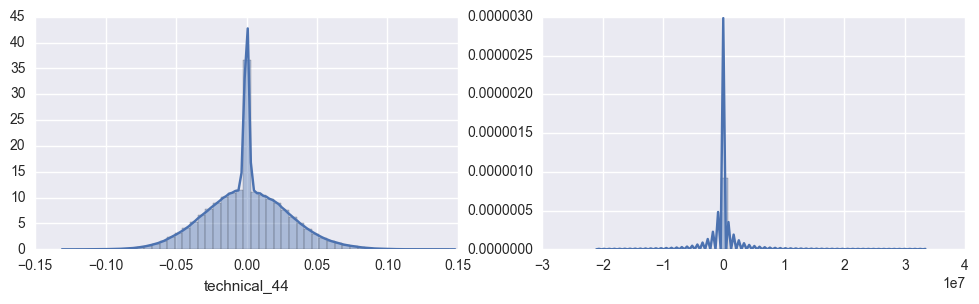

In [16]:
## transform values into their reciprocals for more centralized distribution

df_transformed = df_filled.copy()
non_transformable_fea = []

for feature in feature_cols:
    try:
        fig = plt.figure(figsize = (12,3))
        ax1 = fig.add_subplot(121)
        sns.distplot(df_filled[feature])
        ax2 = fig.add_subplot(122)
        transformed_list = list(map(lambda x:1/x,df_filled[feature]))
        sns.distplot(transformed_list)
        df_transformed[feature]=transformed_list
    except OverflowError:
        print('%s transformation meet a overflow error'%feature)
        non_transformable_fea.append(feature)
    except ValueError:
        print('%s transformation meet a Value error'%feature)
        non_transformable_fea.append(feature)

In [25]:
## add col to indicate if the value is outlier or not

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

for feature in feature_cols:
    df_transformed[feature+'outlier'] = mad_based_outlier(df_filled[feature])

## print the dimension of the input fewatures
print('till now , we have %d features'%(len(df_transformed.columns)-1))

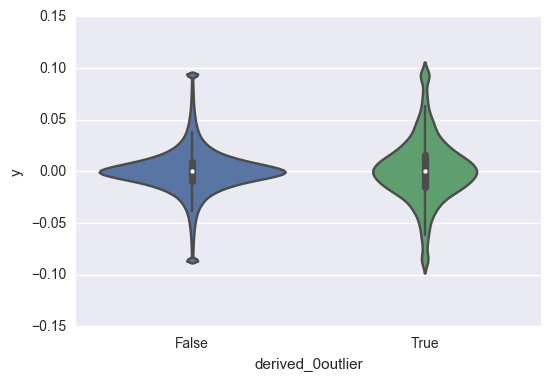

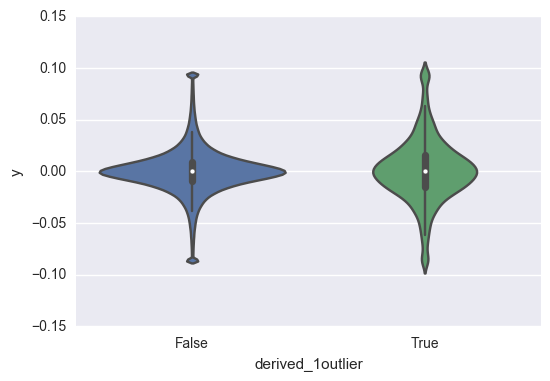

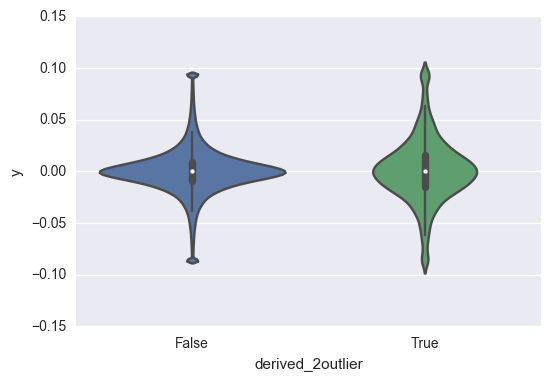

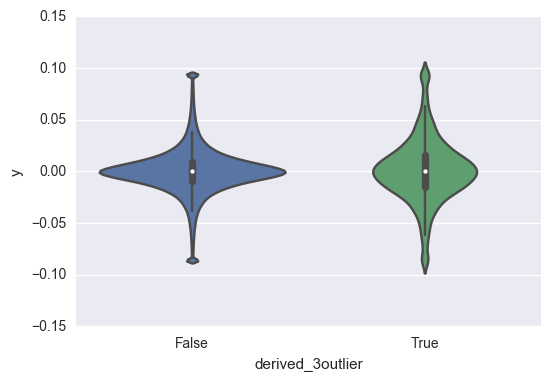

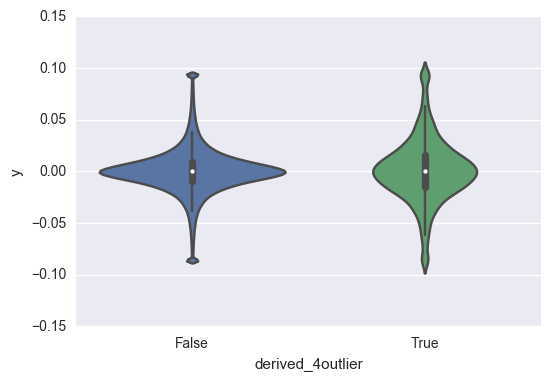

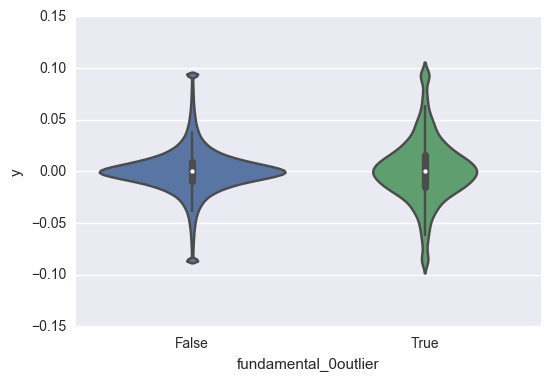

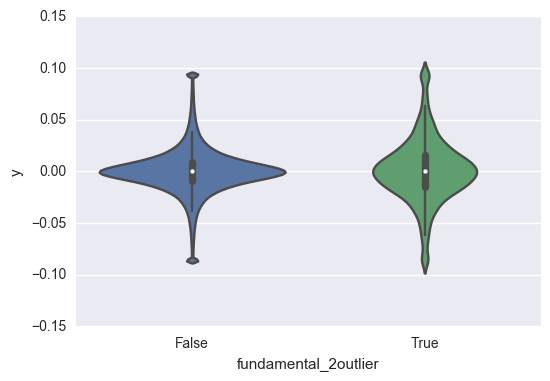

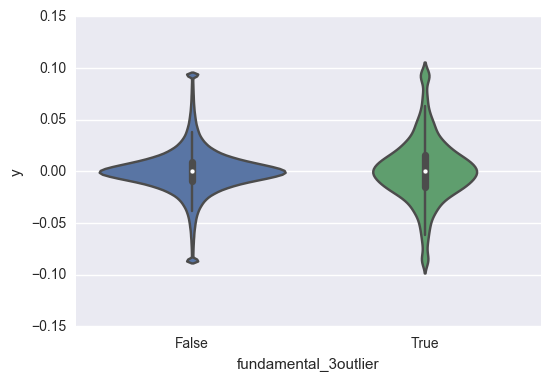

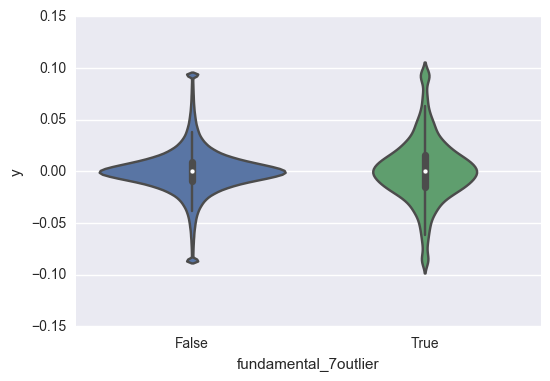

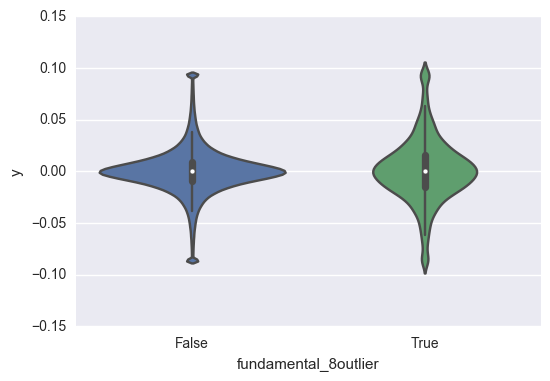

In [36]:
# check univariately if the outlier category have effects on y value
n = 0
for feature in df_transformed.columns:
    if 'outlier' in feature:
        n+=1
        plt.figure()
        sns.violinplot(x=feature, y="y", data=df_transformed)
    if n>=10:
        break

In [39]:
df_shuffled

id  timestamp    derived_0   derived_1   derived_2   derived_3  \
0         797        260   -12.524064  -16.967386   47.404485   10.160644   
1        1677       1582    -9.530091   94.750724    5.360682   -3.543989   
2        1019        338     8.763955   26.515179   11.590753   -6.441856   
3         580        356    -5.022391  -29.065149   77.127516  -78.990484   
4        1036         69   -31.583120    4.173087   -0.588276   -4.288424   
5         235         34     2.219860   23.886712    5.429184  -59.616759   
6        1103       1676    21.082806  -49.845702 -102.797150    1.882560   
7         257        637     1.553547   12.228335   -1.509105    1.993854   
8        2008        911     1.103947  106.706085  -12.375065   11.112802   
9        2068       1195     3.875716 -205.896740   -1.332721   -1.340994   
10       1422        243    51.448416  -20.668913   47.404485  -87.599777   
11        637        628   -18.821099  -33.308472   -3.035445    1.761437   
12       1673       1462 -1194.989906  181.059112   -1.126479  403.940125   
13       1408        703     1.296309    1.668978   -0.885100   -8.764831   
14        319       1625    -0.991877  106.918389   47.404485   -8.177010   
15        833        861    -0.631192  -88.314718  175.484742   51.787894   
16        329       1147     2.810694   24.022581    2.982390   37.066212   
17        881       1755    -0.744772    8.874021   47.404485  -55.184364   
18       2129        706     3.548261  -34.036981   47.404485    1.593470   
19       2134        741     6.556664   74.426929   -2.161436    1.664331   
20        159       1393   -13.730770  -24.185675  -18.606624    0.525348   
21        585       1710    -3.962643   60.185784   47.404485   23.020254   
22       1772       1715    -9.154014   13.597649    6.854838  -38.069158   
23        979        271    -7.822406    5.443925   -1.420731    2.647968   
24       1578       1321     1.957168   17.063182    4.790502  496.402160   
25       1536       1317   -55.298888 -138.267399   -9.448730   -6.256832   
26       1688        628     3.451689    3.756959   -0.417798   -3.468666   
27       2108        560     5.133654   14.947132   47.404485   -6.499820   
28        340        939    13.171203   47.845986  -14.055209  -17.669671   
29        686        646    -1.320762   19.308875  -21.664124   -5.022802   
...       ...        ...          ...         ...         ...         ...   
1710726   429       1534     0.370625   88.033092   47.404485    2.088311   
1710727  1093       1750     6.854136   39.001501    0.706034    3.459619   
1710728  1230       1076   149.615084  -21.993804   47.404485   14.155504   
1710729  1194       1195    35.551403  -51.129750  625.433873    4.322442   
1710730  1296       1768    -3.675029  -18.969781   47.404485   -0.679901   
1710731   765       1217   -14.919566   36.775451   47.404485   -1.385127   
1710732  1677        577    22.459164   41.441018    4.329614   14.100866   
1710733  1139        926 -1194.989906  181.059112   47.404485  403.940125   
1710734   952       1637    -1.829972    4.088671    2.826257    2.739275   
1710735   481        893  -197.912010  -33.074600  -32.232419  350.975277   
1710736   863        583   125.082674  -15.977626   47.404485   -1.219332   
1710737  1225       1756    -4.126209  -20.217042  -15.405387  -12.290016   
1710738   686        797     2.402908   98.140416 -210.369503   -7.793065   
1710739   763        759    -3.328765  -34.383870   47.404485  -10.513963   
1710740  1072       1378    12.678297  -24.209130  -16.757369   -6.591475   
1710741  1566       1812    -5.001350  -41.330254    8.497675   -3.634518   
1710742   396        655   -23.000149   16.531021    3.683535  403.940125   
1710743   938        649     1.242076    3.181002   -0.499901    0.987309   
1710744   938        154     0.793803    2.208780   -0.864721   -0.090009   
1710745   484        983     5.173536  -52.535528   47.404485   10.909958   
1710746

In [28]:
df_shuffled.ix[mad_based_outlier(df_shuffled['fundamental_0'])]['fundamental_0']

2          4046.211761
9          -924.185505
17           30.042589
19         -257.431730
97          -40.732400
114          89.148584
136        -173.800301
163        4046.211761
173        -124.742172
176          66.305621
206        -374.518239
208          61.774248
224         128.135061
227        -133.975642
260         -60.969350
264        -200.685358
270          31.451277
271          80.938130
274         -84.851625
302          35.945341
316       -2238.320572
324         -50.347567
330          31.083086
333        -216.266055
335          54.645992
342          37.477110
353        6830.663825
358        -104.912474
385          60.375359
397        -294.530085
              ...     
1710361      38.323962
1710369      40.566017
1710400    -130.026432
1710412    -156.108603
1710437     -86.463600
1710440   -5317.934890
1710443      44.853395
1710445      58.007232
1710463      33.741957
1710480      31.962188
1710503     266.077065
1710514      81.496816
1710539    

In [ ]:
import pickle
with open('df_filled_transformed.pickle', 'wb') as handle:
    pickle.dump(df_transformed, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('df_filled.pickle', 'wb') as handle:
    pickle.dump(df_filled, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('dictionary.pickle', 'rb') as handle:
    dictionary = pickle.load(handle)

In [14]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

sum(mad_based_outlier(df['y']))/len(df)
sum(mad_based_outlier(df['y']))

84413

In [18]:
len(df.ix[mad_based_outlier(df['y'])].id.unique())

1383

In [19]:
len(df.id.unique())

1424

In [20]:
feature_cols_added = [x for x in list(df_transformed.columns) if x not in ['id','timestamp','y']]
X = df_shuffled[feature_cols]
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng,contamination=0.05)
clf.fit(X)
anomaly_pred = clf.predict(X)

df_shuffled['ano_y_iso'] = anomaly_pred

array([False, False, False, ..., False, False, False], dtype=bool)

C:\Users\mnan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


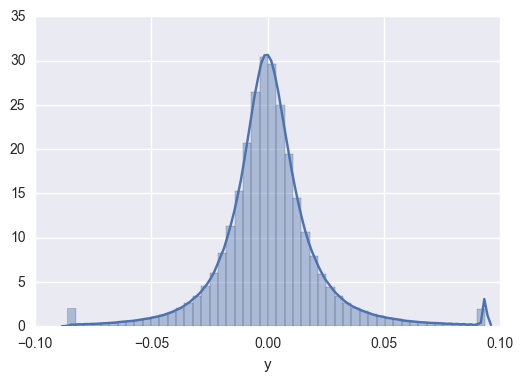

In [12]:
sns.distplot(df['y'])

In [ ]:
### classification
Y_extremey  = mad_based_outlier(df_shuffled['y'])


feature_cols_all = [x for x in list(df_transformed.columns) if x not in ['y']]

from sklearn.utils import shuffle
df_shuffled = shuffle(df_transformed,random_state=0).reset_index(drop = True)


X_extremey = df_shuffled[feature_cols_all]


from sklearn import model_selection as ms
from sklearn import datasets, metrics, tree

from imblearn import over_sampling as os
from imblearn import pipeline as pl


LW = 2
RANDOM_STATE = 42

scorer = metrics.make_scorer(metrics.cohen_kappa_score)


smote = os.SMOTE(random_state=RANDOM_STATE)
cart = tree.DecisionTreeClassifier(random_state=RANDOM_STATE)
pipeline = pl.make_pipeline(smote, cart)

param_range = range(1, 11)
train_scores, test_scores = ms.validation_curve(
    pipeline, X, y, param_name="smote__k_neighbors", param_range=param_range,
    cv=10, scoring=scorer, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SMOTE-CART")
plt.xlabel("k_neighbors")
plt.ylabel("Cohen's kappa")
plt.plot(param_range, test_scores_mean, color="navy", lw=LW)
plt.legend(loc="best")
plt.show()





In [17]:
from sklearn.utils import shuffle
df_shuffled = shuffle(df_transformed,random_state=0).reset_index(drop = True)

In [21]:
feature_cols_added = [x for x in list(df_transformed.columns) if x not in ['id','timestamp','y']]
X = df_shuffled[feature_cols]
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng,contamination=0.05)
clf.fit(X)
anomaly_pred = clf.predict(X)

NameError: name 'df_transformed_shuffled' is not defined

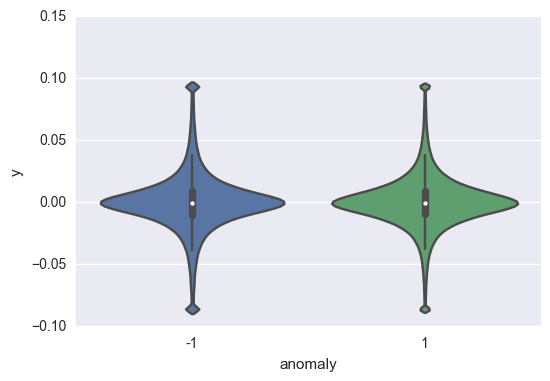

In [22]:
sns.violinplot(x="anomaly", y="y", data=pd.DataFrame({'anomaly':anomaly_pred,'y':df_shuffled['y']}))

C:\Users\Miya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


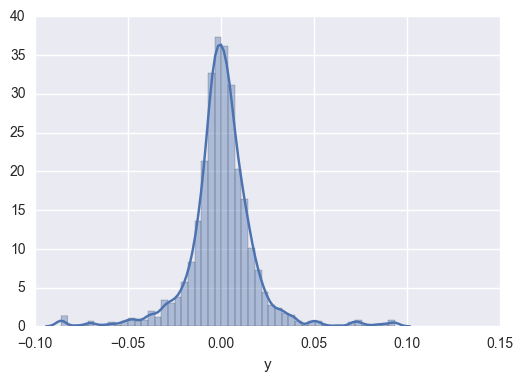

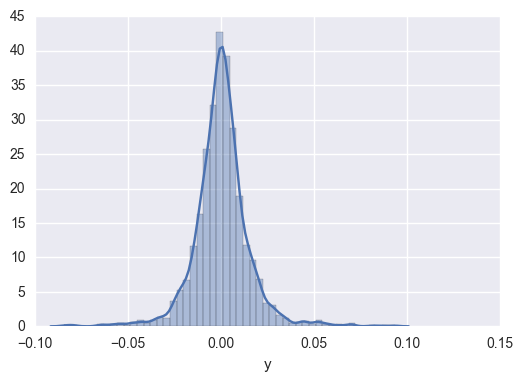

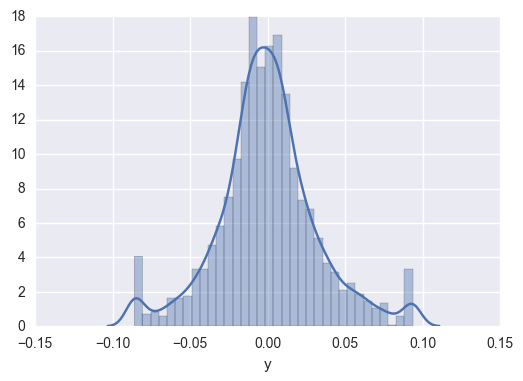

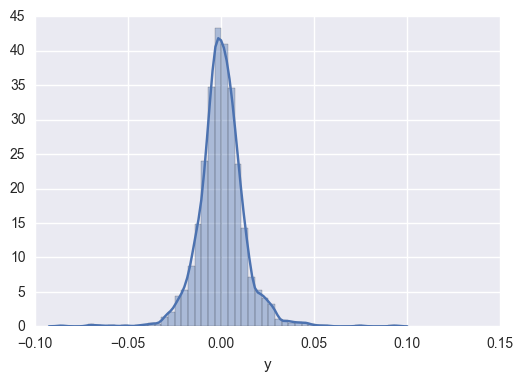

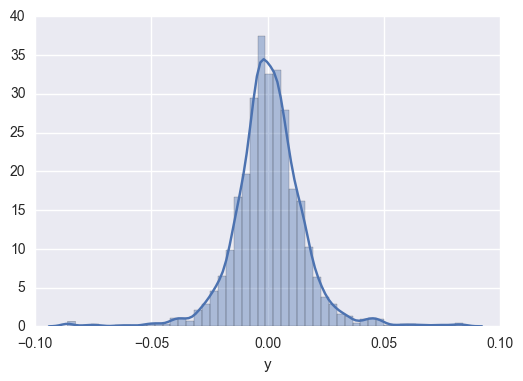

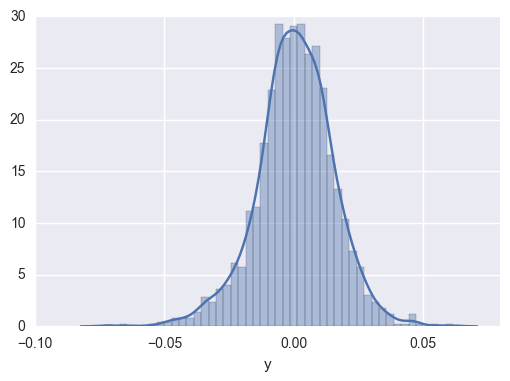

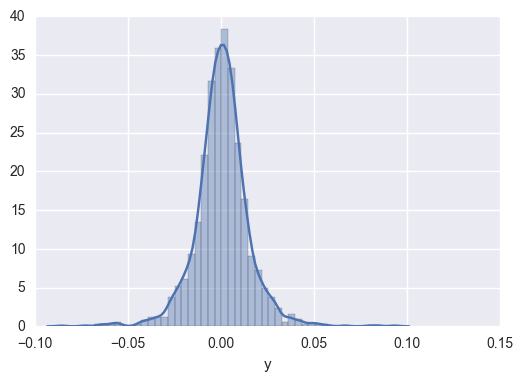

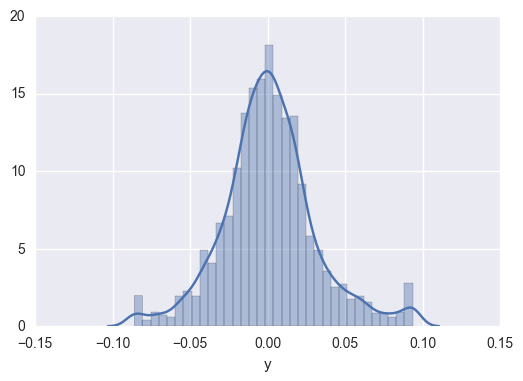

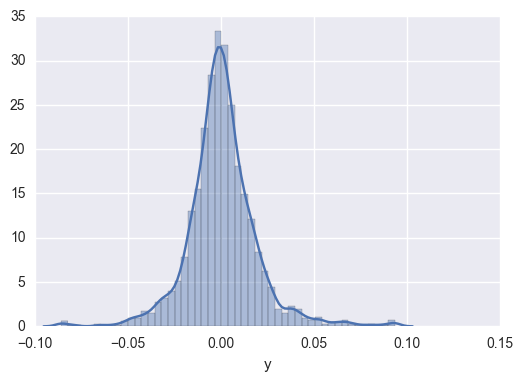

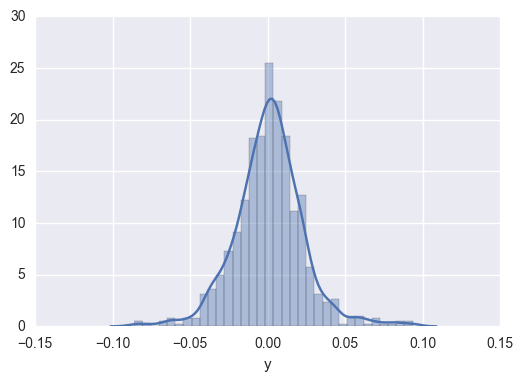

In [24]:
n = 0
for nindex in df_shuffled['id'].unique():
    plt.figure()
    sns.distplot(df_shuffled[df_shuffled['id']==nindex]['y'])
    n+=1
    if n>=10:
        break

In [3]:
dfId = df[['id', 'timestamp', 'y']].groupby('id').agg([
                    np.min, np.max, len, 
                lambda m: (list(m)[0] - list(m)[-1])/np.abs(np.mean(list(m))) ]).reset_index()

In [7]:
timestamp_cnt = df[['id', 'timestamp', 'y']].groupby('id').count().sort_values(by = 'y',ascending = False)

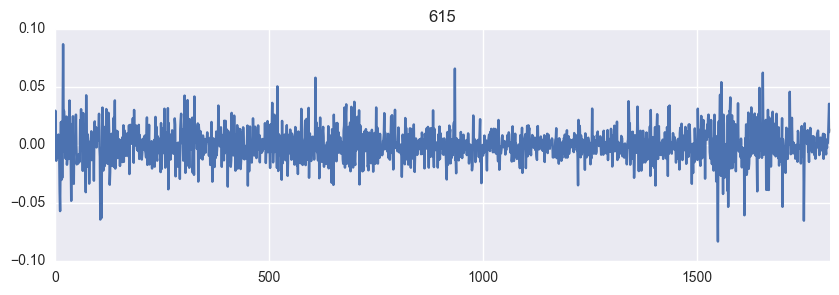

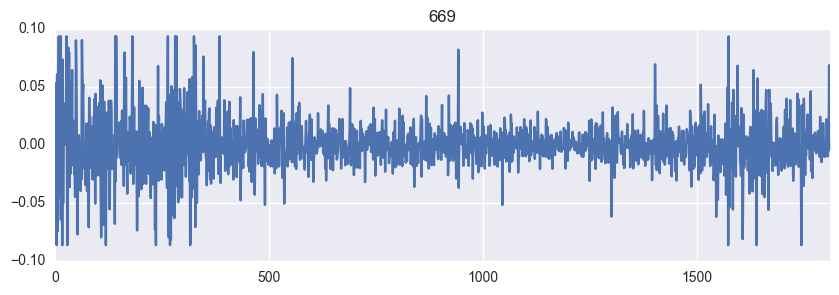

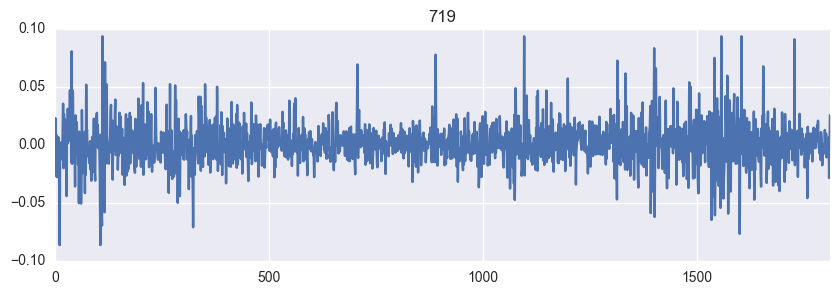

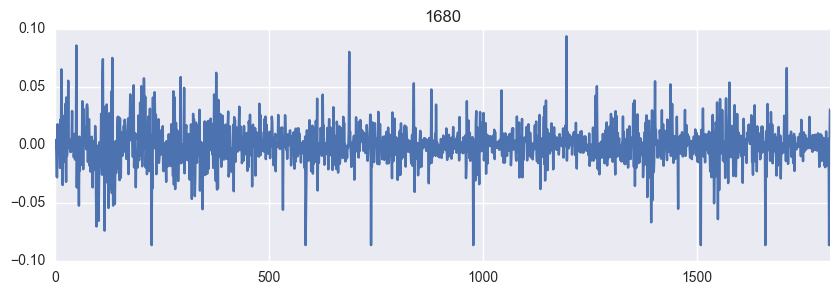

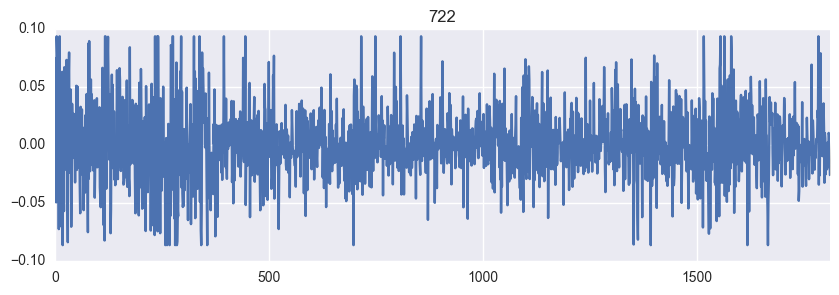

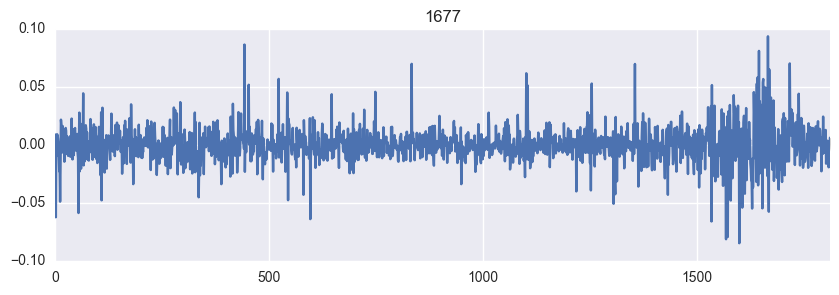

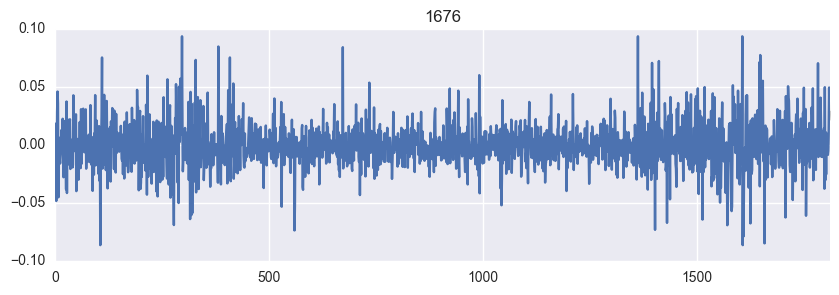

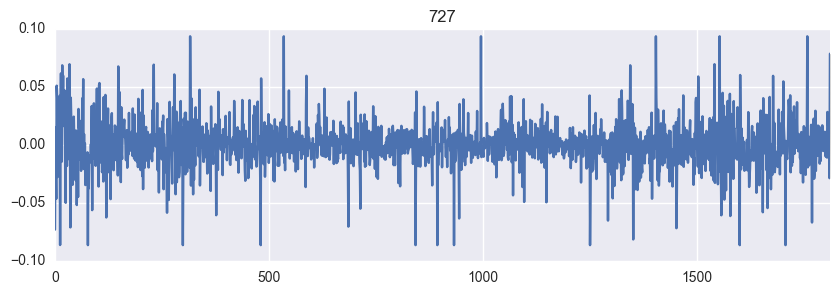

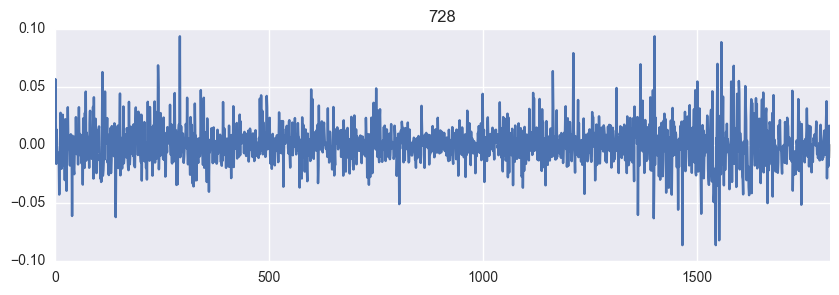

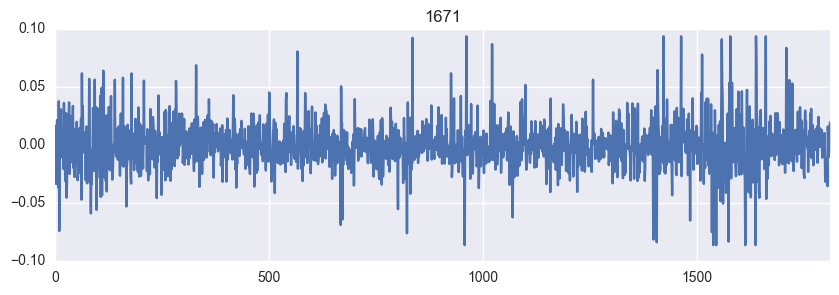

In [19]:
n = 0
for idex in timestamp_cnt[timestamp_cnt['y']==1813].index:
    plt.figure(figsize=(10,3))
    plt.title(idex)
    n +=1
    sns.tsplot(data = df[df['id']==idex]['y'])
    if n>=10:
        break

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  if __name__ == '__main__':


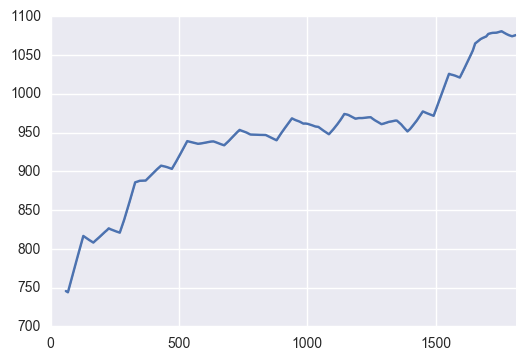

In [36]:
sns.tsplot(data = pd.rolling_mean(df.groupby('timestamp').count()['y'],window = 60))

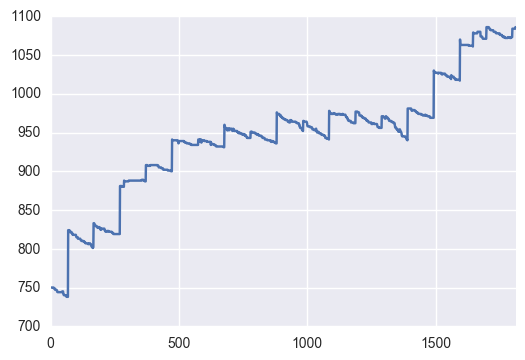

In [33]:
sns.tsplot(data = df.groupby('timestamp').count()['y'])

In [8]:
transformable_fea = [i for i in feature_cols if i not in non_transformable_fea]
df_transformed_shuffled = df_shuffled[transformable_fea].apply(lambda x:1/x, axis=1)
df_transformed_shuffled[non_transformable_fea]=df_shuffled[non_transformable_fea]
df_transformed_shuffled[non_transformable_fea]=df_shuffled[non_transformable_fea]
df_transformed_shuffled[['id','timestamp','y']] = df_shuffled[['id','timestamp','y']]
del(df_shuffled)

In [14]:
from sklearn.preprocessing import Imputer
impute_method = Imputer(strategy='median', axis=0)
X_anomaly_det = impute_method.fit_transform(df_transformed_shuffled[feature_cols])

In [20]:
anomaly_pred = clf.predict(X_anomaly_det)
pd.DataFrame({'anomaly':anomaly_pred,'y':df_transformed_shuffled['y']})

anomaly         y
0              1  0.005177
1              1  0.003340
2             -1  0.016485
3             -1  0.003132
4              1 -0.012504
5              1  0.019126
6              1 -0.007372
7              1 -0.007117
8              1  0.017135
9              1 -0.009127
10             1  0.000722
11             1 -0.000128
12             1  0.004155
13             1 -0.005230
14             1  0.019951
15            -1 -0.005214
16             1 -0.006472
17             1  0.001479
18            -1  0.013030
19             1 -0.023941
20             1  0.003571
21             1  0.004601
22             1 -0.001971
23             1  0.003170
24            -1  0.042299
25             1  0.003117
26             1 -0.045493
27             1 -0.001455
28             1 -0.046988
29             1  0.007469
...          ...       ...
1710726       -1 -0.018511
1710727        1  0.003126
1710728        1  0.018009
1710729        1 -0.010322
1710730       -1  0.003028
1710731        1  0.002399
1710732        1 -0.011794
1710733        1  0.006494
1710734        1  0.028969
1710735       -1  0.002586
1710736        1  0.004212
1710737        1 -0.049289
1710738        1  0.029825
1710739        1  0.012337
1710740        1 -0.007148
1710741        1 -0.025556
1710742        1  0.007068
1710743        1  0.002838
1710744        1 -0.004834
1710745        1 -0.005632
1710746        1 -0.003094
1710747        1 -0.021833
1710748        1 -0.015229
1710749        1 -0.008136
1710750        1  0.002210
1710751       -1  0.018427
1710752        1 -0.006867
1710753       -1  0.021733
1710754        1  0.001098
1710755        1  0.009178

[1710756 rows x 2 columns]

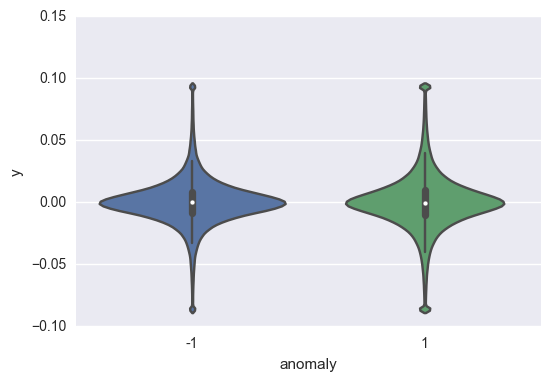

In [27]:
sns.violinplot(x="anomaly", y="y", data=pd.DataFrame({'anomaly':anomaly_pred,'y':df_transformed_shuffled['y']}))

### stats exploration

In [35]:
columns_to_see = df.columns[2:]
dict_stats = dict()
dict_stats['mean'] = list(map(lambda x: df[x].mean(),columns_to_see))
dict_stats['std'] = list(map(lambda x: df[x].std(),columns_to_see))
dict_stats['max'] = list(map(lambda x: df[x].max(),columns_to_see))
dict_stats['min'] = list(map(lambda x: df[x].min(),columns_to_see))
stats_pd = pd.DataFrame.from_dict(dict_stats).set_index(columns_to_see)

In [36]:
derived_cnt=0
fundamental_cnt=0
technical_cnt=0

for i in stats_pd.index:
    if 'derived' in i:
        derived_cnt +=1
    if 'fundamental' in i:
        fundamental_cnt +=1
    if 'technical' in i:
        technical_cnt +=1
print('derived_cnt:%d'%derived_cnt)
print('fundamental_cnt:%d'%fundamental_cnt)
print('technical_cnt:%d'%technical_cnt)

derived_cnt:5
fundamental_cnt:51
technical_cnt:40


In [37]:
derived_cnt_nor=0
fundamental_cnt_nor=0
technical_cnt_nor=0

for i in stats_pd[stats_pd['std']<=3].index:
    if 'derived' in i:
        derived_cnt_nor +=1
    if 'fundamental' in i:
        fundamental_cnt_nor +=1
    if 'technical' in i:
        technical_cnt_nor +=1
print('%d out of %d normalized-able(std<=3) in derived'%(derived_cnt_nor,derived_cnt))
print('%d out of %d normalized-able in fundamental'%(fundamental_cnt_nor,fundamental_cnt))
print('%d out of %d normalized-able in technical'%(technical_cnt_nor,technical_cnt))

0 out of 5 normalized-able(std<=3) in derived
18 out of 51 normalized-able in fundamental
40 out of 40 normalized-able in technical


C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\Miya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\Miya\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


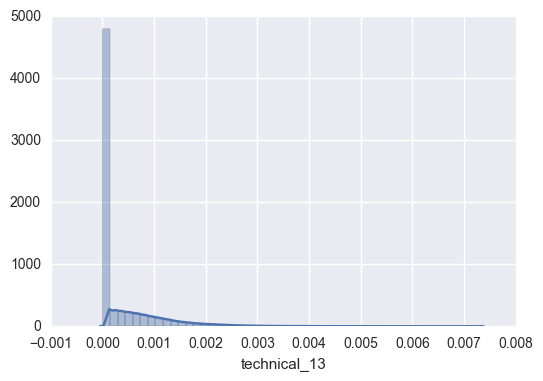

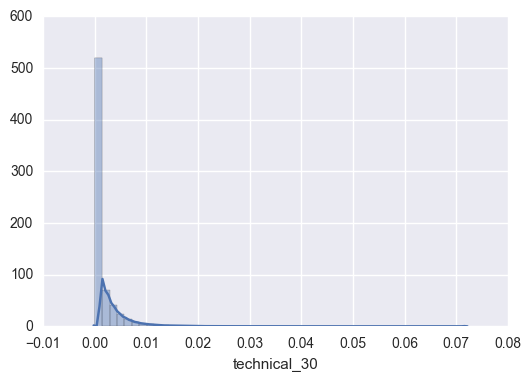

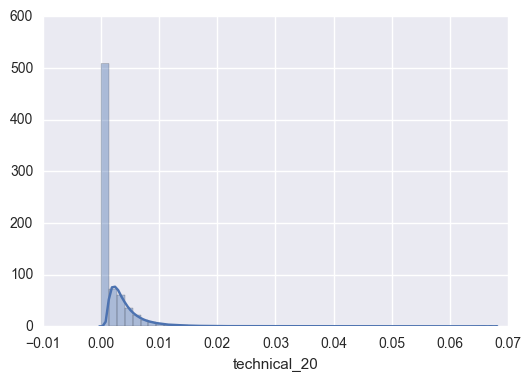

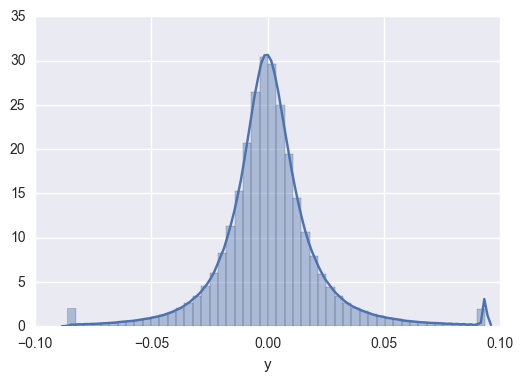

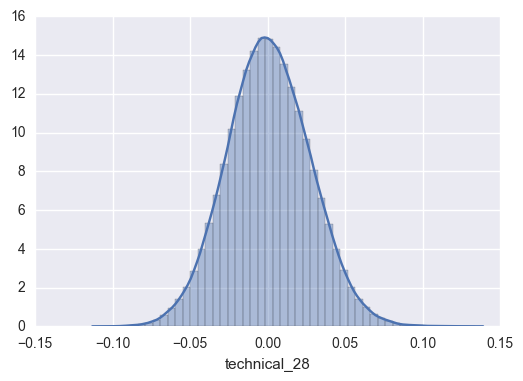

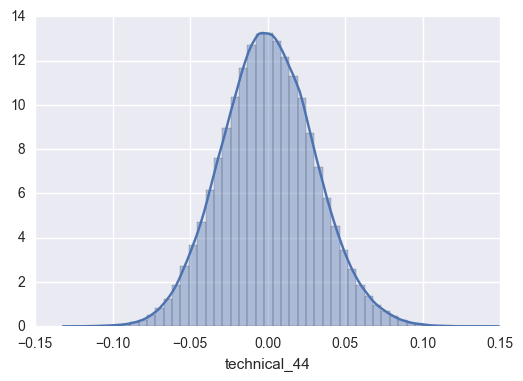

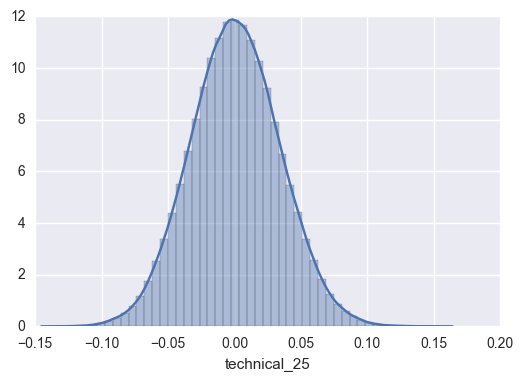

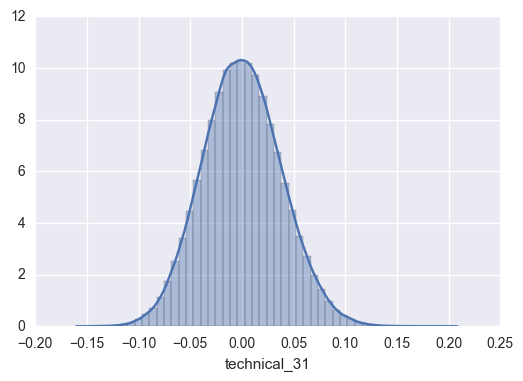

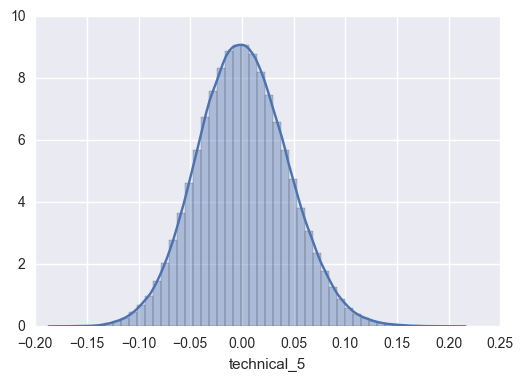

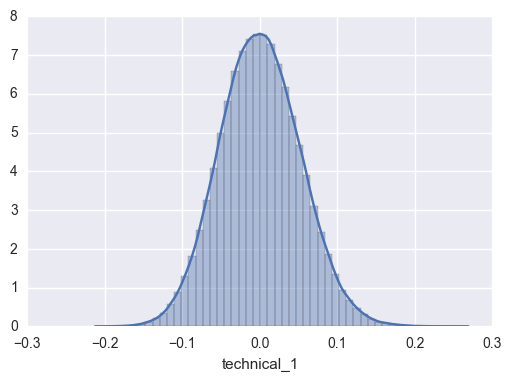

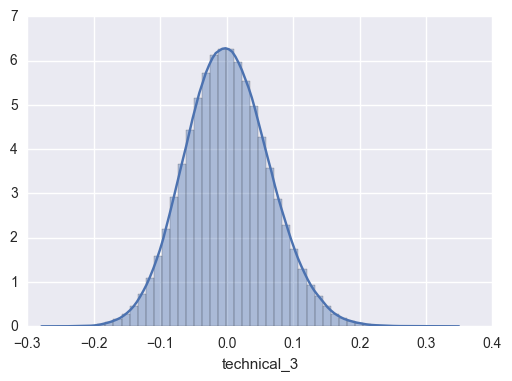

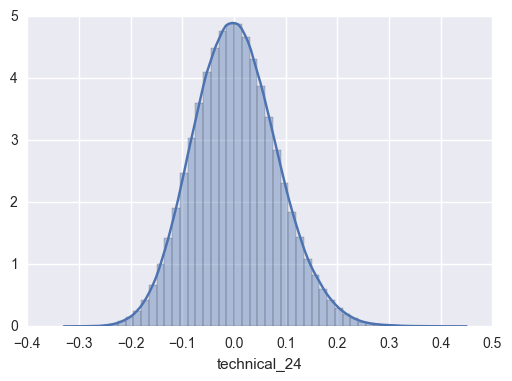

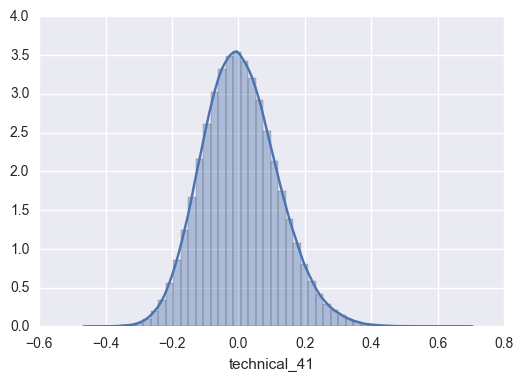

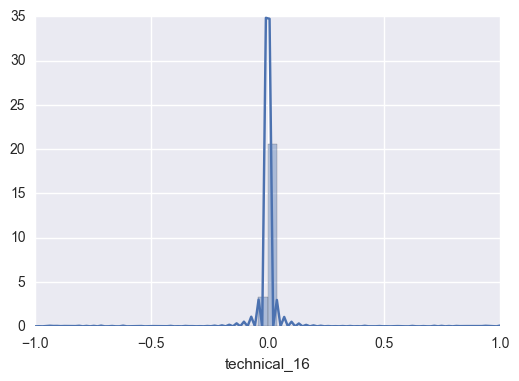

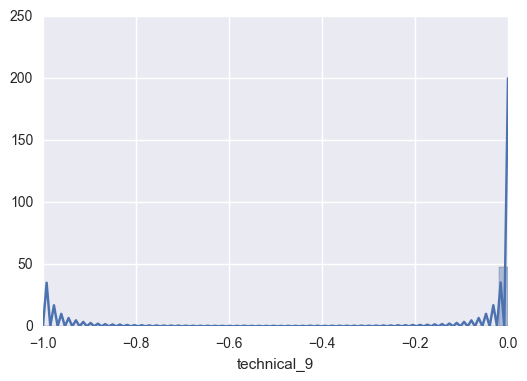

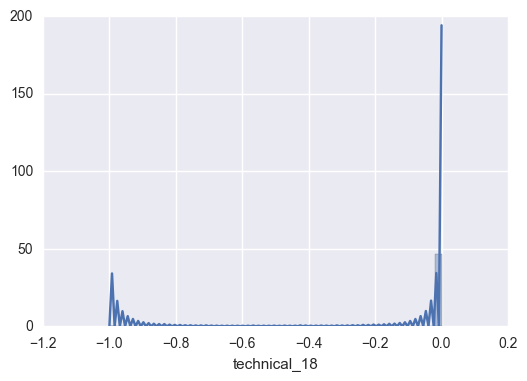

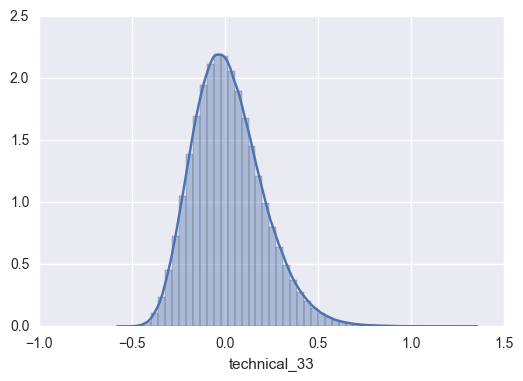

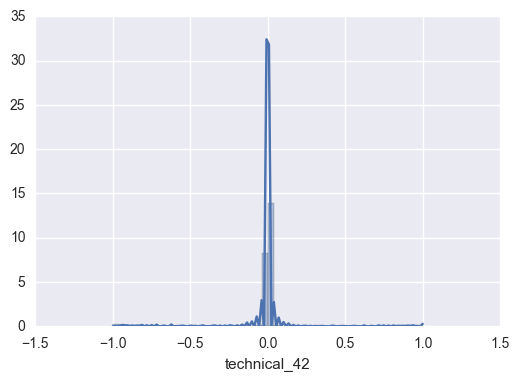

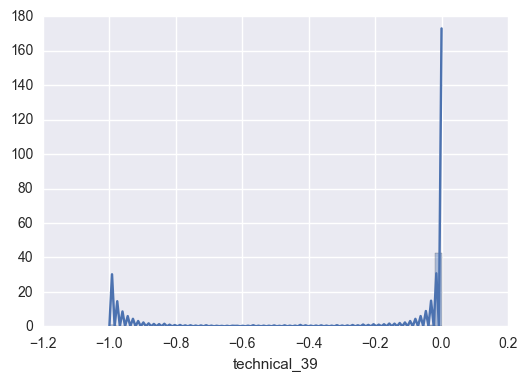

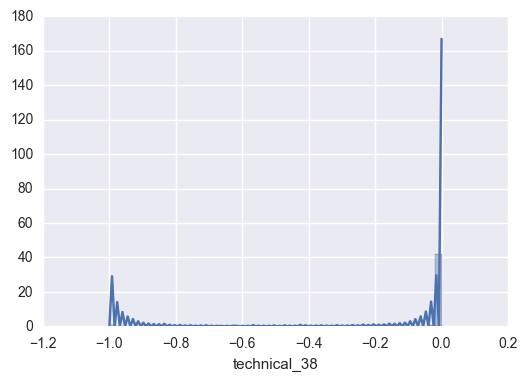

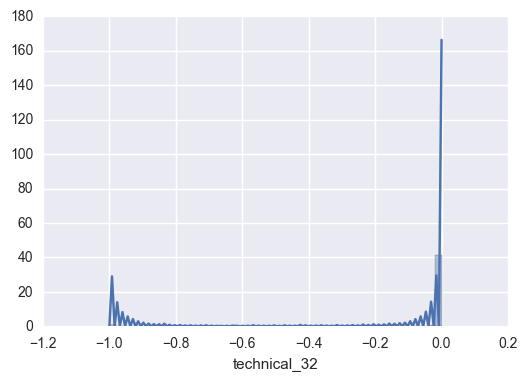

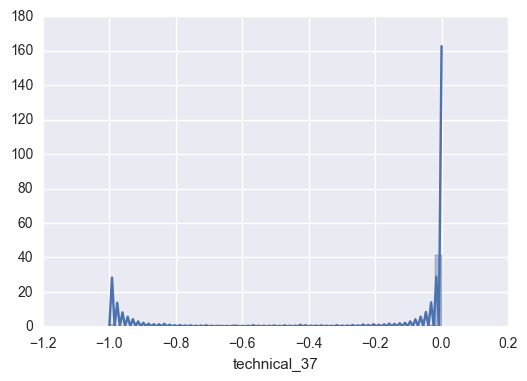

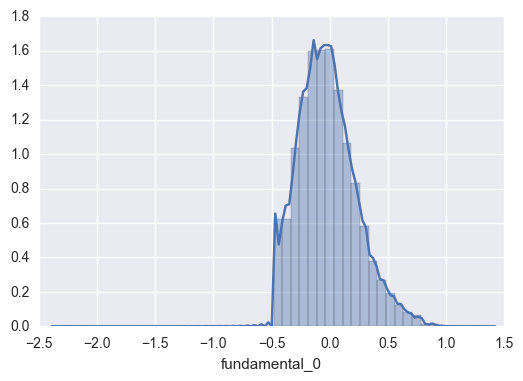

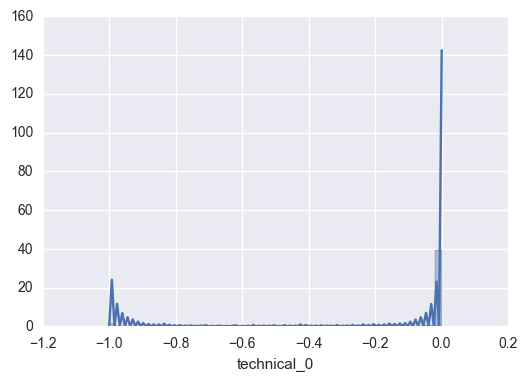

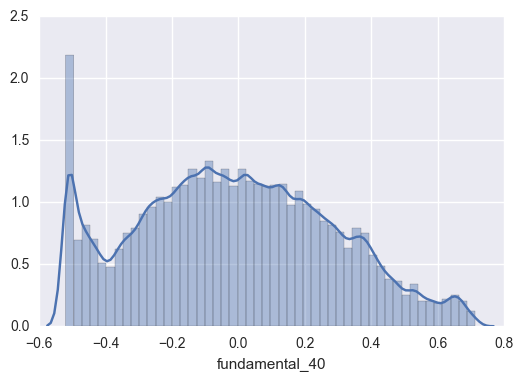

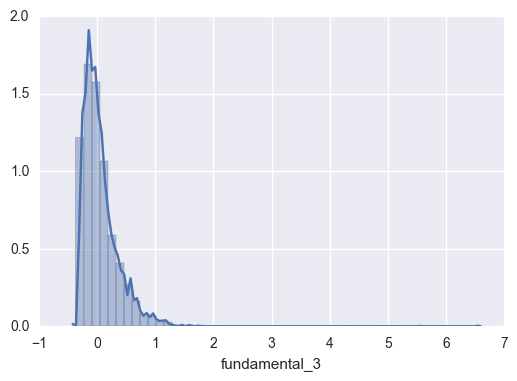

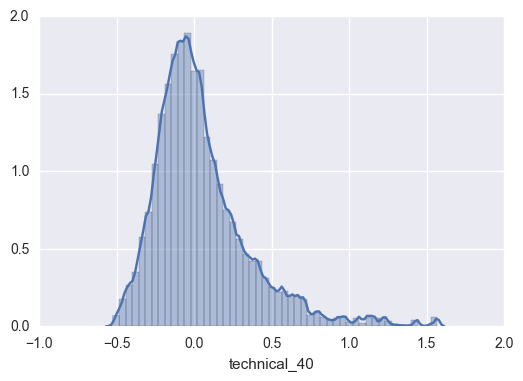

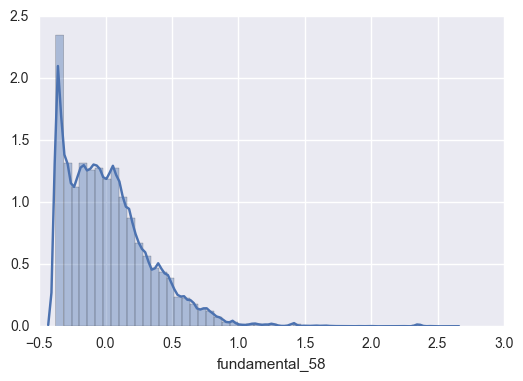

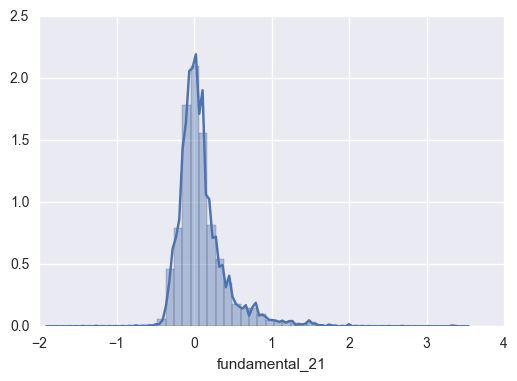

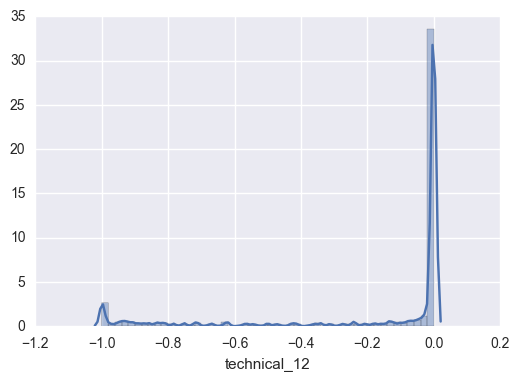

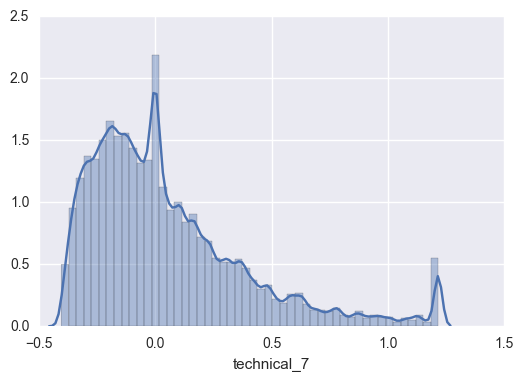

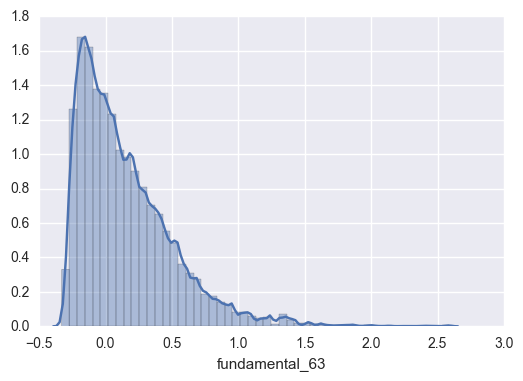

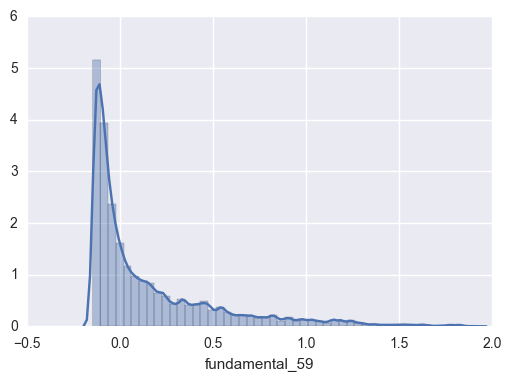

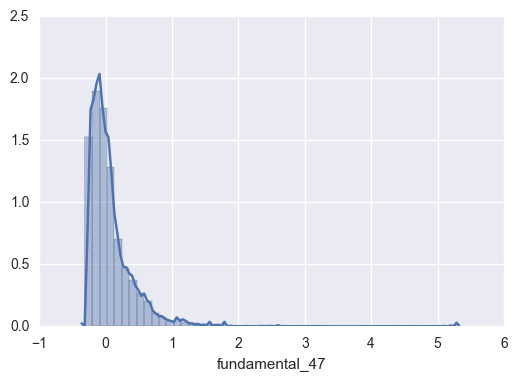

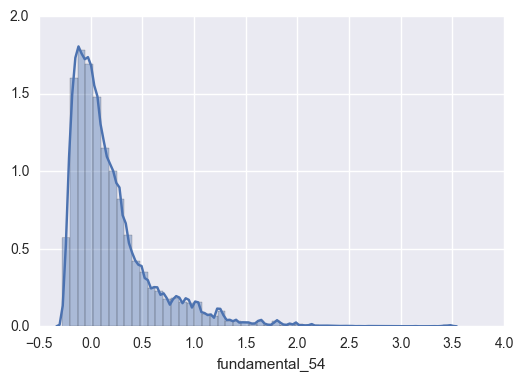

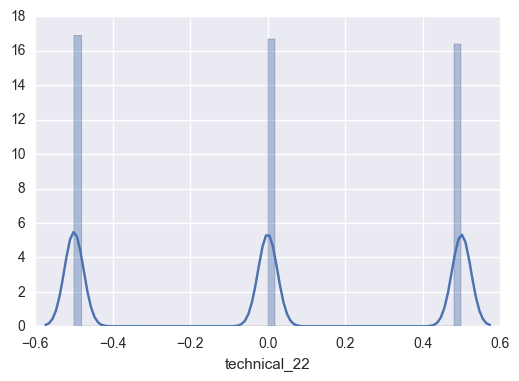

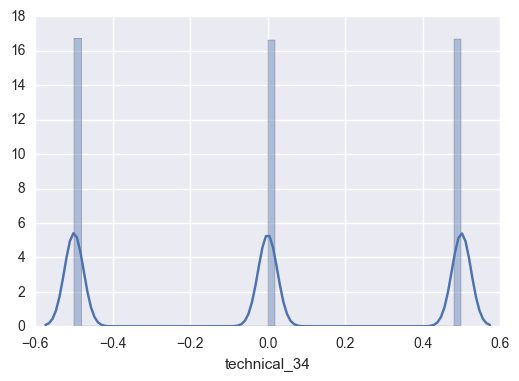

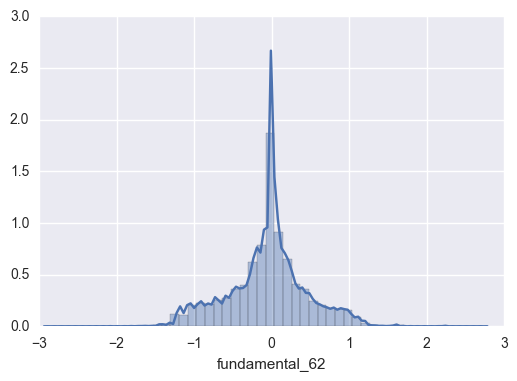

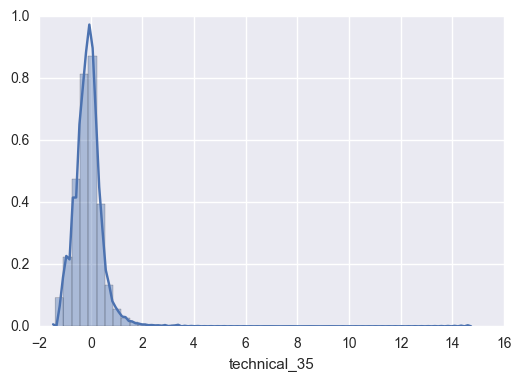

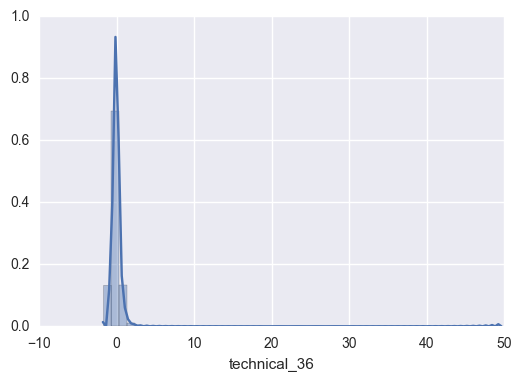

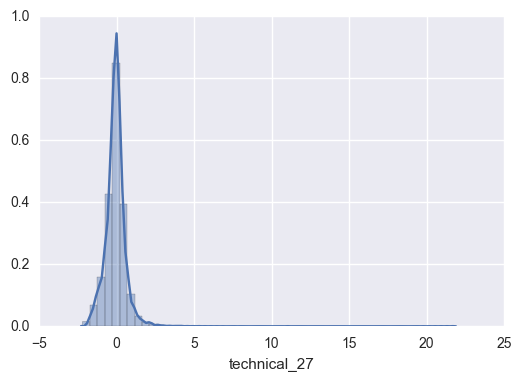

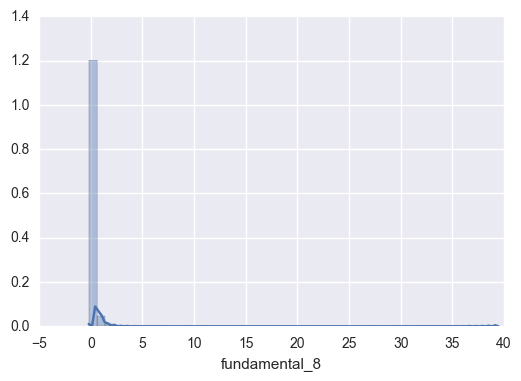

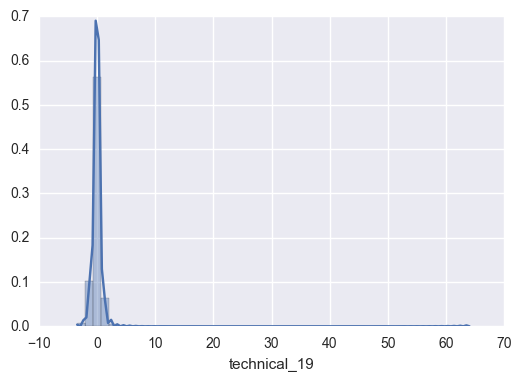

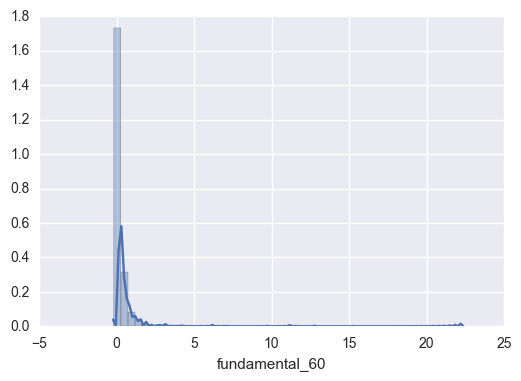

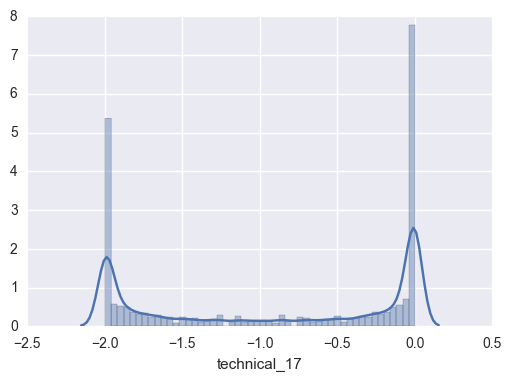

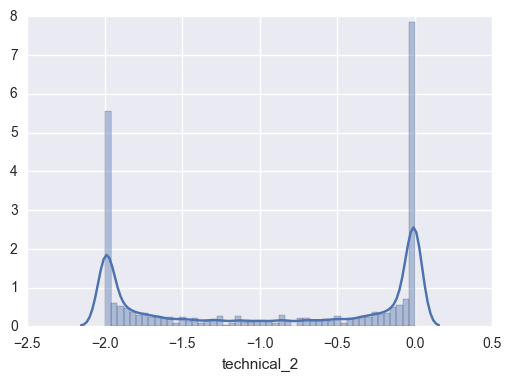

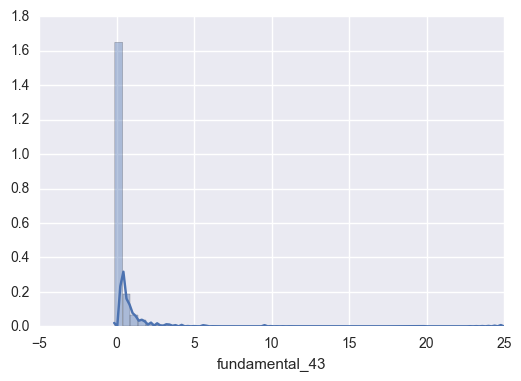

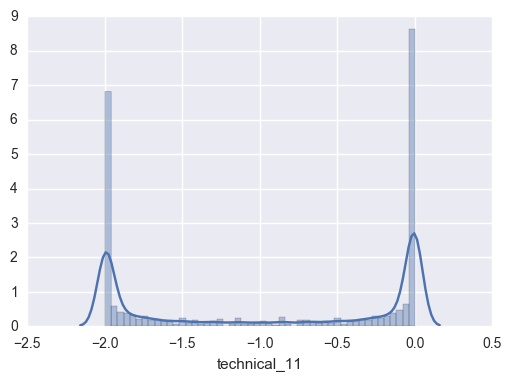

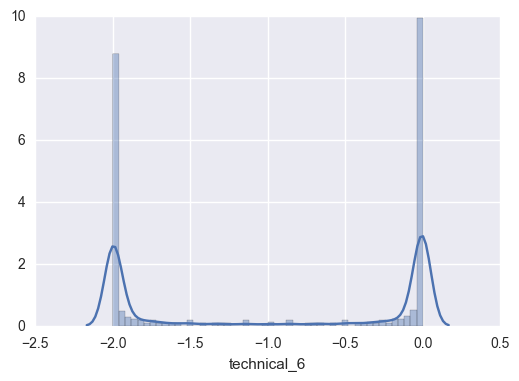

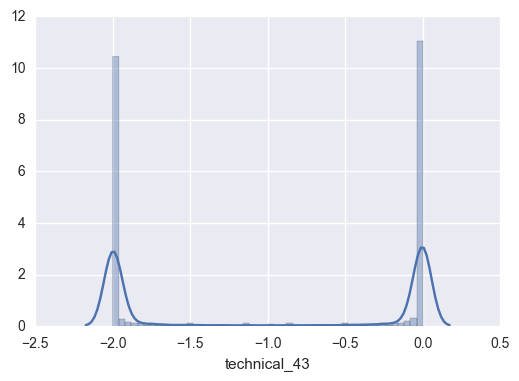

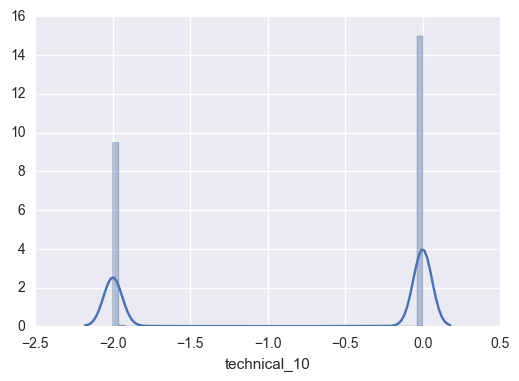

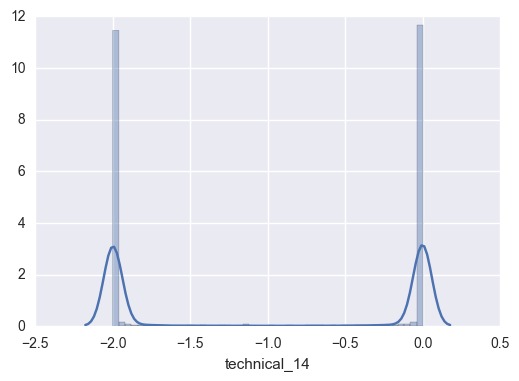

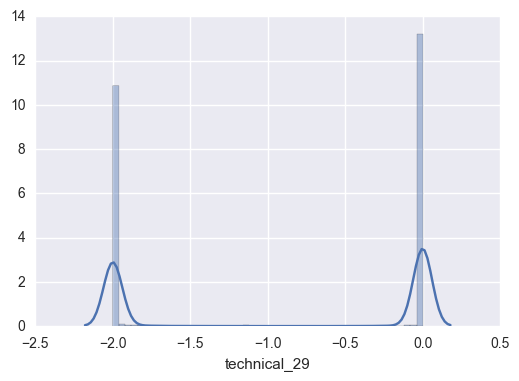

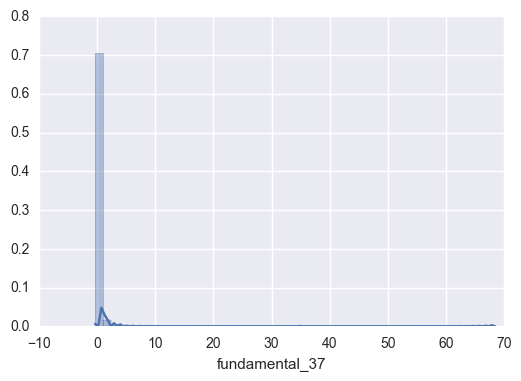

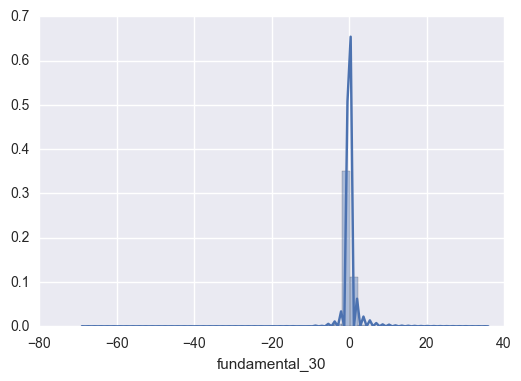

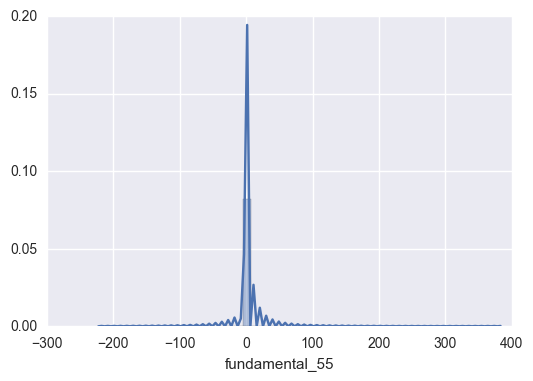

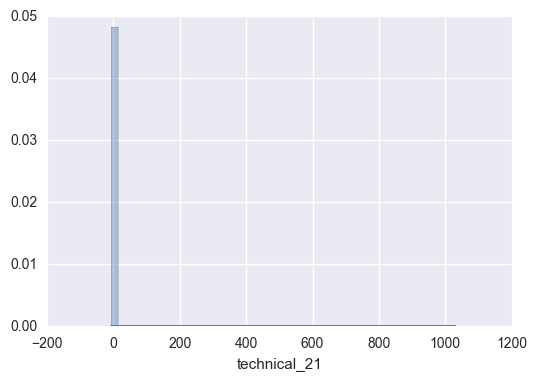

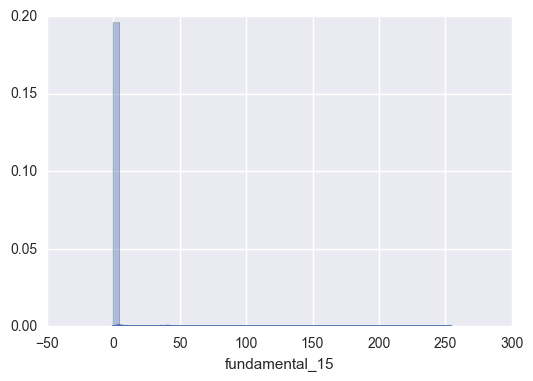

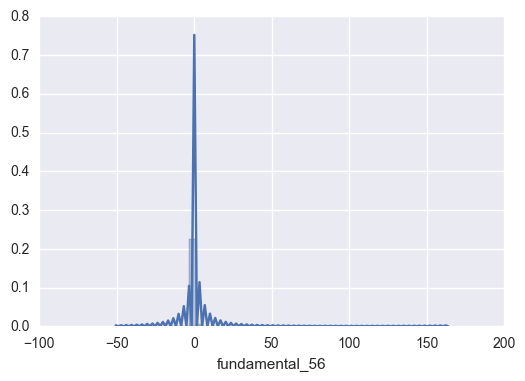

In [39]:
col_nor_already = stats_pd.sort_values(by = 'std')[stats_pd['std']<=3].index
for i in col_nor_already:
    plt.figure()
    sns.distplot(df[i].dropna())

C:\Users\Miya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\Miya\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


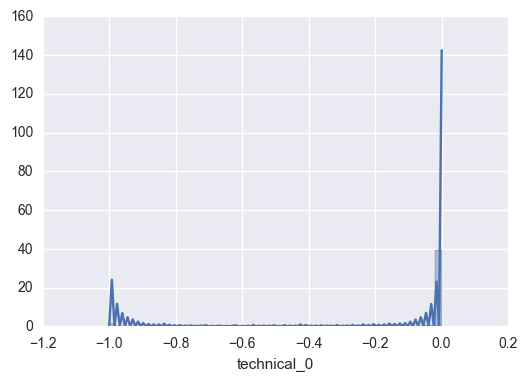

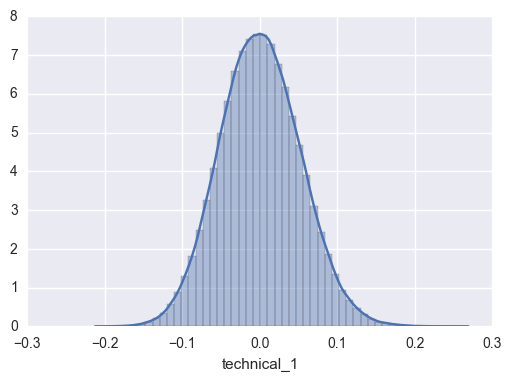

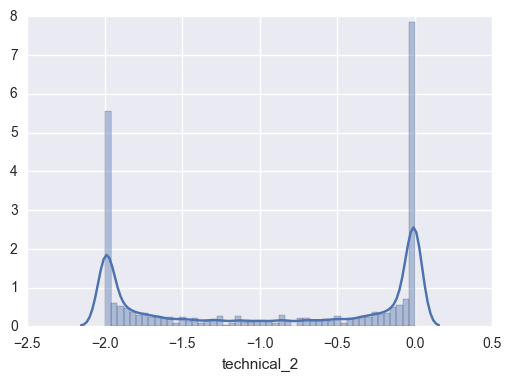

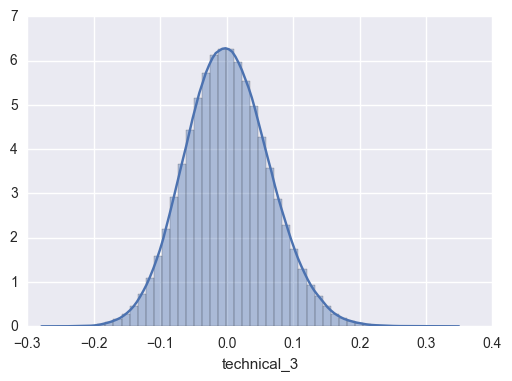

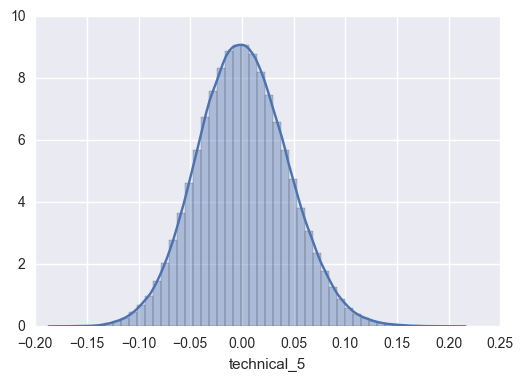

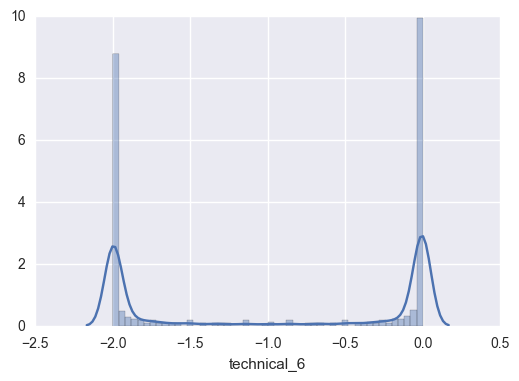

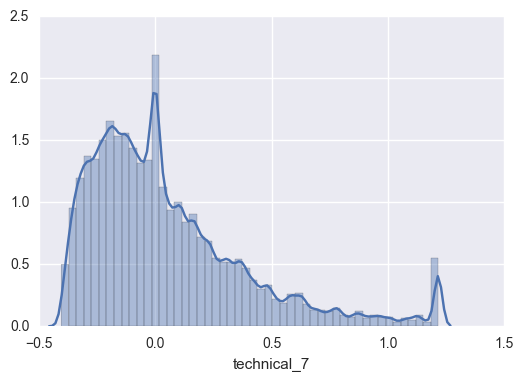

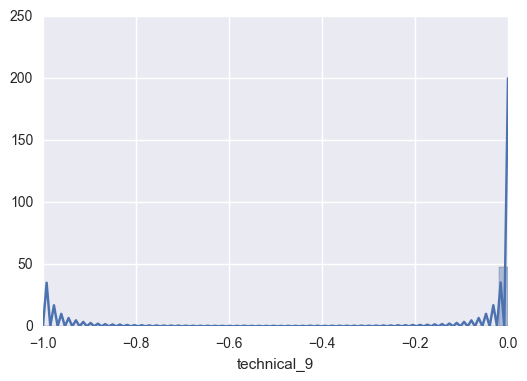

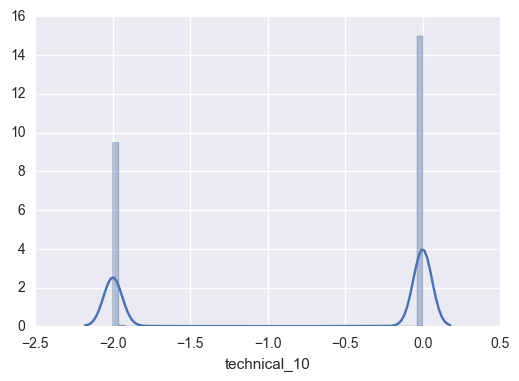

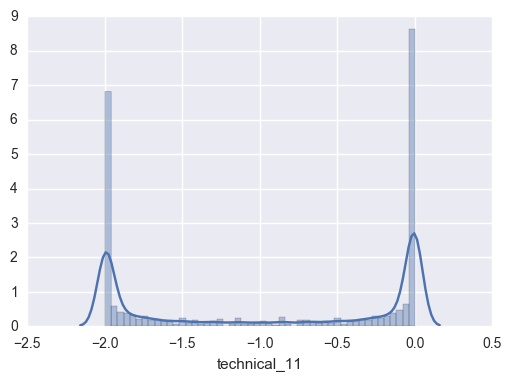

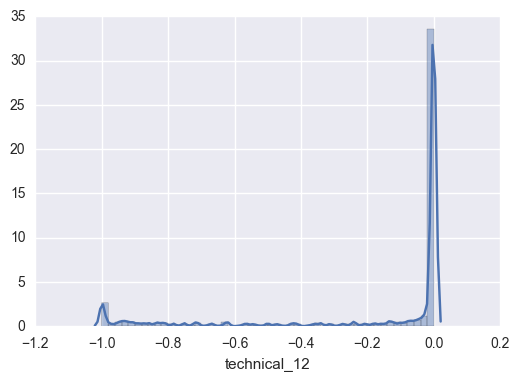

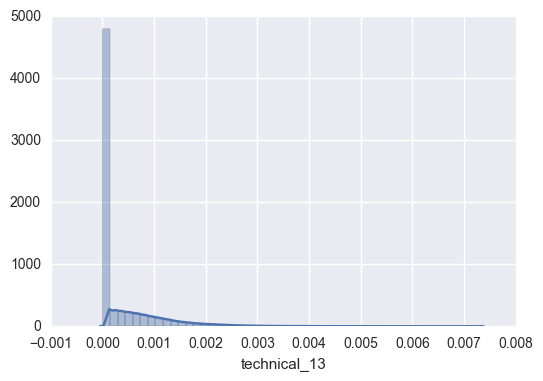

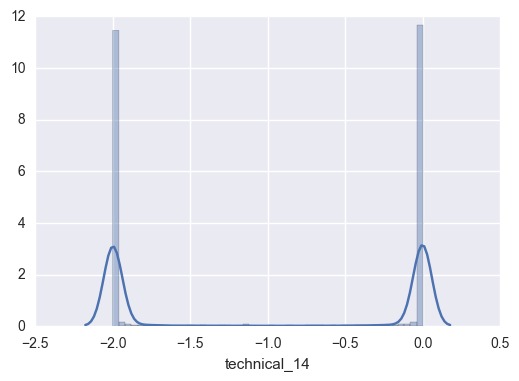

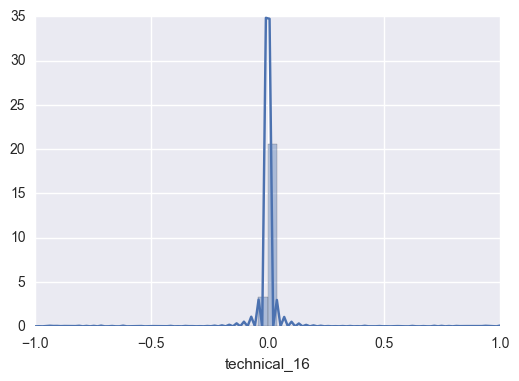

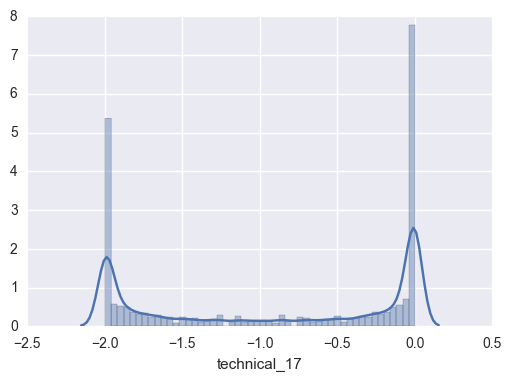

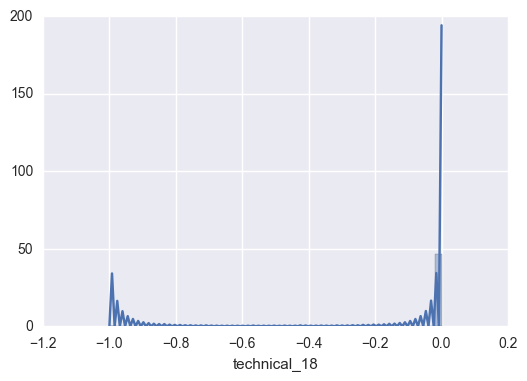

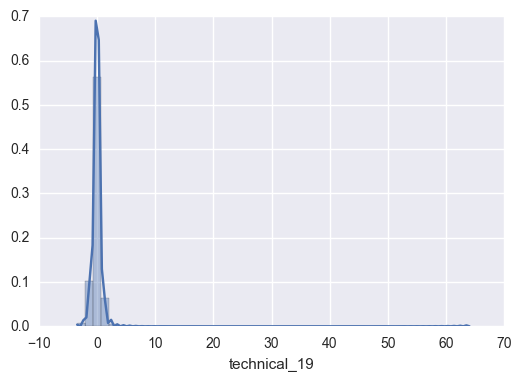

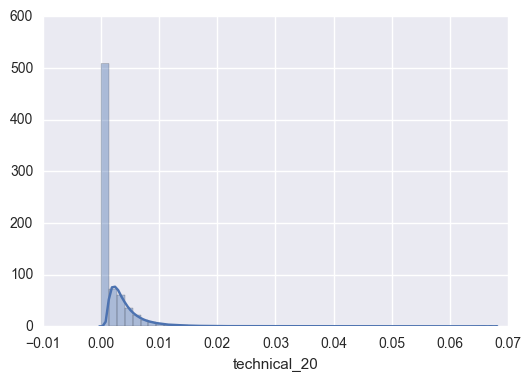

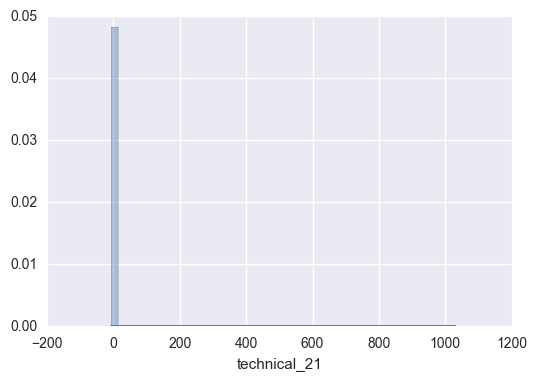

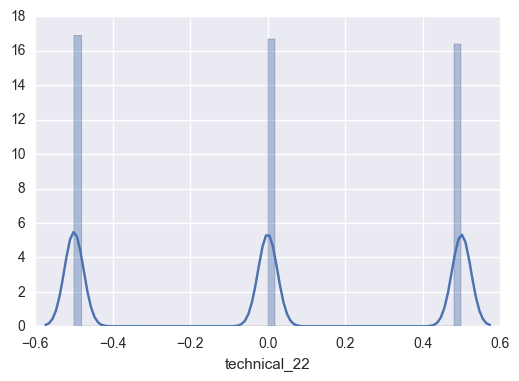

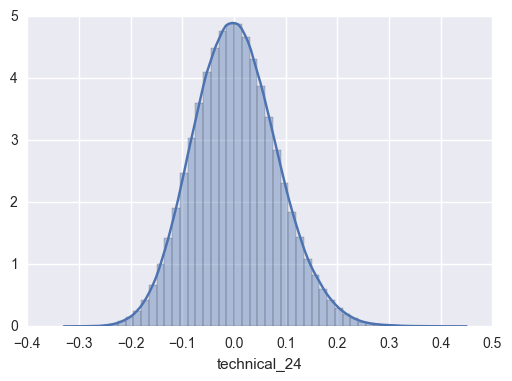

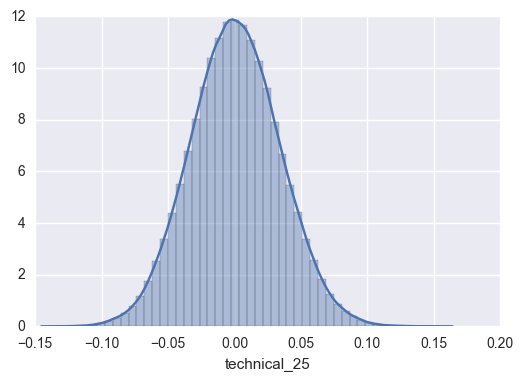

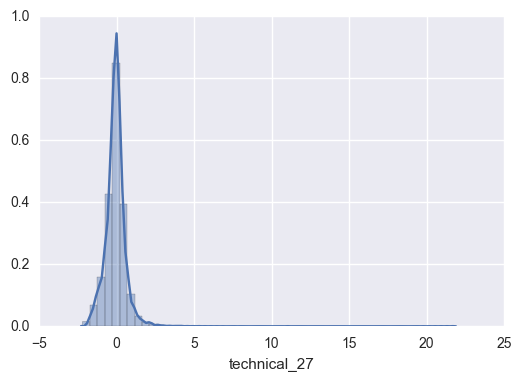

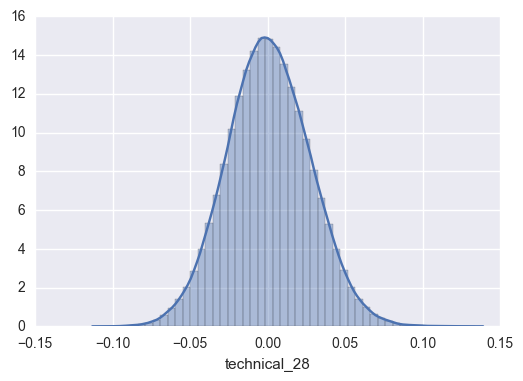

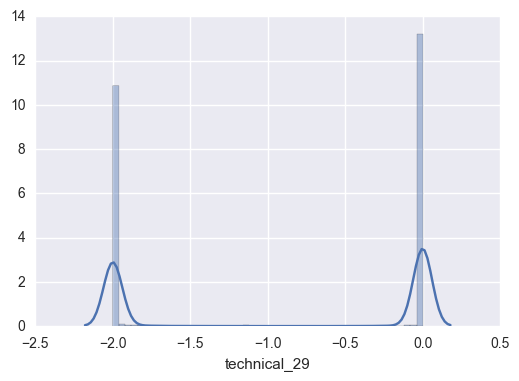

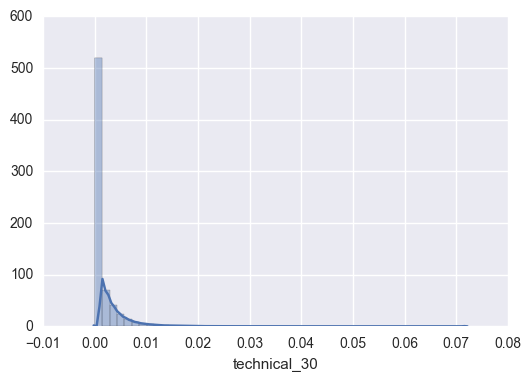

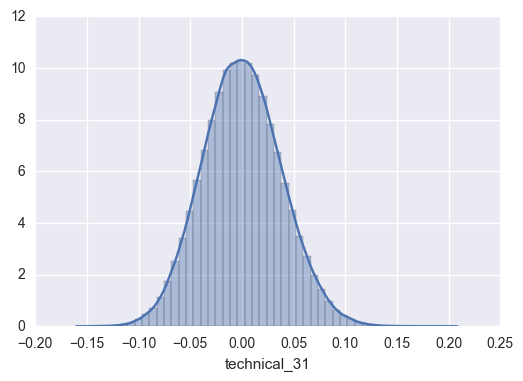

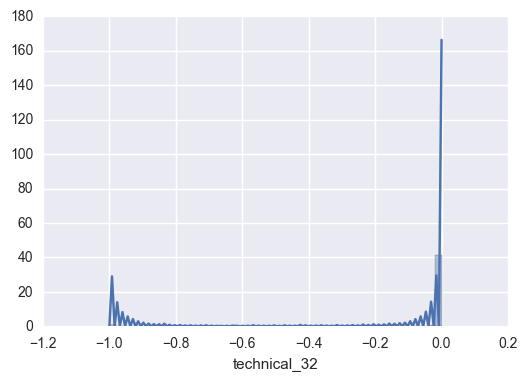

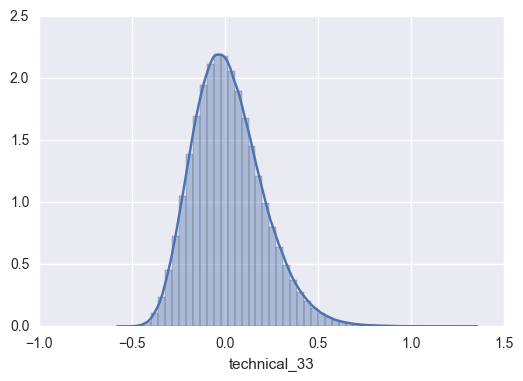

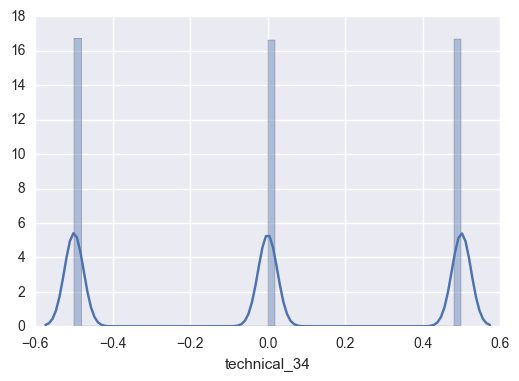

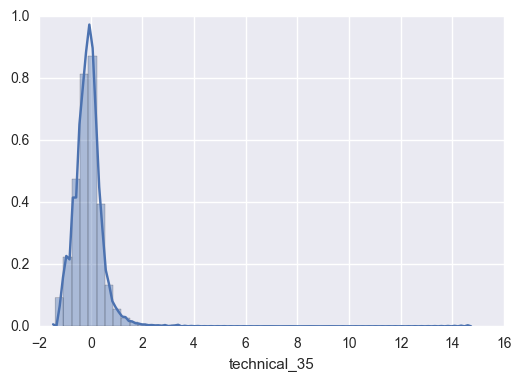

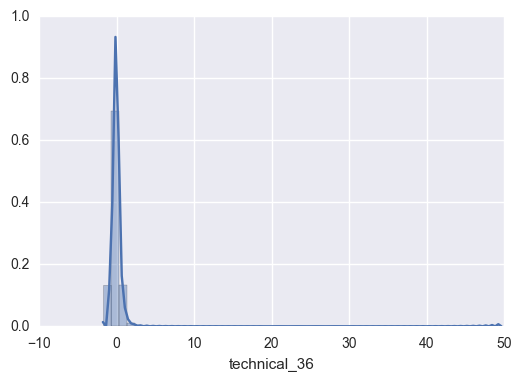

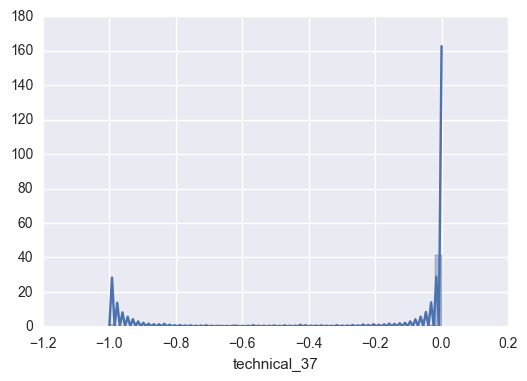

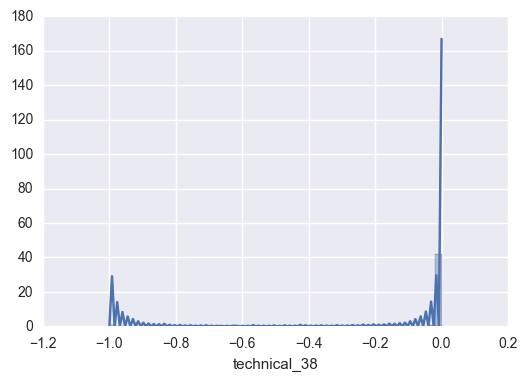

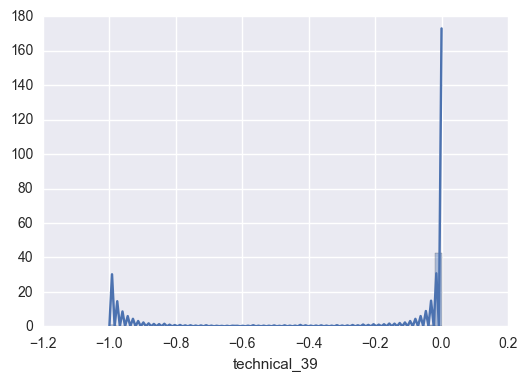

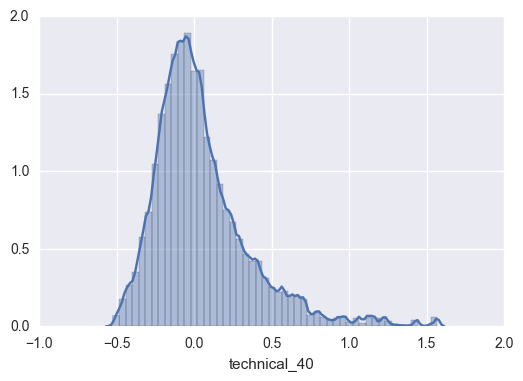

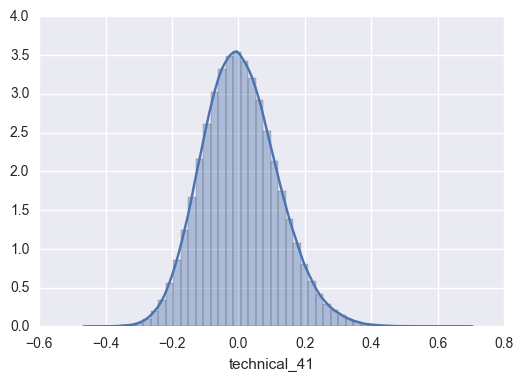

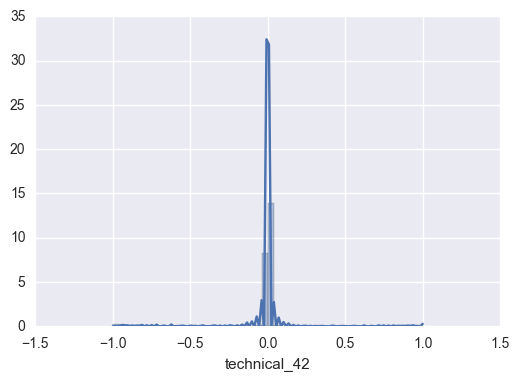

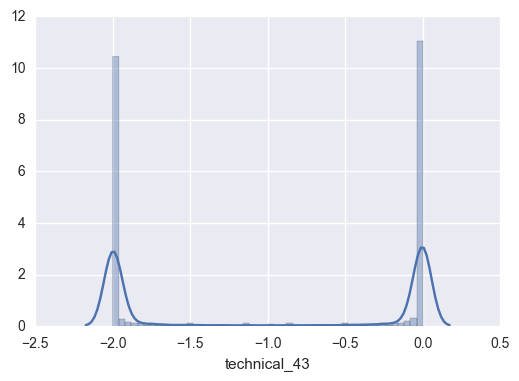

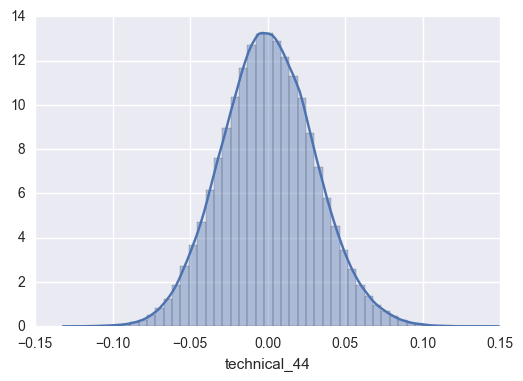

In [57]:
for col in df.columns:
    if 'technical' in col:
        plt.figure()
        sns.distplot(df[col].dropna())

In [63]:
stats_pd.loc['technical_34']

max     0.500000
mean   -0.000581
min    -0.500000
std     0.408667
Name: technical_34, dtype: float64

C:\Users\Miya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Miya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\Miya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:184: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\Miya\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface

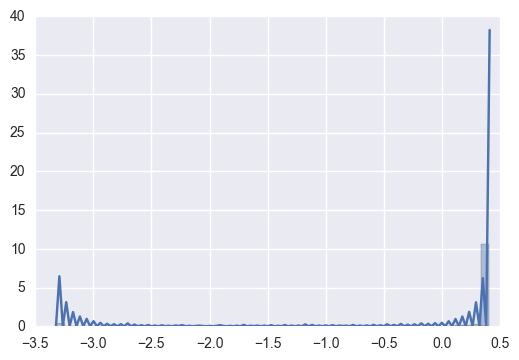

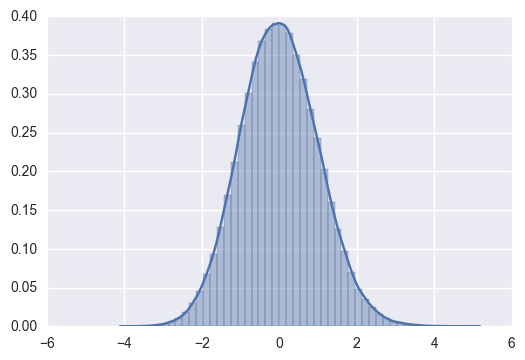

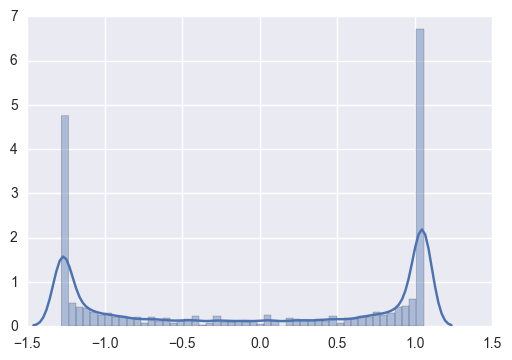

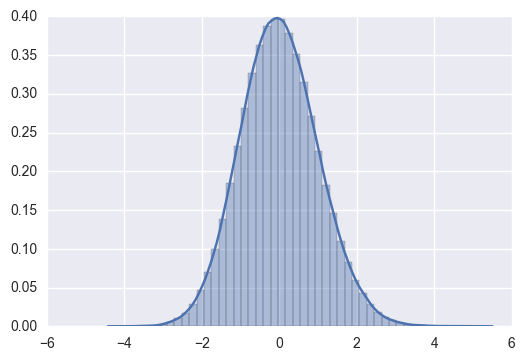

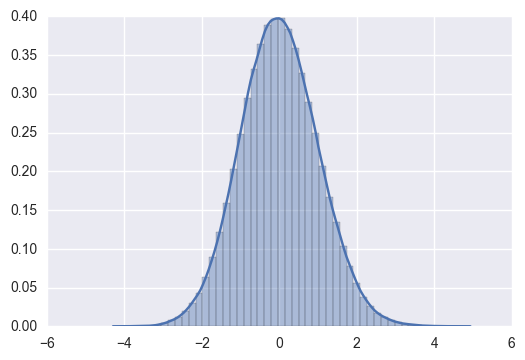

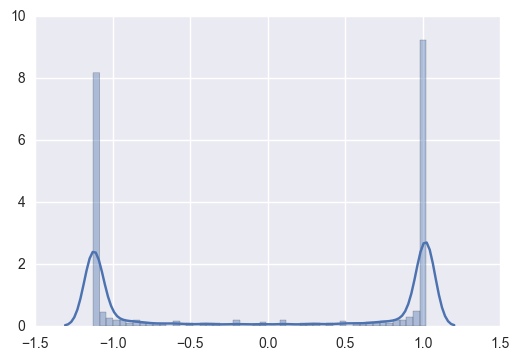

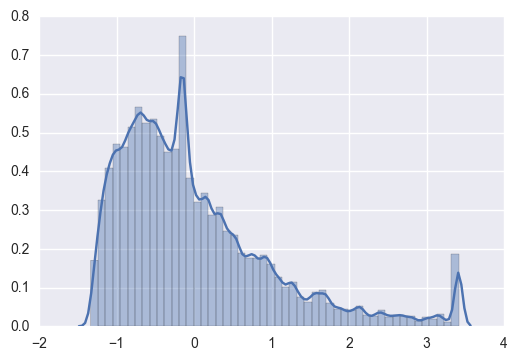

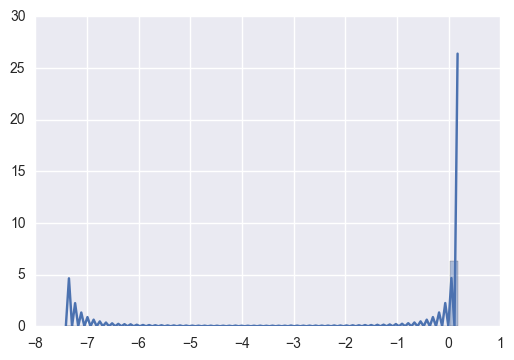

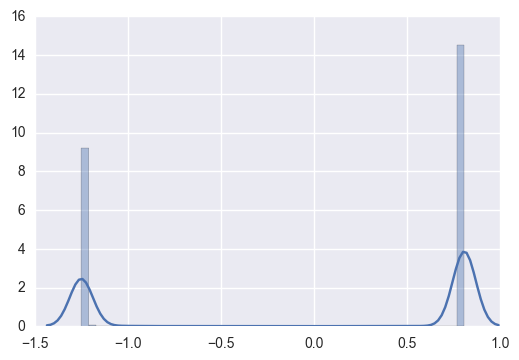

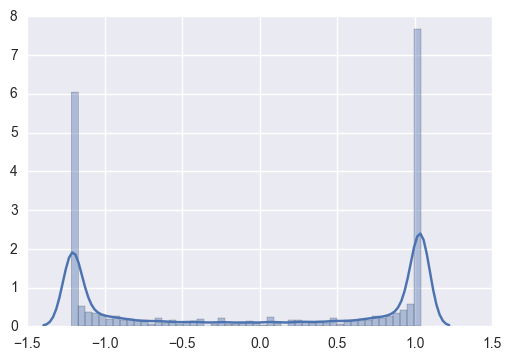

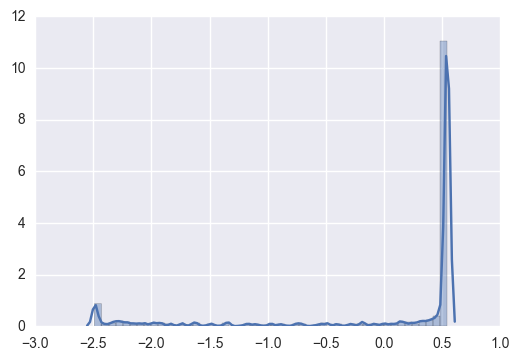

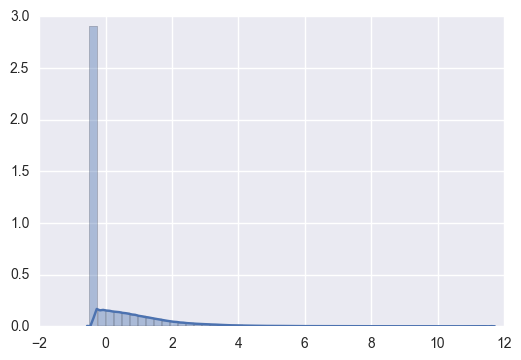

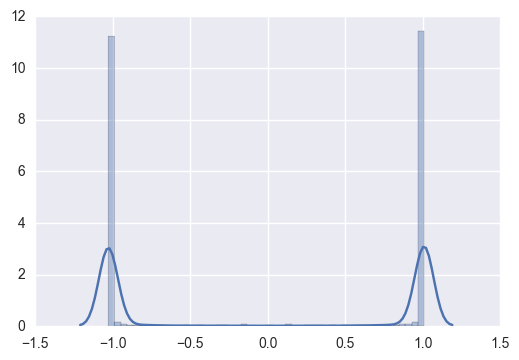

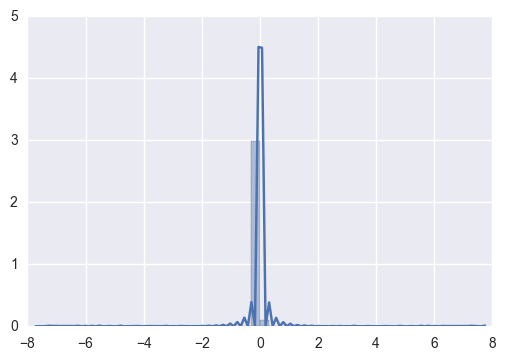

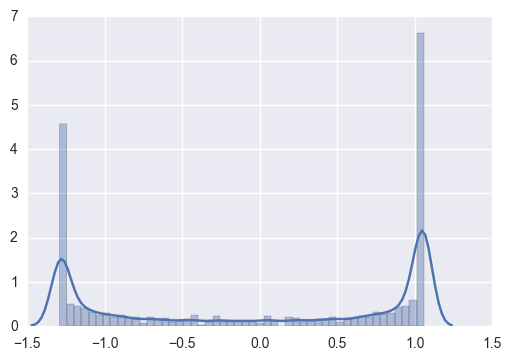

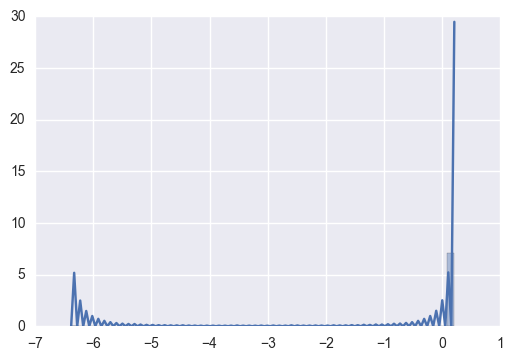

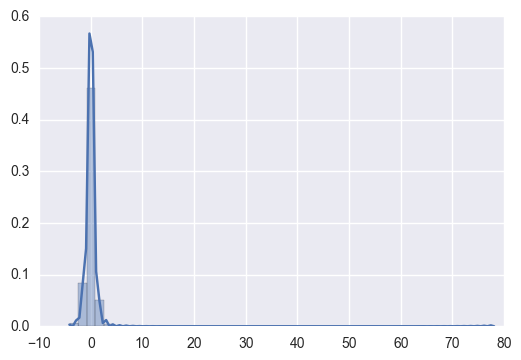

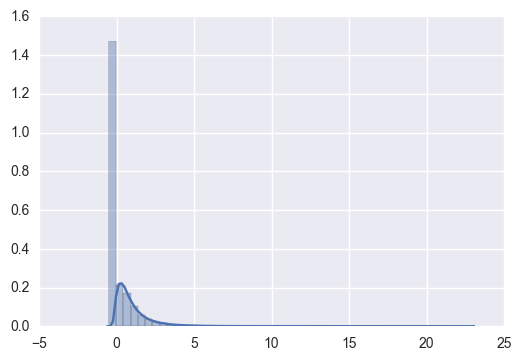

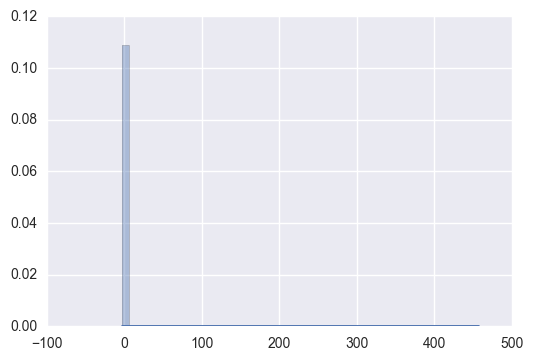

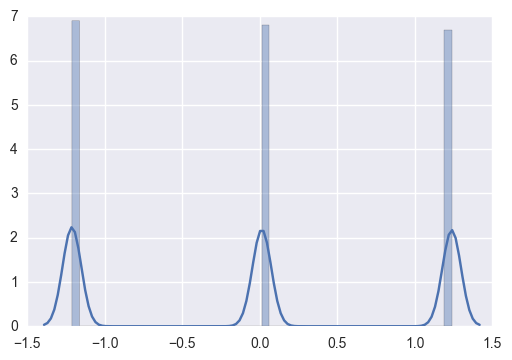

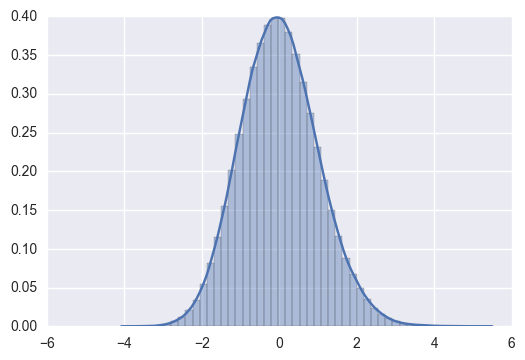

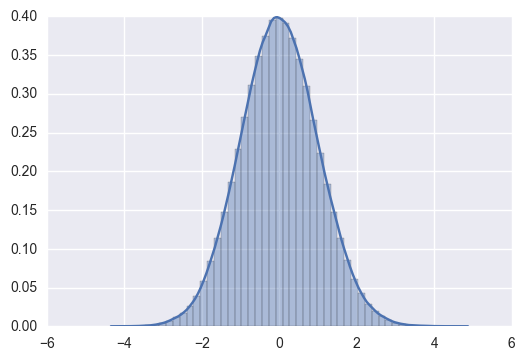

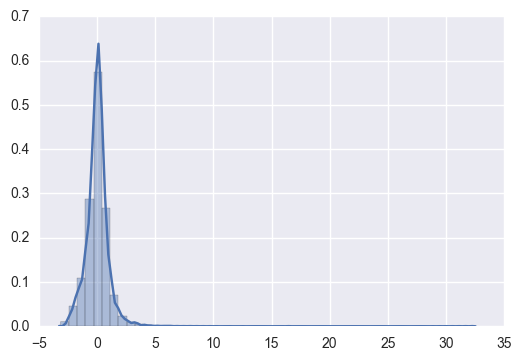

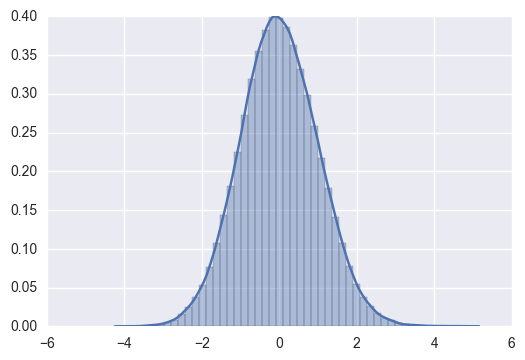

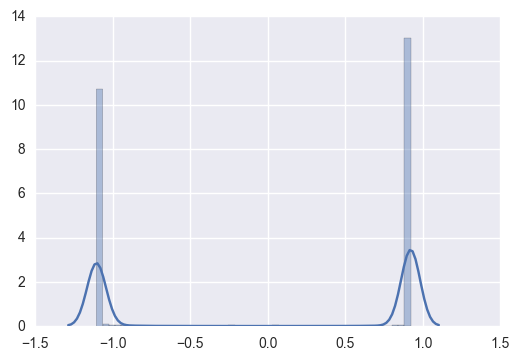

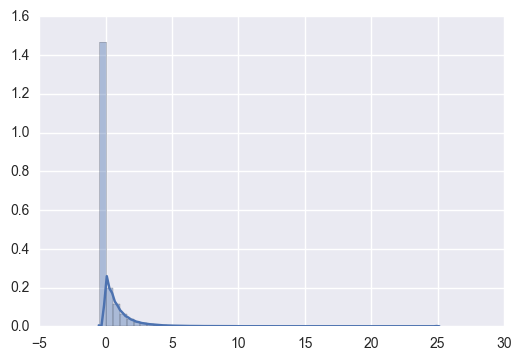

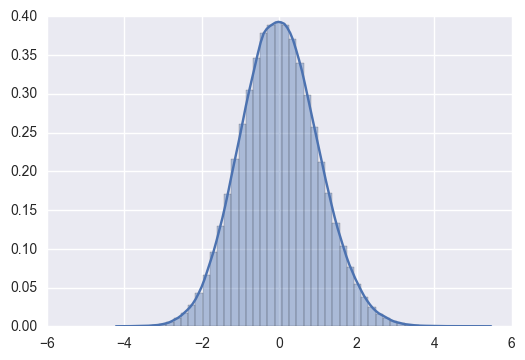

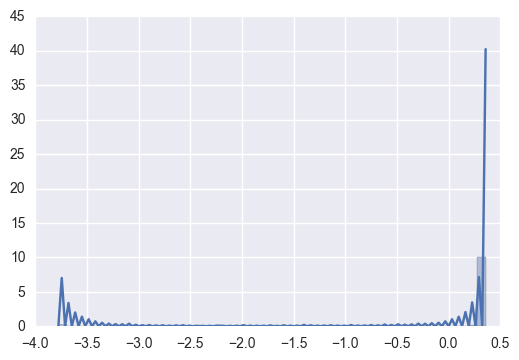

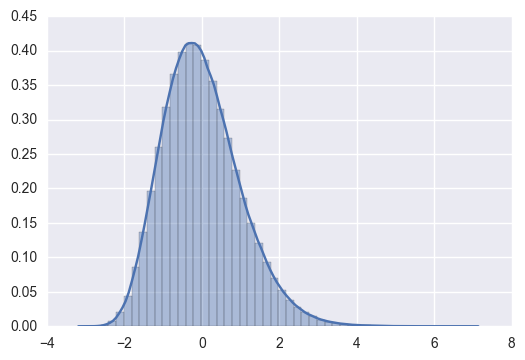

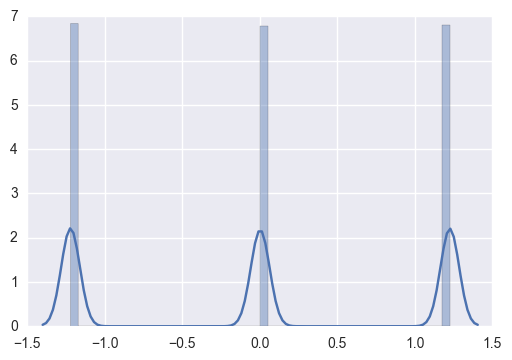

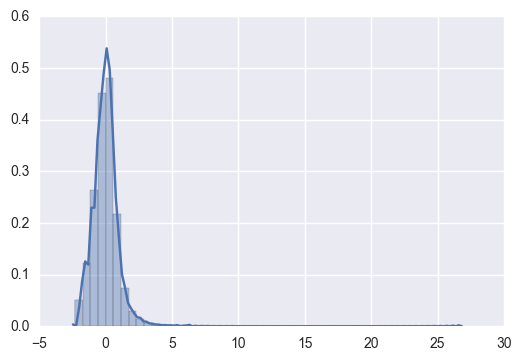

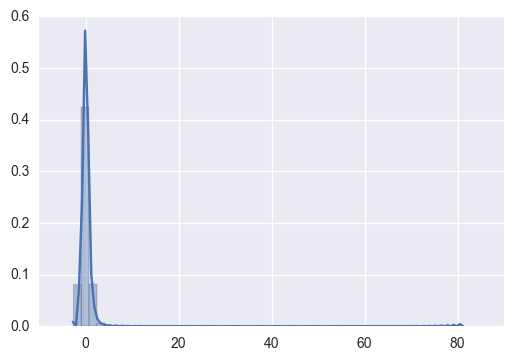

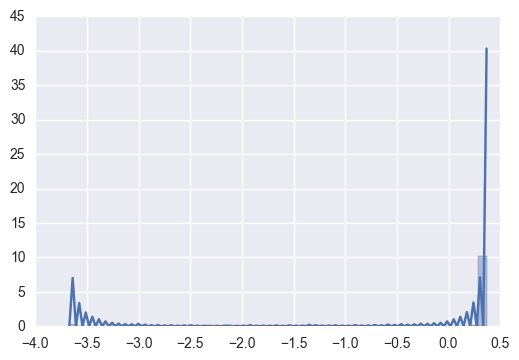

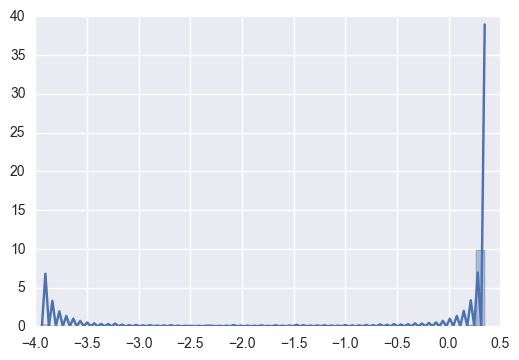

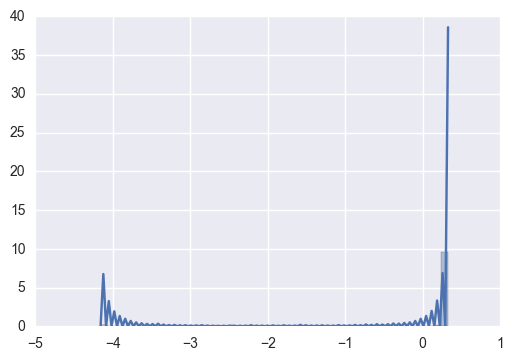

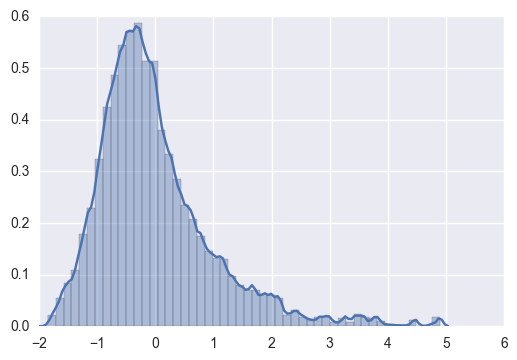

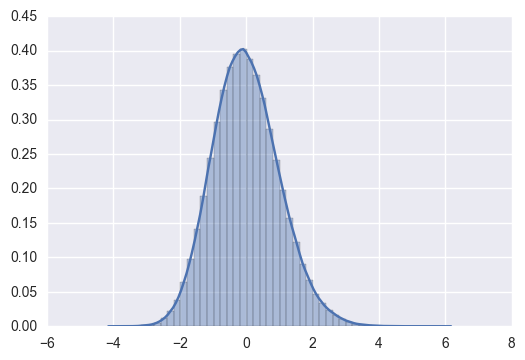

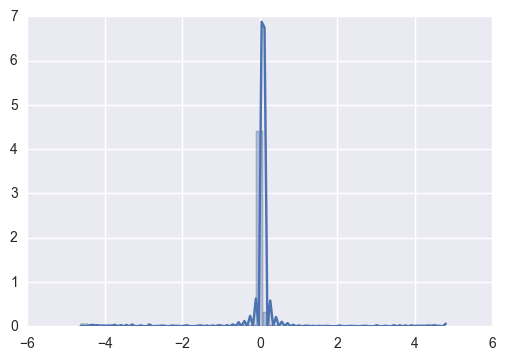

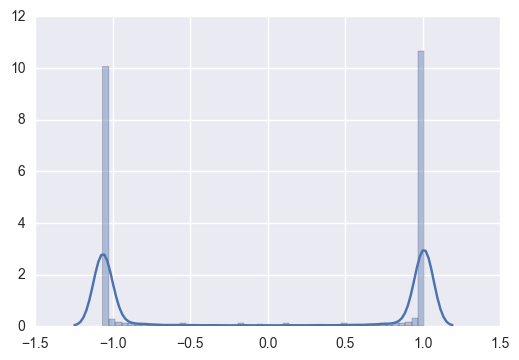

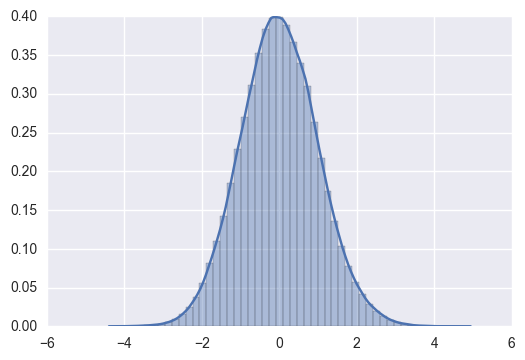

In [58]:
from sklearn.preprocessing import scale
for col in df.columns:
    if 'technical' in col:
        plt.figure()
        sns.distplot(scale(df[col].dropna()))

In [54]:
col_nor_already = list(col_nor_already)
for i in multimodal:
    list(col_nor_already).remove(i)

technical_22 normally distributed


C:\Users\Miya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


technical_34 normally distributed
technical_17 normally distributed
technical_2 normally distributed
technical_11 normally distributed
technical_6 normally distributed
technical_43 normally distributed
technical_10 normally distributed
technical_14 normally distributed
technical_29 normally distributed


MaskError: Cannot alter the masked element.

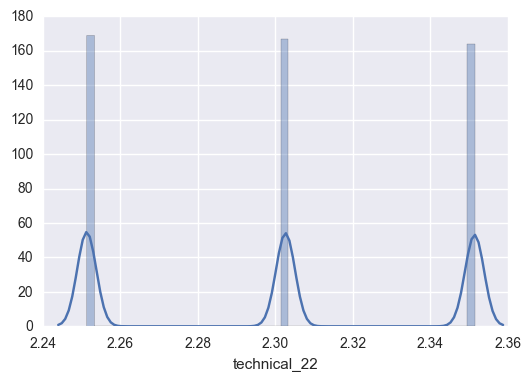

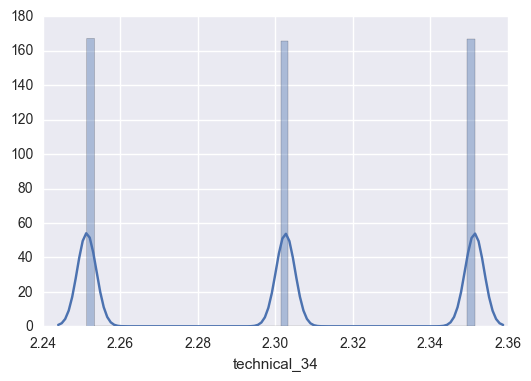

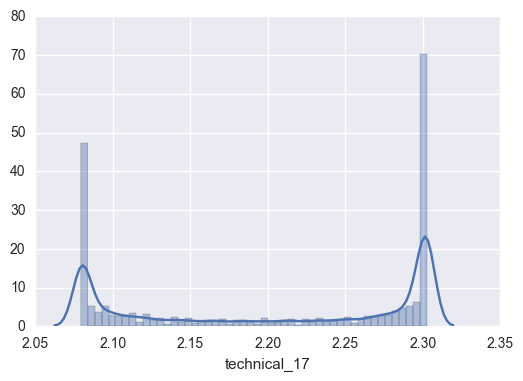

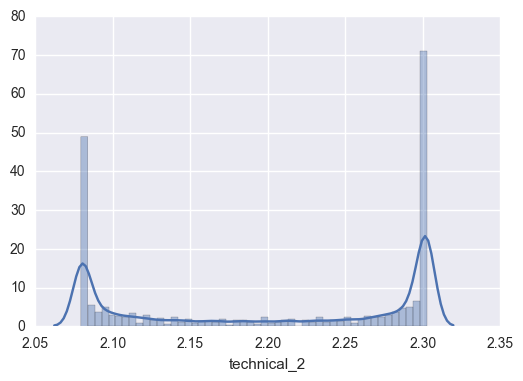

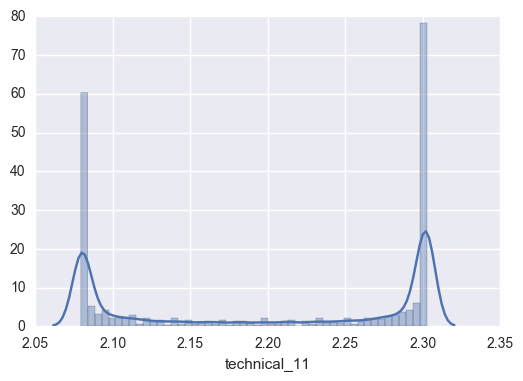

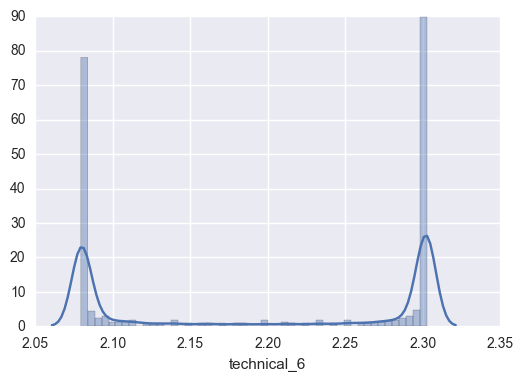

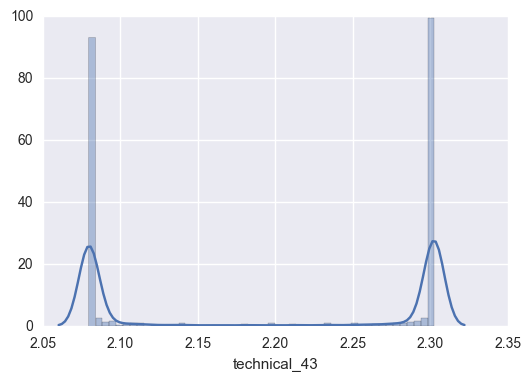

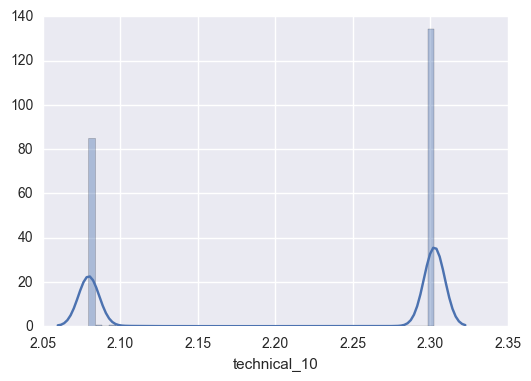

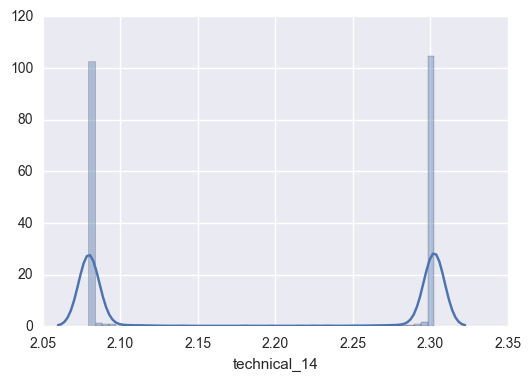

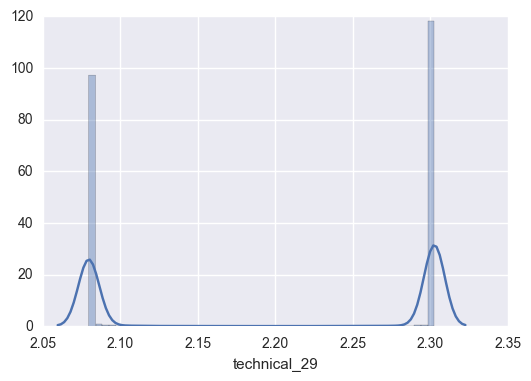

In [56]:
from scipy.stats.mstats import normaltest
for i in col_nor_already:
    if normaltest(np.log(10+df[i].dropna()))[1]>0.05:
        print('%s normally distributed'%i)
        plt.figure()
        sns.distplot(np.log(10+df[i].dropna()))

In [10]:
print('%d columns have standard deviation fewer than and we can normalized in a usual way directly later\n' % sum(stats_pd['std']<1))
print('They are %s'%(list(stats_pd[stats_pd['std']<1].index)))
normalized_able_col = list(stats_pd[stats_pd['std']<=1].index)
print('%d columns have standard deviation larger then 1\n' % sum(stats_pd['std']>1))

56 columns have standard deviation fewer than and we can normalized in a usual way directly later

They are ['fundamental_0', 'fundamental_3', 'fundamental_8', 'fundamental_21', 'fundamental_24', 'fundamental_28', 'fundamental_38', 'fundamental_40', 'fundamental_43', 'fundamental_47', 'fundamental_54', 'fundamental_58', 'fundamental_59', 'fundamental_60', 'fundamental_62', 'fundamental_63', 'technical_0', 'technical_1', 'technical_2', 'technical_3', 'technical_5', 'technical_6', 'technical_7', 'technical_9', 'technical_10', 'technical_11', 'technical_12', 'technical_13', 'technical_14', 'technical_16', 'technical_17', 'technical_18', 'technical_19', 'technical_20', 'technical_22', 'technical_24', 'technical_25', 'technical_27', 'technical_28', 'technical_29', 'technical_30', 'technical_31', 'technical_32', 'technical_33', 'technical_34', 'technical_35', 'technical_36', 'technical_37', 'technical_38', 'technical_39', 'technical_40', 'technical_41', 'technical_42', 'technical_43', 'techn

** plot out distributions for all large-std cols,descendingly ordered by std  **

In [5]:
import seaborn as sns
top_std = stats_pd.sort_values(by = 'std',ascending=False).index[:53]

In [15]:
stats.skew(df[top_std[0]].dropna())

nan

In [19]:
list(map(lambda x:np.abs(x),df[top_std[0]].dropna()))

[0.2128879,
 0.027594831,
 0.0075219083,
 0.44493052,
 0.033660695,
 6.4357853,
 0.28546742,
 0.13539506,
 0.054906655,
 0.80909353,
 0.048312481,
 6.1336675,
 0.052826859,
 0.22200994,
 0.037241884,
 0.73299617,
 0.45186099,
 0.11633768,
 0.0011634339,
 0.27948979,
 0.24267852,
 0.031300277,
 0.115382,
 0.23941086,
 1.0347581,
 0.022194372,
 0.0079591665,
 21.618303,
 0.52876443,
 0.17168741,
 0.23065853,
 0.30472293,
 0.51207477,
 0.31139952,
 0.56998384,
 0.22402735,
 0.1195692,
 0.005616751,
 0.59806174,
 0.0044206115,
 0.0063414397,
 48.294167,
 3.5058444,
 0.34436655,
 6.9434323,
 0.085548811,
 0.48322299,
 0.88082331,
 0.20493267,
 0.11399742,
 0.01233501,
 173.66638,
 0.15233451,
 0.014922998,
 0.085463211,
 0.025205448,
 0.075425871,
 0.49965891,
 0.23838928,
 0.2507596,
 0.023316685,
 0.0035189542,
 0.024843538,
 0.43051532,
 0.15107556,
 0.16293664,
 0.51421082,
 0.16751684,
 1.4707739,
 0.24988849,
 1.0626318,
 0.98952383,
 0.070868172,
 1.0963948,
 0.034970429,
 0.15161997

C:\Users\Miya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


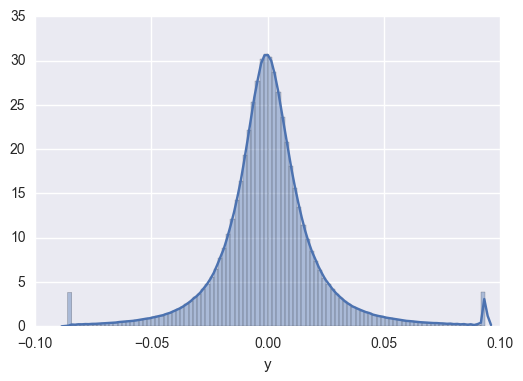

In [31]:
plt.figure()
sns.distplot(df['y'],bins = 100)

C:\Users\Miya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\Miya\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


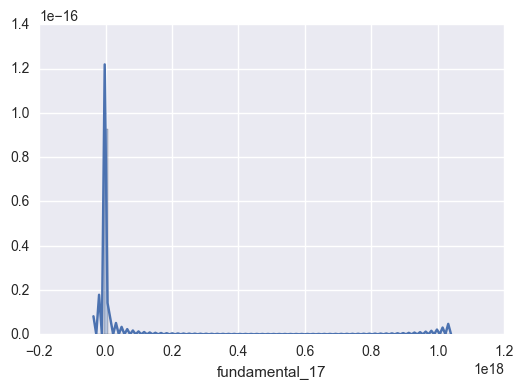

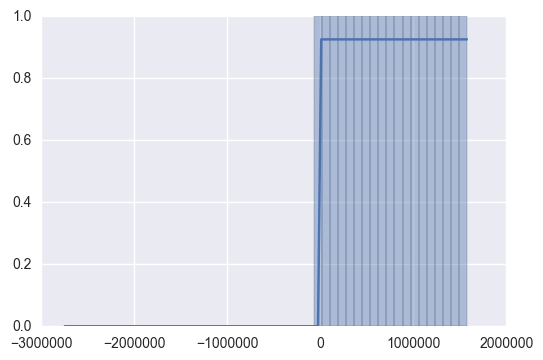

In [30]:
from scipy import stats
from sklearn import preprocessing

plt.figure()
sns.distplot(df[top_std[0]].dropna(),bins = 100)
plt.figure()
sns.distplot(list(map(lambda x:1/x,df[top_std[0]].dropna())),hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))

In [51]:
len(df[df[top_std[0]]>1])/len(df)

0.04256889936379005

In [56]:
len(df[df[top_std[0]]<-1])/len(df)

0.10348641185534349

In [54]:
min_abs = np.abs(df[top_std[0]].dropna().min())

ValueError: range parameter must be finite.

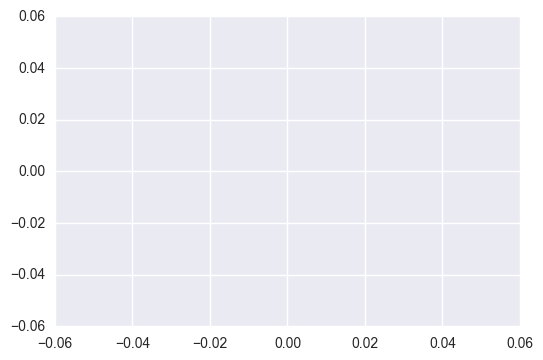

In [47]:
sns.distplot(list(map(lambda x:np.log((x+1+min_abs)/min_abs),df[top_std[0]].dropna())))

C:\Users\mnan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


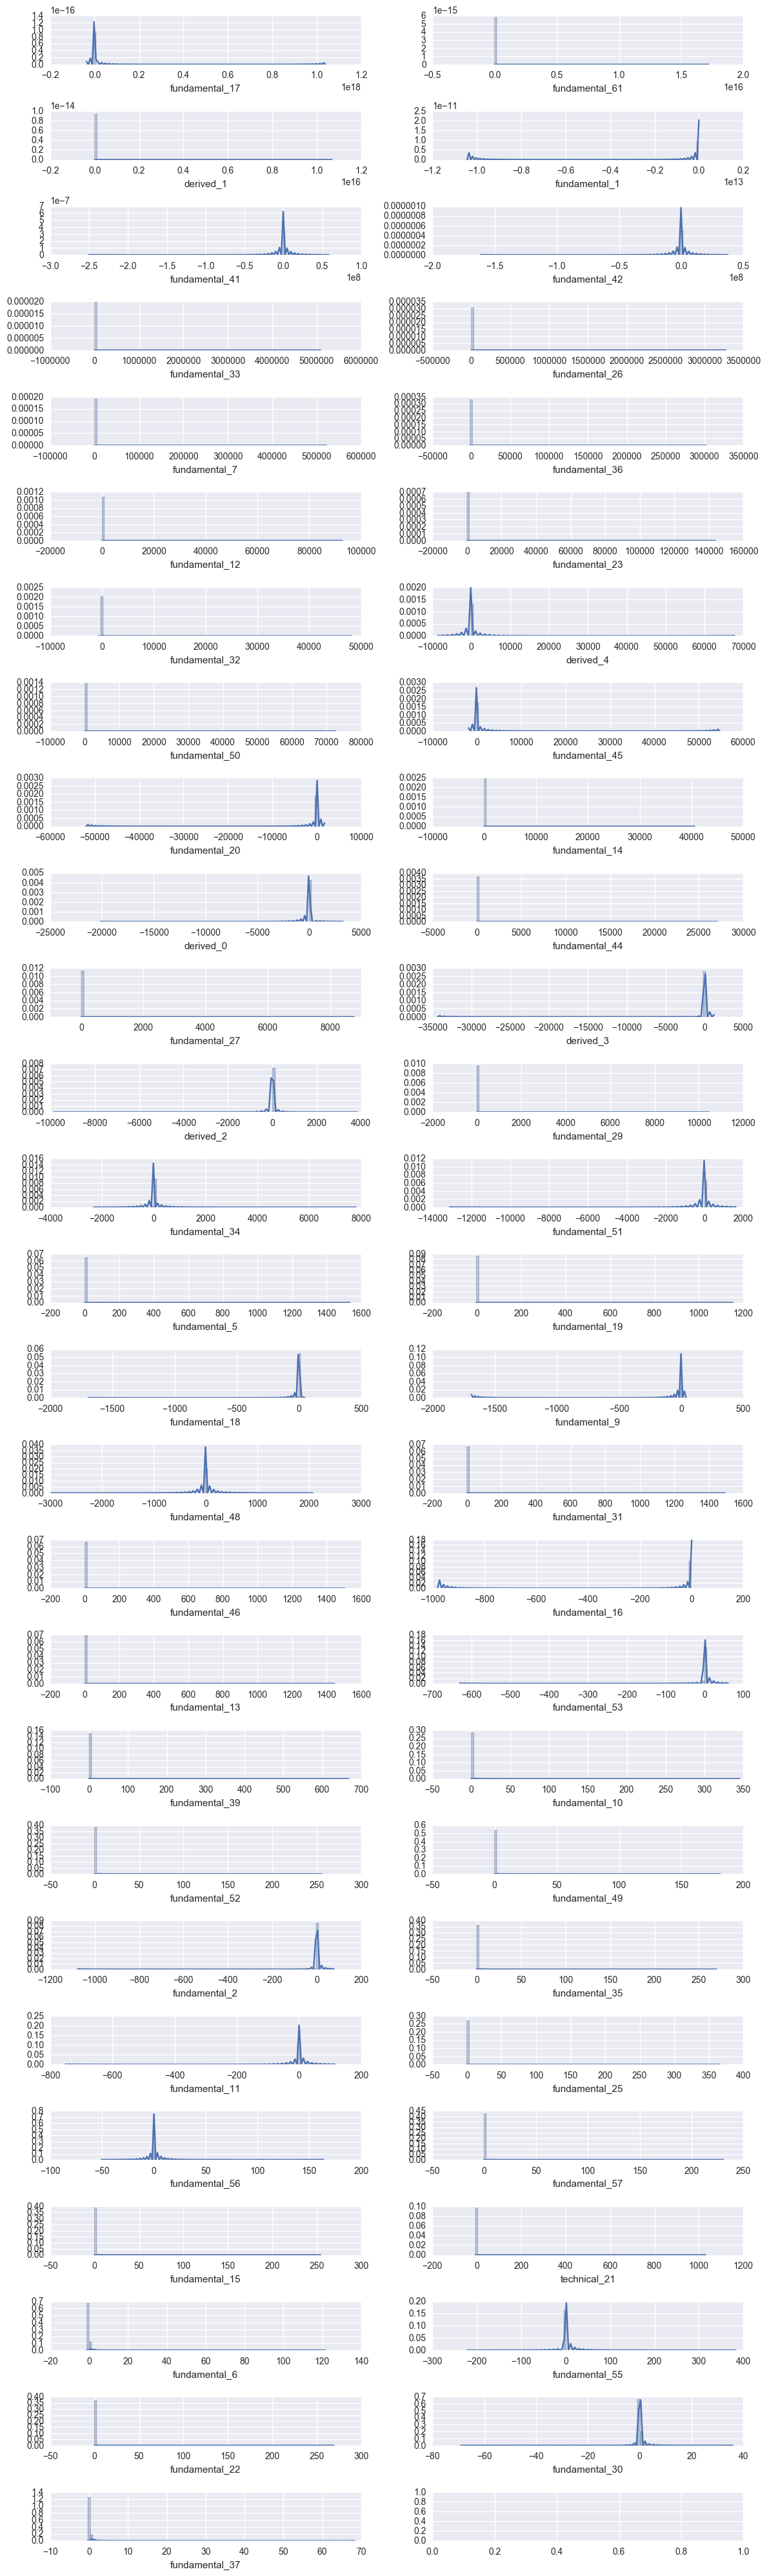

In [63]:
i = 0
n_rows = 27
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 40))
for axrows in axes:
    for ax in axrows:
        try:
            sns.distplot(df[top_std[i]].dropna(),bins = 100,ax=ax)
            i += 1
        except IndexError:
            pass
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text xticklabel objects>)

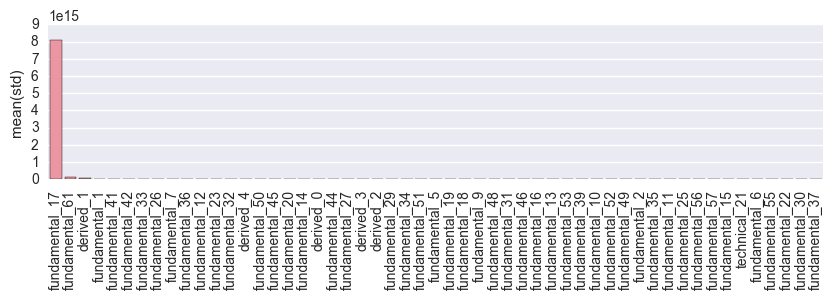

In [36]:
plt.figure(figsize=(10,2))
g = sns.barplot(x = stats_pd.sort_values(by = 'std',ascending=False).index[:53],y = stats_pd.sort_values(by = 'std',ascending=False)['std'][:53])
plt.xticks(rotation = 90)

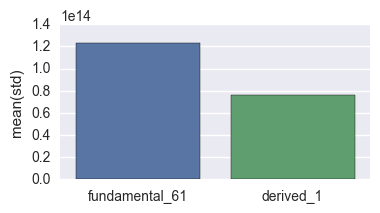

In [53]:
plt.figure(figsize=(4,2))
g = sns.barplot(x = stats_pd.sort_values(by = 'std',ascending=False).index[1:3],y = stats_pd.sort_values(by = 'std',ascending=False)['std'][1:3])

In [56]:
stats_pd.sort_values(by = 'std',ascending=False).index[3]

'fundamental_1'

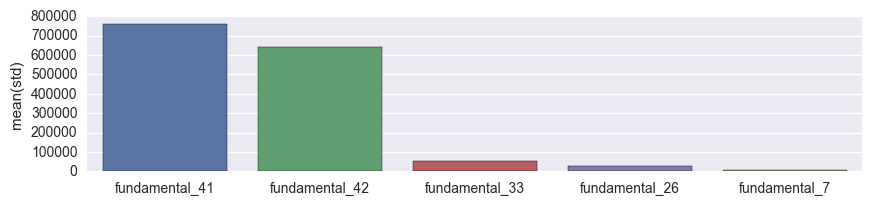

In [57]:
plt.figure(figsize=(10,2))
g = sns.barplot(x = stats_pd.sort_values(by = 'std',ascending=False).index[4:9],y = stats_pd.sort_values(by = 'std',ascending=False)['std'][4:9])

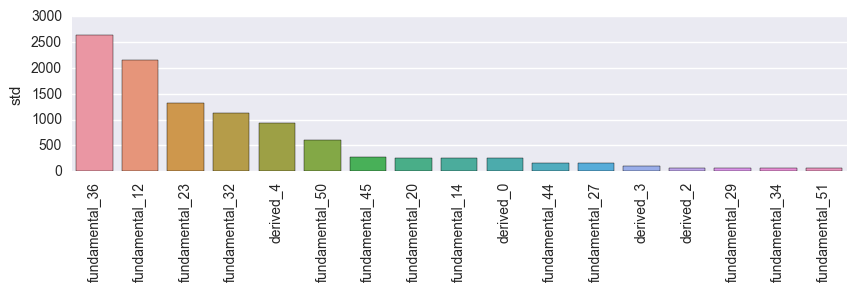

In [67]:
plt.figure(figsize=(10,2))
g = sns.barplot(x = stats_pd.sort_values(by = 'std',ascending=False).index[9:26],y = stats_pd.sort_values(by = 'std',ascending=False)['std'][9:26])
plt.xticks(rotation = 90)
plt.ylabel('std')

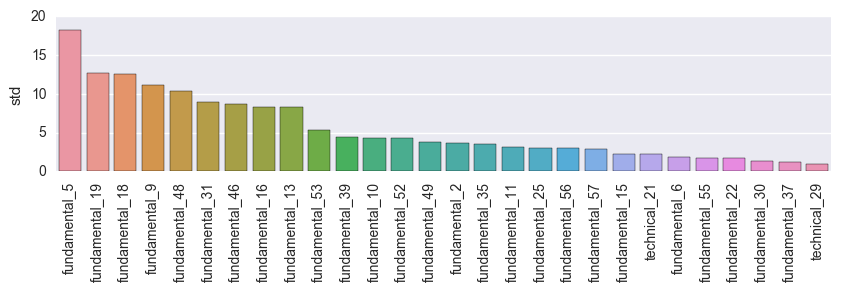

In [65]:
plt.figure(figsize=(10,2))
g = sns.barplot(x = stats_pd.sort_values(by = 'std',ascending=False).index[26:54],y = stats_pd.sort_values(by = 'std',ascending=False)['std'][26:54])
plt.xticks(rotation = 90)
plt.ylabel('std')

Looks like fundamental_17 have little, if any, relationship with y

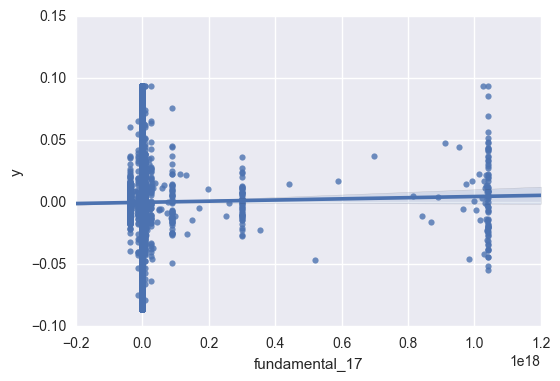

In [69]:
sns.regplot(x = df['fundamental_17'],y = df['y'])

In [71]:
df['fundamental_17'].median()

-0.01750236377120018

(-0.02, 0.02)

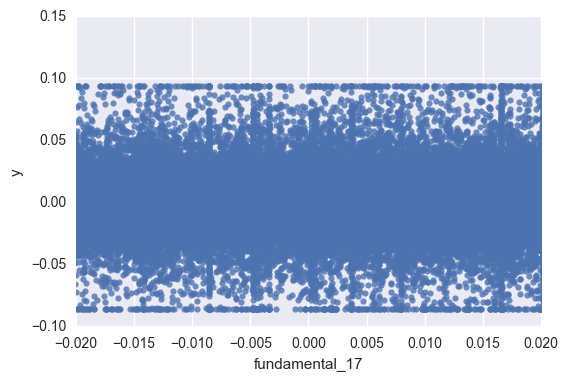

In [74]:
sns.regplot(x = df['fundamental_17'],y = df['y'])
plt.xlim(-0.02,0.02)

y seems to be scaled inbetween two values.

In [110]:
max = df[(df['fundamental_17']<0.02) & (df['fundamental_17']>-0.02)]['y'].values.max()
print('%d exactly same max values for y when fundamental_17 between -0.02 and 0.02!!' % list(df[(df['fundamental_17']<0.02) & (df['fundamental_17']>-0.02)]['y'].values).count(max))
min = df[(df['fundamental_17']<0.02) & (df['fundamental_17']>-0.02)]['y'].values.min()
print('%d exactly same min values for y when fundamental_17 between -0.02 and 0.02!!' % list(df[(df['fundamental_17']<0.02) & (df['fundamental_17']>-0.02)]['y'].values).count(min))

261 exactly same max values for y when fundamental_17 between -0.02 and 0.02!!
300 exactly same min values for y when fundamental_17 between -0.02 and 0.02!!


** Does y constanly show duplicate numbers? **

Let's check all y values when -0.02<fundamental_17<0.02

In [29]:
a = list(df[(df['fundamental_17']<0.02) & (df['fundamental_17']>-0.02)]['y'].values)
counts = Counter(a)
print('%d y values have duplicates when -0.02<fundamental_17<0.02' %len(list(filter(lambda x:x[1]!=1,counts.items()))))

109 y values have duplicates when -0.02<fundamental_17<0.02


Let's check all y values

In [30]:
a = list(df['y'].values)
counts = Counter(a)
print('%d y values have duplicates' %len(list(filter(lambda x:x[1]!=1,counts.items()))))

15231 y values have duplicates


groupby(a)

for key, group in groupby(a):
    while len(list(group))!=1:
        print(key)

** check the only one un-normalized-able column in technical column:**

In [37]:
for i in stats_pd.index:
    if 'technical' in i:
        if i not in stats_pd[stats_pd['std']<1].index:
            print('Only %s under technical category cannot be normalized commonly'%i)
            print('--------------')
            print(stats_pd.ix[i])
            print('--------------')
            print('%d records involved %d instruments have std over 10' %(len(df[df[i]>10]),len(df[df[i]>10]['id'].unique())))
            print('They are %s\n' % df[df[i]>10]['id'].unique())
            print('%d records involved %d instruments have std over 100' %(len(df[df[i]>100]),len(df[df[i]>100]['id'].unique())))
            print('They are %s' % df[df[i]>100]['id'].unique())

Only technical_21 under technical category cannot be normalized commonly
--------------
max     1029.848389
mean      -0.012947
min       -6.085453
std        2.251926
Name: technical_21, dtype: float64
--------------
73 records involved 9 instruments have std over 10
They are [1564 1038  703 1686 1394  846 2140  317 1139]

14 records involved 1 instruments have std over 100
They are [1139]


** instruments with large std in technical_21: **

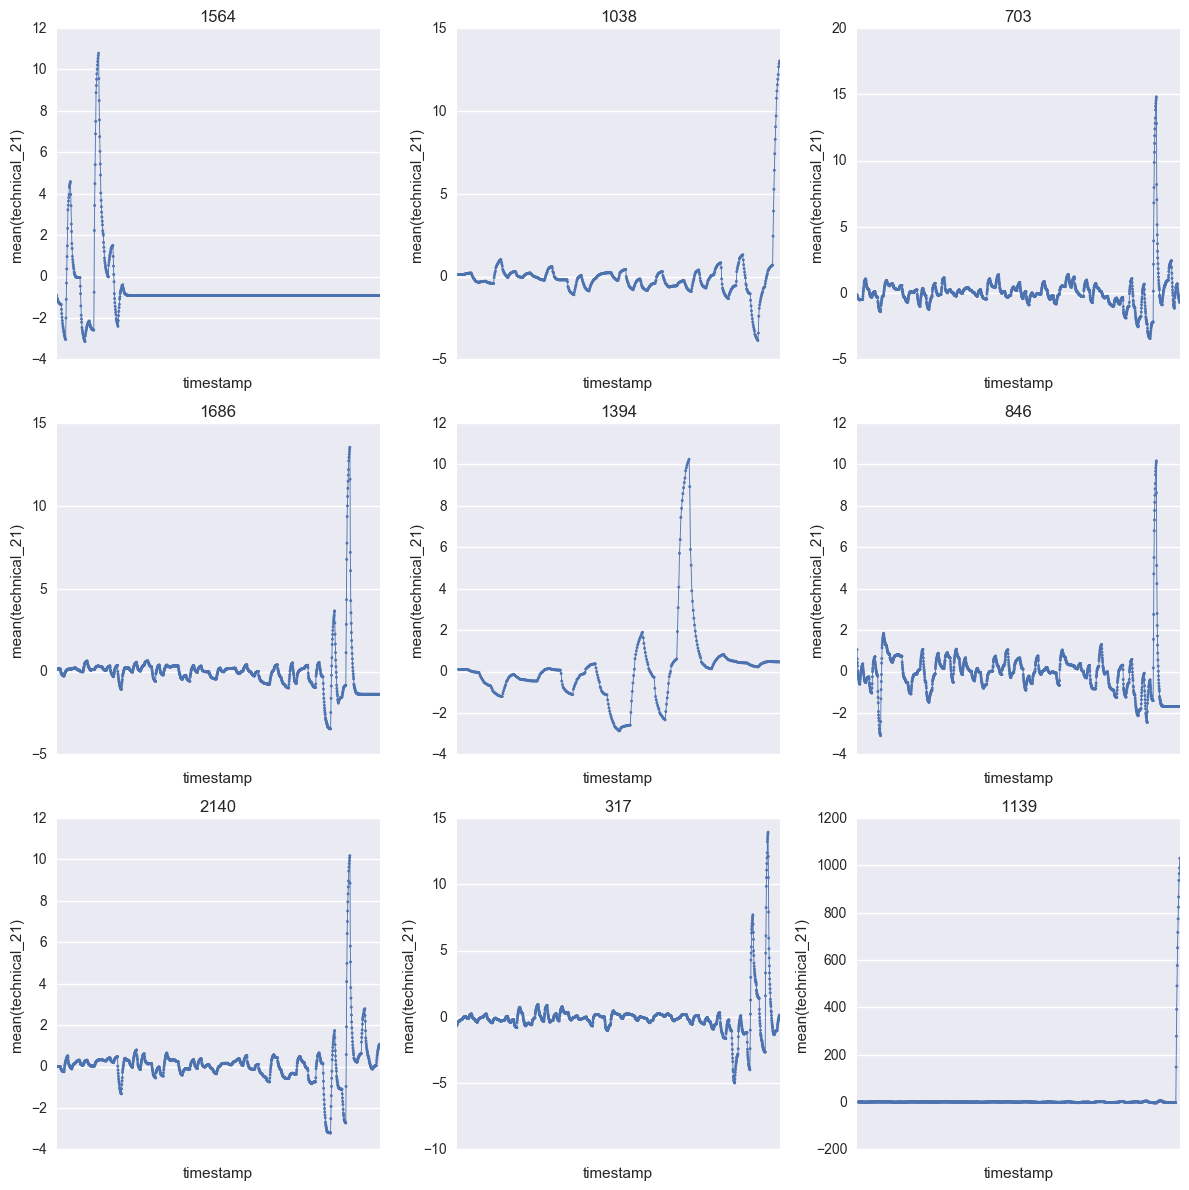

In [58]:
instru_list = [1564,1038,703,1686,1394,846,2140,317,1139]
i = 0
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
for axrows in axes:
    for ax in axrows:
        instru = instru_list[i]
        g = sns.pointplot(data = df[df['id']==instru],x = 'timestamp',y = 'technical_21',ax=ax,xticks = [],scale = 0.2)
        g.set(xticklabels=[])
        g.set_title(instru)
        i += 1
plt.tight_layout()

In [79]:
df[df['id']==1139].isnull().sum()

id                   0
timestamp            0
derived_0         1136
derived_1         1124
derived_2         1136
derived_3         1124
derived_4         1136
fundamental_0     1136
fundamental_1     1136
fundamental_2     1136
fundamental_3     1136
fundamental_5     1136
fundamental_6     1124
fundamental_7     1124
fundamental_8     1136
fundamental_9     1136
fundamental_10    1136
fundamental_11    1136
fundamental_12    1124
fundamental_13    1136
fundamental_14    1136
fundamental_15    1136
fundamental_16    1136
fundamental_17    1136
fundamental_18    1124
fundamental_19    1136
fundamental_20    1124
fundamental_21    1136
fundamental_22    1136
fundamental_23    1136
                  ... 
technical_13         7
technical_14        88
technical_16         4
technical_17         4
technical_18         4
technical_19         4
technical_20         7
technical_21         4
technical_22         0
technical_24        59
technical_25       160
technical_27         4
technical_2

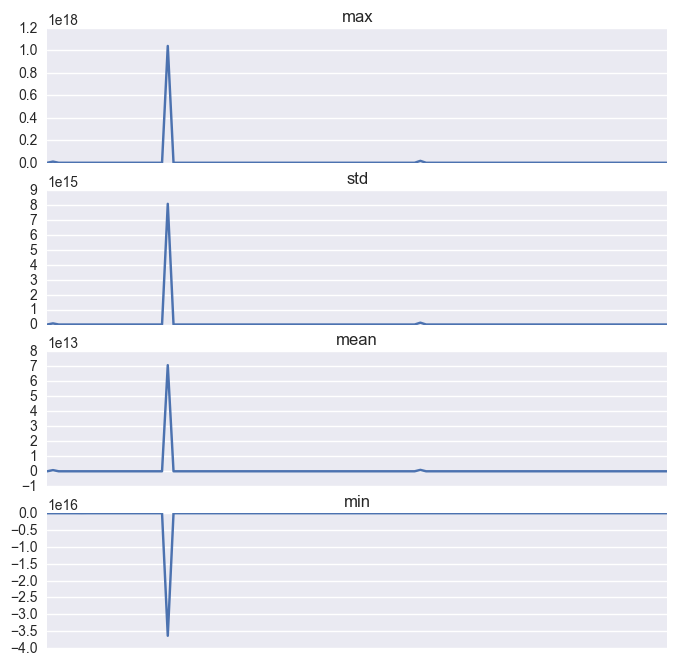

In [60]:
fig, axes = plt.subplots(4, 1, figsize=(8, 8))
for key,i in zip(dict_stats.keys(),range(0,4)):
    stats_pd[key].plot(title = key,xticks = [],ax=axes[i])

In [154]:
print('%d columns max value fewer than 1'%len(stats_pd[stats_pd['max']<=1]))
stats_pd[stats_pd['max']<=1].sort('max')

35 columns max value fewer than 1


C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


max      mean         min       std
technical_10    0.000000 -0.783597   -2.000000  0.975298
technical_18    0.000000 -0.031902   -1.000000  0.151750
technical_17    0.000000 -0.899243   -2.000000  0.849643
technical_32    0.000000 -0.086691   -1.000000  0.242404
technical_14    0.000000 -0.990658   -2.000000  0.980375
technical_12    0.000000 -0.179737   -1.000000  0.328552
technical_11    0.000000 -0.921707   -2.000000  0.887792
technical_9     0.000000 -0.023041   -1.000000  0.131231
technical_29    0.000000 -0.909805   -2.000000  0.991407
technical_37    0.000000 -0.091034   -1.000000  0.247104
technical_38    0.000000 -0.081567   -1.000000  0.234653
technical_2     0.000000 -0.903041   -2.000000  0.856332
technical_39    0.000000 -0.072870   -1.000000  0.223573
technical_0     0.000000 -0.109202   -1.000000  0.270537
technical_43    0.000000 -0.973530   -2.000000  0.960555
technical_6     0.000000 -0.951684   -2.000000  0.929167
technical_13    0.007339  0.000293    0.000000  0.000604
technical_20    0.067848  0.001454    0.000000  0.002873
technical_30    0.071950  0.001246    0.000000  0.002825
y               0.093498  0.000222   -0.086094  0.022406
technical_28    0.133948  0.000676   -0.108179  0.026811
technical_44    0.143586  0.000388   -0.126569  0.030120
technical_25    0.157908  0.000620   -0.139213  0.033576
technical_31    0.201435  0.000251   -0.153340  0.038086
technical_5     0.208456  0.000796   -0.178978  0.043728
technical_1     0.259406  0.000475   -0.203357  0.051820
technical_3     0.338026  0.001217   -0.267365  0.063326
technical_24    0.435251  0.002538   -0.314907  0.081406
technical_22    0.500000 -0.004858   -0.500000  0.408127
technical_34    0.500000 -0.000581   -0.500000  0.408667
technical_41    0.684483  0.005236   -0.444953  0.113373
fundamental_40  0.713205 -0.012114   -0.520465  0.294914
fundamental_16  0.854424 -0.211547 -980.225342  8.346219
technical_16    1.000000 -0.001317   -1.000000  0.129331
technical_42    1.000000 -0.017000   -1.000000  0.211628

In [170]:
print('%d columns std value larger than 1'% len(stats_pd[stats_pd['std']>1]))
stats_pd[stats_pd['std']>1].sort('std')

53 columns std value larger than 1


C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


max          mean           min           std
fundamental_37  6.840546e+01  1.483696e-01 -3.245080e-01  1.188876e+00
fundamental_30  3.586435e+01  6.634763e-02 -6.891109e+01  1.316970e+00
fundamental_22  2.690963e+02  6.140608e-02 -3.518032e-01  1.750241e+00
fundamental_55  3.828660e+02 -8.485153e-02 -2.224418e+02  1.771217e+00
fundamental_6   1.214948e+02  1.404761e-01 -1.070270e+00  1.786976e+00
technical_21    1.029848e+03 -1.294733e-02 -6.085453e+00  2.251926e+00
fundamental_15  2.542647e+02  2.118761e-01 -1.865915e-01  2.274582e+00
fundamental_57  2.306051e+02  2.221422e-01 -2.826288e-01  2.825126e+00
fundamental_56  1.639057e+02  4.631519e-02 -5.049634e+01  2.963386e+00
fundamental_25  3.665417e+02  1.693920e-01 -3.127510e-01  3.007013e+00
fundamental_11  1.167478e+02 -2.534907e-01 -7.505370e+02  3.134663e+00
fundamental_35  2.696514e+02  3.489724e-01 -2.518598e-01  3.560281e+00
fundamental_2   7.677125e+01 -1.622954e-01 -1.077101e+03  3.668149e+00
fundamental_49  1.813291e+02  3.434145e-01 -7.874931e-02  3.821147e+00
fundamental_52  2.557487e+02  3.440971e-01 -1.670013e-01  4.289630e+00
fundamental_10  3.454060e+02  4.418401e-01 -8.453134e-02  4.330144e+00
fundamental_39  6.672457e+02  2.712474e-01 -1.357956e-01  4.436012e+00
fundamental_53  6.172171e+01 -1.666229e-01 -6.291855e+02  5.299903e+00
fundamental_13  1.445207e+03  1.333553e-01 -3.189299e-01  8.289918e+00
fundamental_16  8.544242e-01 -2.115467e-01 -9.802253e+02  8.346219e+00
fundamental_46  1.506479e+03  1.867855e-01 -2.372039e-01  8.645126e+00
fundamental_31  1.494724e+03  9.953792e-02 -3.965991e-01  8.906890e+00
fundamental_48  2.061773e+03 -6.305848e-02 -2.980904e+03  1.037661e+01
fundamental_9   3.965863e+01 -8.617447e-02 -1.685835e+03  1.114758e+01
fundamental_18  4.889408e+01 -8.233162e-01 -1.695405e+03  1.258578e+01
fundamental_19  1.152071e+03  3.989280e-01 -2.287757e+00  1.274384e+01
fundamental_5   1.535051e+03  7.752405e-01 -1.392729e-01  1.819782e+01
fundamental_51  1.608102e+03  3.249429e-01 -1.312815e+04  5.377707e+01
fundamental_34  7.796733e+03  1.918833e+00 -2.330201e+03  5.990416e+01
fundamental_29  1.046462e+04  5.558513e-01 -3.387980e+00  6.051464e+01
derived_2       3.823001e+03 -3.320328e-01 -9.848880e+03  6.519810e+01
derived_3       1.239737e+03 -5.046012e-01 -3.434176e+04  1.020749e+02
fundamental_27  8.776810e+03  4.224846e+00 -2.276185e+00  1.589603e+02
fundamental_44  2.708135e+04  1.720977e+00 -1.831286e+00  1.636298e+02
derived_0       3.252527e+03 -4.536046e+00 -2.017497e+04  2.497382e+02
fundamental_14  4.058832e+04  3.135854e+00 -1.081379e-01  2.546490e+02
fundamental_20  1.782451e+03 -1.480752e+00 -5.190238e+04  2.664446e+02
fundamental_45  5.471126e+04  1.468040e+00 -1.878934e+03  2.728949e+02
fundamental_50  7.262396e+04  1.257884e+01 -1.487149e+00  6.101042e+02
derived_4       6.785965e+04  1.801661e+01 -8.551914e+03  9.258360e+02
fundamental_32  4.820575e+04  3.315642e+01 -7.015645e+02  1.126885e+03
fundamental_23  1.438253e+05  2.740388e+01 -1.840578e-01  1.316155e+03
fundamental_12  9.270403e+04  6.168341e+01 -3.446150e-02  2.152291e+03
fundamental_36  3.020198e+05  2.671928e+01 -1.466438e+03  2.644793e+03
fundamental_7   5.221653e+05  4.865615e+01 -3.390085e-01  4.763797e+03
fundamental_26  3.271922e+06  2.169823e+02 -2.669597e-01  2.563142e+04
fundamental_33  5.081478e+06  6.165651e+02 -5.081144e+00  5.477951e+04
fundamental_42  3.747912e+07  1.322136e+02 -1.614066e+08  6.407286e+05
fundamental_41  5.829140e+07 -4.696748e+02 -2.510341e+08  7.626751e+05
fundamental_1   5.203165e+02 -5.703754e+08 -1.043737e+13  7.502322e+10
derived_1       1.068448e+16  7.729436e+11 -7.375435e-02  7.620606e+13
fundamental_61  1.721357e+16  9.340944e+11 -1.755816e-01  1.232967e+14
fundamental_17  1.040279e+18  7.087444e+13 -3.636979e+16  8.059463e+15

In [226]:
df['technical_21'].values

array([-0.14245284, -0.30935648,  0.1228407 , ...,  0.64903581,
        0.20191512,  4.13163471], dtype=float32)

In [164]:
stats_pd.sort('max')[35:]

C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


max          mean           min           std
technical_7     1.217279e+00  5.059733e-02 -4.050815e-01  3.412927e-01
technical_33    1.322735e+00  1.754952e-02 -5.471164e-01  1.875426e-01
fundamental_0   1.378195e+00 -2.040938e-02 -2.344957e+00  2.494859e-01
technical_40    1.569265e+00  4.908321e-02 -5.250904e-01  3.102316e-01
fundamental_59  1.918350e+00  1.480153e-01 -1.489624e-01  3.628329e-01
fundamental_63  2.588689e+00  1.522306e-01 -3.298322e-01  3.576581e-01
fundamental_58  2.604494e+00  2.167122e-02 -3.751944e-01  3.222283e-01
fundamental_62  2.717353e+00 -5.293713e-02 -2.870304e+00  5.039921e-01
fundamental_54  3.486828e+00  1.882488e-01 -2.777064e-01  4.009745e-01
fundamental_21  3.505455e+00  9.907262e-02 -1.870385e+00  3.223995e-01
fundamental_28  4.753011e+00  4.284626e-02 -4.014944e-01  3.614222e-01
fundamental_47  5.283416e+00  6.526184e-02 -3.137322e-01  3.709741e-01
fundamental_3   6.552332e+00  2.780239e-02 -3.734025e-01  3.076004e-01
fundamental_38  8.043021e+00  4.936627e-02 -1.693879e+00  5.142319e-01
technical_35    1.464272e+01 -1.033000e-01 -1.379302e+00  5.522224e-01
technical_27    2.180798e+01 -7.586388e-02 -2.204653e+00  6.748320e-01
fundamental_60  2.232580e+01  1.942597e-01 -1.807738e-01  8.336142e-01
fundamental_43  2.494201e+01  2.344497e-01 -1.146182e-01  8.593076e-01
fundamental_24  2.873965e+01  7.610784e-02 -6.850272e+01  7.024008e-01
fundamental_30  3.586435e+01  6.634763e-02 -6.891109e+01  1.316970e+00
fundamental_8   3.943310e+01  8.000651e-02 -1.744283e-01  7.057598e-01
fundamental_9   3.965863e+01 -8.617447e-02 -1.685835e+03  1.114758e+01
fundamental_18  4.889408e+01 -8.233162e-01 -1.695405e+03  1.258578e+01
technical_36    4.957758e+01 -8.584833e-02 -1.687572e+00  6.125852e-01
fundamental_53  6.172171e+01 -1.666229e-01 -6.291855e+02  5.299903e+00
technical_19    6.395316e+01 -5.358487e-02 -3.363893e+00  8.205566e-01
fundamental_37  6.840546e+01  1.483696e-01 -3.245080e-01  1.188876e+00
fundamental_2   7.677125e+01 -1.622954e-01 -1.077101e+03  3.668149e+00
fundamental_11  1.167478e+02 -2.534907e-01 -7.505370e+02  3.134663e+00
fundamental_6   1.214948e+02  1.404761e-01 -1.070270e+00  1.786976e+00
...                      ...           ...           ...           ...
derived_3       1.239737e+03 -5.046012e-01 -3.434176e+04  1.020749e+02
fundamental_13  1.445207e+03  1.333553e-01 -3.189299e-01  8.289918e+00
fundamental_31  1.494724e+03  9.953792e-02 -3.965991e-01  8.906890e+00
fundamental_46  1.506479e+03  1.867855e-01 -2.372039e-01  8.645126e+00
fundamental_5   1.535051e+03  7.752405e-01 -1.392729e-01  1.819782e+01
fundamental_51  1.608102e+03  3.249429e-01 -1.312815e+04  5.377707e+01
fundamental_20  1.782451e+03 -1.480752e+00 -5.190238e+04  2.664446e+02
fundamental_48  2.061773e+03 -6.305848e-02 -2.980904e+03  1.037661e+01
derived_0       3.252527e+03 -4.536046e+00 -2.017497e+04  2.497382e+02
derived_2       3.823001e+03 -3.320328e-01 -9.848880e+03  6.519810e+01
fundamental_34  7.796733e+03  1.918833e+00 -2.330201e+03  5.990416e+01
fundamental_27  8.776810e+03  4.224846e+00 -2.276185e+00  1.589603e+02
fundamental_29  1.046462e+04  5.558513e-01 -3.387980e+00  6.051464e+01
fundamental_44  2.708135e+04  1.720977e+00 -1.831286e+00  1.636298e+02
fundamental_14  4.058832e+04  3.135854e+00 -1.081379e-01  2.546490e+02
fundamental_32  4.820575e+04  3.315642e+01 -7.015645e+02  1.126885e+03
fundamental_45  5.471126e+04  1.468040e+00 -1.878934e+03  2.728949e+02
derived_4       6.785965e+04  1.801661e+01 -8.551914e+03  9.258360e+02
fundamental_50  7.262396e+04  1.257884e+01 -1.487149e+00  6.101042e+02
fundamental_12  9.270403e+04  6.168341e+01 -3.446150e-02  2.152291e+03
fundamental_23  1.438253e+05  2.740388e+01 -1.840578e-01  1.316155e+03
fundamental_36  3.020198e+05  2.671928e+01 -1.466438e+03  2.644793e+03
fundamental_7   5.221653e+05  4.865615e+01 -3.390085e-01  4.763797e+03
fundamental_26  3.271922e+06  2.169823e+02 -2.669597e-01  2.563142e+04
fundamental_33  5.081478e+06  6.165651e+02 -5.081

In [107]:
for i in range(17,30):
    print('%dth mean:%s' % (i,stats_pd.sort('mean',ascending=False)['mean'].values[i]))
    print('%dth std:%s' % (i,stats_pd.sort('mean',ascending=False)['std'].values[i]))
    print('%dth max:%s' % (i,stats_pd.sort('mean',ascending=False)['max'].values[i]))
    print('%dth min:%s' % (i,stats_pd.sort('mean',ascending=False)['min'].values[i]))
    print('--------------')

17th mean:1.46803975105
17th std:272.894897461
17th max:54711.2578125
17th min:-1878.93432617
--------------
18th mean:0.7752404809
18th std:18.1978187561
18th max:1535.05078125
18th min:-0.139272928238
--------------
19th mean:0.555851340294
19th std:60.5146369934
19th max:10464.6210938
19th min:-3.3879802227
--------------
20th mean:0.441840052605
20th std:4.33014392853
20th max:345.405975342
20th min:-0.0845313444734
--------------
21th mean:0.398928046227
21th std:12.7438430786
21th max:1152.07104492
21th min:-2.28775715828
--------------
22th mean:0.348972350359
22th std:3.5602812767
22th max:269.651367188
22th min:-0.251859784126
--------------
23th mean:0.344097107649
23th std:4.28962993622
23th max:255.748672485
23th min:-0.167001262307
--------------
24th mean:0.343414545059
24th std:3.82114744186
24th max:181.329055786
24th min:-0.0787493139505
--------------
25th mean:0.324942857027
25th std:53.7770652771
25th max:1608.10217285
25th min:-13128.1513672
--------------
26th mea

C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


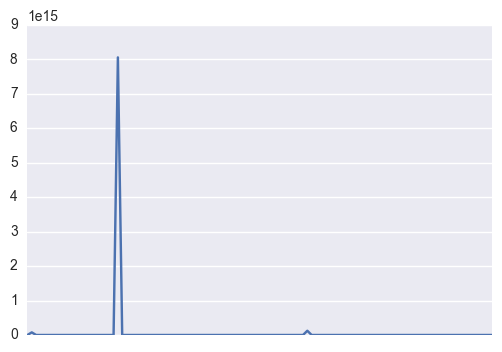

In [44]:
pd.DataFrame.from_dict(dict_stats).set_index(columns_to_see)['std'].plot(xticks = [])

In [63]:
print('col with missing values, ordered by number:')
print(list(pd.DataFrame(missing_ratio).sort(0,ascending=False).index))

col with missing values, ordered by number:
['fundamental_5', 'fundamental_38', 'fundamental_6', 'fundamental_1', 'fundamental_61', 'fundamental_28', 'fundamental_57', 'fundamental_26', 'fundamental_24', 'fundamental_9', 'fundamental_22', 'fundamental_49', 'fundamental_31', 'fundamental_3', 'fundamental_51', 'fundamental_47', 'fundamental_34', 'fundamental_35', 'derived_4', 'derived_2', 'fundamental_54', 'fundamental_39', 'fundamental_63', 'fundamental_8', 'fundamental_56', 'fundamental_55', 'fundamental_11', 'fundamental_2', 'fundamental_23', 'fundamental_14', 'fundamental_37', 'fundamental_46', 'fundamental_44', 'fundamental_50', 'fundamental_13', 'fundamental_16', 'fundamental_60', 'fundamental_30', 'fundamental_15', 'fundamental_43', 'fundamental_29', 'fundamental_27', 'fundamental_40', 'technical_28', 'technical_44', 'technical_25', 'technical_31', 'technical_10', 'fundamental_52', 'technical_5', 'derived_3', 'fundamental_58', 'technical_1', 'fundamental_25', 'fundamental_62', 'fu

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [24]:
df_byid = df.groupby(['id']).count()

In [36]:
df_byid.head()

timestamp  derived_0  derived_1  derived_2  derived_3  derived_4  \
id                                                                     
0        1646       1643       1643       1643       1643       1643   
6         728        724        724        724        724        724   
7        1543       1540       1540       1540       1540       1540   
10        116        116        116        116        116        116   
11       1813       1813       1813       1813       1813       1813   

    fundamental_0  fundamental_1  fundamental_2  fundamental_3  fundamental_5  \
id                                                                              
0            1643           1523           1643           1643           1643   
6             724              0            724            724              0   
7            1540           1540           1540           1490              0   
10            116            116            116            116              0   
11           1813           1813           1813           1813           1813   

    fundamental_6  fundamental_7  fundamental_8  fundamental_9  \
id                                                               
0            1643           1643           1643           1643   
6               0            724            724            724   
7            1540           1540           1540           1540   
10            116            116            116            116   
11           1813           1813           1813           1813   

    fundamental_10  fundamental_11  fundamental_12  fundamental_13  \
id                                                                   
0             1643            1643            1643            1643   
6                0             724             724             724   
7                0            1540            1540            1540   
10              79             116             116             116   
11            1813            1813            1813            1813   

    fundamental_14  fundamental_15  fundamental_16  fundamental_17  \
id                                                                   
0             1643            1643            1643            1643   
6              724             724             724             724   
7             1540            1540            1540             929   
10             116             116             116             116   
11            1813            1813            1813            1813   

    fundamental_18  fundamental_19  fundamental_20  fundamental_21  \
id                                                                   
0             1643            1643            1643            1643   
6              724             724             724               0   
7             1540            1540            1540            1540   
10             116             116             116             116   
11            1813            1813            1813            1813   

    fundamental_22  fundamental_23  fundamental_24  fundamental_25  \
id                                                                   
0             1643            1643            1643            1523   
6              724             724             724             724   
7             1540            1540            1540            1540   
10             116             116             116             116   
11               0            1813            1813            1813   

    fundamental_26  fundamental_27  fundamental_28  fundamental_29  \
id                                                                   
0             1643            1523            1643            1643   
6                0             724             724             724   
7             1540            1540            1490            1540   
10             116             116             116             116   
11            1813            1813            1813            1813   

    fundament

In [61]:
df_byid.index

Int64Index([   0,    6,    7,   10,   11,   12,   13,   14,   15,   16,
            ...
            2146, 2148, 2149, 2150, 2151, 2152, 2154, 2155, 2156, 2158],
           dtype='int64', name='id', length=1424)

In [62]:
max_row = []
for i in df_byid.index:
    max_r = df_byid.loc[i].values.max()
    max_row.append(max_r)

In [64]:
min_row = []
for i in df_byid.index:
    min_r = df_byid.loc[i].values.min()
    min_row.append(min_r)

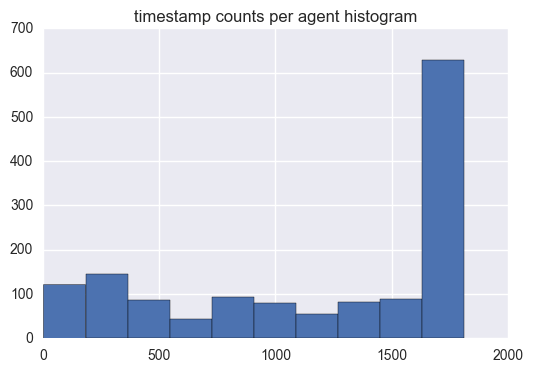

In [66]:
plt.hist(max_row)
plt.title('timestamp counts per agent histogram')

In [67]:
missing = []
for i,j in zip(max_row, min_row):
    missing.append(i-j)